# machine learning portfolio 2

groepsnaam : de regressie-rakkers
- Daniella dijkdrent (23110112)
- Michelle Schijff (23111240)
- Alyssa Biesot (23140488)
- Syndey Nieuwenhuis (23130164)

## Inladen van de benodigde libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.fftpack import fft
from scipy.signal import find_peaks
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools
from itertools import product
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor


## Inladen van de test en train set

In [3]:
test = pd.read_csv('test.csv', parse_dates=['date_hour'])
test

date_hour  holiday  weathersit  temp   atemp   hum  windspeed
0   2012-12-01 00:00:00        0           1  0.26  0.3030  0.81     0.0000
1   2012-12-01 01:00:00        0           1  0.26  0.3030  0.81     0.0000
2   2012-12-01 02:00:00        0           2  0.26  0.3030  0.81     0.0000
3   2012-12-01 03:00:00        0           2  0.26  0.2727  0.81     0.1343
4   2012-12-01 04:00:00        0           1  0.26  0.2879  0.81     0.0896
..                  ...      ...         ...   ...     ...   ...        ...
451 2012-12-19 19:00:00        0           1  0.38  0.3939  0.50     0.3881
452 2012-12-19 20:00:00        0           1  0.36  0.3485  0.57     0.2239
453 2012-12-19 21:00:00        0           1  0.34  0.3182  0.61     0.2239
454 2012-12-19 22:00:00        0           1  0.34  0.3485  0.61     0.0896
455 2012-12-19 23:00:00        0           1  0.32  0.3333  0.66     0.1343

[456 rows x 7 columns]

In [4]:
train = pd.read_csv('train.csv', parse_dates=['date_hour'])
train

date_hour  holiday  weathersit  temp   atemp   hum  windspeed  \
0     2011-01-01 00:00:00        0           1  0.24  0.2879  0.81     0.0000   
1     2011-01-01 01:00:00        0           1  0.22  0.2727  0.80     0.0000   
2     2011-01-01 02:00:00        0           1  0.22  0.2727  0.80     0.0000   
3     2011-01-01 03:00:00        0           1  0.24  0.2879  0.75     0.0000   
4     2011-01-01 04:00:00        0           1  0.24  0.2879  0.75     0.0000   
...                   ...      ...         ...   ...     ...   ...        ...   
16632 2012-11-30 19:00:00        0           1  0.32  0.3485  0.66     0.0000   
16633 2012-11-30 20:00:00        0           1  0.32  0.3485  0.66     0.0000   
16634 2012-11-30 21:00:00        0           1  0.30  0.3182  0.75     0.0896   
16635 2012-11-30 22:00:00        0           1  0.30  0.3333  0.75     0.0000   
16636 2012-11-30 23:00:00        0           2  0.30  0.3182  0.75     0.0896   

       cnt  
0       16  
1       40  
2       32  
3       13  
4        1  
...    ...  
16632  377  
16633  245  
16634  183  
16635  163  
16636  110  

[16637 rows x 8 columns]

## 1: Exploratieve Data Analyse

### 1.1. Omzetten van de kolom 'date_hour' naar index

In [5]:

train = train.set_index('date_hour')
display(train)
test = test.set_index('date_hour')
display(test)

holiday  weathersit  temp   atemp   hum  windspeed  cnt
date_hour                                                                   
2011-01-01 00:00:00        0           1  0.24  0.2879  0.81     0.0000   16
2011-01-01 01:00:00        0           1  0.22  0.2727  0.80     0.0000   40
2011-01-01 02:00:00        0           1  0.22  0.2727  0.80     0.0000   32
2011-01-01 03:00:00        0           1  0.24  0.2879  0.75     0.0000   13
2011-01-01 04:00:00        0           1  0.24  0.2879  0.75     0.0000    1
...                      ...         ...   ...     ...   ...        ...  ...
2012-11-30 19:00:00        0           1  0.32  0.3485  0.66     0.0000  377
2012-11-30 20:00:00        0           1  0.32  0.3485  0.66     0.0000  245
2012-11-30 21:00:00        0           1  0.30  0.3182  0.75     0.0896  183
2012-11-30 22:00:00        0           1  0.30  0.3333  0.75     0.0000  163
2012-11-30 23:00:00        0           2  0.30  0.3182  0.75     0.0896  110

[16637 rows x 7 columns]

holiday  weathersit  temp   atemp   hum  windspeed
date_hour                                                              
2012-12-01 00:00:00        0           1  0.26  0.3030  0.81     0.0000
2012-12-01 01:00:00        0           1  0.26  0.3030  0.81     0.0000
2012-12-01 02:00:00        0           2  0.26  0.3030  0.81     0.0000
2012-12-01 03:00:00        0           2  0.26  0.2727  0.81     0.1343
2012-12-01 04:00:00        0           1  0.26  0.2879  0.81     0.0896
...                      ...         ...   ...     ...   ...        ...
2012-12-19 19:00:00        0           1  0.38  0.3939  0.50     0.3881
2012-12-19 20:00:00        0           1  0.36  0.3485  0.57     0.2239
2012-12-19 21:00:00        0           1  0.34  0.3182  0.61     0.2239
2012-12-19 22:00:00        0           1  0.34  0.3485  0.61     0.0896
2012-12-19 23:00:00        0           1  0.32  0.3333  0.66     0.1343

[456 rows x 6 columns]

### 1.2. Data Exploration

In [6]:
# show the datatypes of the test and train data
print('De datatypes van de train data:')
display(train.dtypes)
print('De datatypes van de test data:')
display(test.dtypes)

# show the basic statistics of the test and train data
print('De basisstatistieken van de train data:')
display(train.describe())
print('De basisstatistieken van de test data:')
display(test.describe())

# show the 'date_hour' column of the test and train data
print('De date_hour kolom van de train data:')
display(train.index)
print('De date_hour kolom van de test data:')
display(test.index)

De datatypes van de train data:


holiday         int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

De datatypes van de test data:


holiday         int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
dtype: object

De basisstatistieken van de train data:


holiday    weathersit          temp         atemp           hum  \
count  16637.000000  16637.000000  16637.000000  16637.000000  16637.000000   
mean       0.028671      1.415580      0.504745      0.482608      0.624756   
std        0.166885      0.637298      0.192369      0.171557      0.193227   
min        0.000000      1.000000      0.020000      0.000000      0.000000   
25%        0.000000      1.000000      0.340000      0.333300      0.470000   
50%        0.000000      1.000000      0.520000      0.500000      0.620000   
75%        0.000000      2.000000      0.660000      0.621200      0.780000   
max        1.000000      4.000000      1.000000      1.000000      1.000000   

          windspeed           cnt  
count  16637.000000  16637.000000  
mean       0.190310    190.477009  
std        0.121915    182.026755  
min        0.000000      1.000000  
25%        0.104500     41.000000  
50%        0.194000    143.000000  
75%        0.253700    282.000000  
max        0.850700    977.000000

De basisstatistieken van de test data:


holiday  weathersit        temp       atemp         hum   windspeed
count    456.0  456.000000  456.000000  456.000000  456.000000  456.000000
mean       0.0    1.592105    0.360132    0.363691    0.714868    0.157639
std        0.0    0.607882    0.079432    0.076354    0.177732    0.106499
min        0.0    1.000000    0.160000    0.181800    0.330000    0.000000
25%        0.0    1.000000    0.300000    0.303000    0.560000    0.089600
50%        0.0    2.000000    0.360000    0.363600    0.750000    0.134300
75%        0.0    2.000000    0.400000    0.409100    0.870000    0.223900
max        0.0    3.000000    0.600000    0.621200    1.000000    0.492500

De date_hour kolom van de train data:


DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-11-30 14:00:00', '2012-11-30 15:00:00',
               '2012-11-30 16:00:00', '2012-11-30 17:00:00',
               '2012-11-30 18:00:00', '2012-11-30 19:00:00',
               '2012-11-30 20:00:00', '2012-11-30 21:00:00',
               '2012-11-30 22:00:00', '2012-11-30 23:00:00'],
              dtype='datetime64[ns]', name='date_hour', length=16637, freq=None)

De date_hour kolom van de test data:


DatetimeIndex(['2012-12-01 00:00:00', '2012-12-01 01:00:00',
               '2012-12-01 02:00:00', '2012-12-01 03:00:00',
               '2012-12-01 04:00:00', '2012-12-01 05:00:00',
               '2012-12-01 06:00:00', '2012-12-01 07:00:00',
               '2012-12-01 08:00:00', '2012-12-01 09:00:00',
               ...
               '2012-12-19 14:00:00', '2012-12-19 15:00:00',
               '2012-12-19 16:00:00', '2012-12-19 17:00:00',
               '2012-12-19 18:00:00', '2012-12-19 19:00:00',
               '2012-12-19 20:00:00', '2012-12-19 21:00:00',
               '2012-12-19 22:00:00', '2012-12-19 23:00:00'],
              dtype='datetime64[ns]', name='date_hour', length=456, freq=None)

### 1.2.1. Tijdserie elementen toevoegen

In [7]:
# De uren uit de index halen, en in een aparte kolom zetten

train['Hour'] = train.index.hour
test['Hour'] = test.index.hour

display(train,test)

holiday  weathersit  temp   atemp   hum  windspeed  cnt  \
date_hour                                                                      
2011-01-01 00:00:00        0           1  0.24  0.2879  0.81     0.0000   16   
2011-01-01 01:00:00        0           1  0.22  0.2727  0.80     0.0000   40   
2011-01-01 02:00:00        0           1  0.22  0.2727  0.80     0.0000   32   
2011-01-01 03:00:00        0           1  0.24  0.2879  0.75     0.0000   13   
2011-01-01 04:00:00        0           1  0.24  0.2879  0.75     0.0000    1   
...                      ...         ...   ...     ...   ...        ...  ...   
2012-11-30 19:00:00        0           1  0.32  0.3485  0.66     0.0000  377   
2012-11-30 20:00:00        0           1  0.32  0.3485  0.66     0.0000  245   
2012-11-30 21:00:00        0           1  0.30  0.3182  0.75     0.0896  183   
2012-11-30 22:00:00        0           1  0.30  0.3333  0.75     0.0000  163   
2012-11-30 23:00:00        0           2  0.30  0.3182  0.75     0.0896  110   

                     Hour  
date_hour                  
2011-01-01 00:00:00     0  
2011-01-01 01:00:00     1  
2011-01-01 02:00:00     2  
2011-01-01 03:00:00     3  
2011-01-01 04:00:00     4  
...                   ...  
2012-11-30 19:00:00    19  
2012-11-30 20:00:00    20  
2012-11-30 21:00:00    21  
2012-11-30 22:00:00    22  
2012-11-30 23:00:00    23  

[16637 rows x 8 columns]

holiday  weathersit  temp   atemp   hum  windspeed  Hour
date_hour                                                                    
2012-12-01 00:00:00        0           1  0.26  0.3030  0.81     0.0000     0
2012-12-01 01:00:00        0           1  0.26  0.3030  0.81     0.0000     1
2012-12-01 02:00:00        0           2  0.26  0.3030  0.81     0.0000     2
2012-12-01 03:00:00        0           2  0.26  0.2727  0.81     0.1343     3
2012-12-01 04:00:00        0           1  0.26  0.2879  0.81     0.0896     4
...                      ...         ...   ...     ...   ...        ...   ...
2012-12-19 19:00:00        0           1  0.38  0.3939  0.50     0.3881    19
2012-12-19 20:00:00        0           1  0.36  0.3485  0.57     0.2239    20
2012-12-19 21:00:00        0           1  0.34  0.3182  0.61     0.2239    21
2012-12-19 22:00:00        0           1  0.34  0.3485  0.61     0.0896    22
2012-12-19 23:00:00        0           1  0.32  0.3333  0.66     0.1343    23

[456 rows x 7 columns]

In [8]:
# De seizoenen toevoegen aan de train en test data
def season(date):
    if date.month in [3,4,5]:
        return '1'
    elif date.month in [6,7,8]:
        return '2'
    elif date.month in [9,10,11]:
        return '3'
    else:
        return '4'
train['Season'] = train.index.to_series().apply(season)
test['Season'] = test.index.to_series().apply(season)

display(train,test) 

# Uitleg:
# De [3,4,5] betekent dat de maanden maart, april en mei bij de lente horen.
# De [6,7,8] betekent dat de maanden juni, juli en augustus bij de zomer horen.
# De [9,10,11] betekent dat de maanden september, oktober en november bij de herfst horen.
# De rest van de maanden horen bij de winter.
# De maanden hebben nummers gekregen omdat modellen alleen met nummers kunnen werken.

holiday  weathersit  temp   atemp   hum  windspeed  cnt  \
date_hour                                                                      
2011-01-01 00:00:00        0           1  0.24  0.2879  0.81     0.0000   16   
2011-01-01 01:00:00        0           1  0.22  0.2727  0.80     0.0000   40   
2011-01-01 02:00:00        0           1  0.22  0.2727  0.80     0.0000   32   
2011-01-01 03:00:00        0           1  0.24  0.2879  0.75     0.0000   13   
2011-01-01 04:00:00        0           1  0.24  0.2879  0.75     0.0000    1   
...                      ...         ...   ...     ...   ...        ...  ...   
2012-11-30 19:00:00        0           1  0.32  0.3485  0.66     0.0000  377   
2012-11-30 20:00:00        0           1  0.32  0.3485  0.66     0.0000  245   
2012-11-30 21:00:00        0           1  0.30  0.3182  0.75     0.0896  183   
2012-11-30 22:00:00        0           1  0.30  0.3333  0.75     0.0000  163   
2012-11-30 23:00:00        0           2  0.30  0.3182  0.75     0.0896  110   

                     Hour Season  
date_hour                         
2011-01-01 00:00:00     0      4  
2011-01-01 01:00:00     1      4  
2011-01-01 02:00:00     2      4  
2011-01-01 03:00:00     3      4  
2011-01-01 04:00:00     4      4  
...                   ...    ...  
2012-11-30 19:00:00    19      3  
2012-11-30 20:00:00    20      3  
2012-11-30 21:00:00    21      3  
2012-11-30 22:00:00    22      3  
2012-11-30 23:00:00    23      3  

[16637 rows x 9 columns]

holiday  weathersit  temp   atemp   hum  windspeed  Hour  \
date_hour                                                                       
2012-12-01 00:00:00        0           1  0.26  0.3030  0.81     0.0000     0   
2012-12-01 01:00:00        0           1  0.26  0.3030  0.81     0.0000     1   
2012-12-01 02:00:00        0           2  0.26  0.3030  0.81     0.0000     2   
2012-12-01 03:00:00        0           2  0.26  0.2727  0.81     0.1343     3   
2012-12-01 04:00:00        0           1  0.26  0.2879  0.81     0.0896     4   
...                      ...         ...   ...     ...   ...        ...   ...   
2012-12-19 19:00:00        0           1  0.38  0.3939  0.50     0.3881    19   
2012-12-19 20:00:00        0           1  0.36  0.3485  0.57     0.2239    20   
2012-12-19 21:00:00        0           1  0.34  0.3182  0.61     0.2239    21   
2012-12-19 22:00:00        0           1  0.34  0.3485  0.61     0.0896    22   
2012-12-19 23:00:00        0           1  0.32  0.3333  0.66     0.1343    23   

                    Season  
date_hour                   
2012-12-01 00:00:00      4  
2012-12-01 01:00:00      4  
2012-12-01 02:00:00      4  
2012-12-01 03:00:00      4  
2012-12-01 04:00:00      4  
...                    ...  
2012-12-19 19:00:00      4  
2012-12-19 20:00:00      4  
2012-12-19 21:00:00      4  
2012-12-19 22:00:00      4  
2012-12-19 23:00:00      4  

[456 rows x 8 columns]

In [9]:
def add_time_features(df, datetime_col):
    """
    Voeg tijdgerelateerde features toe aan een DataFrame.
    
    Parameters:
    - df: DataFrame waar de features aan toegevoegd worden.
    - datetime_col: Naam van de datetime-kolom in het DataFrame.
    """
    # Haal de datetime-index op
    df['Hour'] = df.index.hour
    df['Month'] = df.index.month
    df['DayOfWeek'] = df.index.dayofweek
    df['Week'] = df.index.isocalendar().week
    df['Year'] = df.index.year
    df['Weekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
    df['PeakHour'] = df['Hour'].apply(lambda x: 1 if 7 <= x <= 9 or 16 <= x <= 18 else 0)
    
    return df

train = add_time_features(train, 'date_hour')
test = add_time_features(test, 'date_hour')

display(train.head(), test.head())

holiday  weathersit  temp   atemp   hum  windspeed  cnt  \
date_hour                                                                      
2011-01-01 00:00:00        0           1  0.24  0.2879  0.81        0.0   16   
2011-01-01 01:00:00        0           1  0.22  0.2727  0.80        0.0   40   
2011-01-01 02:00:00        0           1  0.22  0.2727  0.80        0.0   32   
2011-01-01 03:00:00        0           1  0.24  0.2879  0.75        0.0   13   
2011-01-01 04:00:00        0           1  0.24  0.2879  0.75        0.0    1   

                     Hour Season  Month  DayOfWeek  Week  Year  Weekend  \
date_hour                                                                 
2011-01-01 00:00:00     0      4      1          5    52  2011        1   
2011-01-01 01:00:00     1      4      1          5    52  2011        1   
2011-01-01 02:00:00     2      4      1          5    52  2011        1   
2011-01-01 03:00:00     3      4      1          5    52  2011        1   
2011-01-01 04:00:00     4      4      1          5    52  2011        1   

                     PeakHour  
date_hour                      
2011-01-01 00:00:00         0  
2011-01-01 01:00:00         0  
2011-01-01 02:00:00         0  
2011-01-01 03:00:00         0  
2011-01-01 04:00:00         0

holiday  weathersit  temp   atemp   hum  windspeed  Hour  \
date_hour                                                                       
2012-12-01 00:00:00        0           1  0.26  0.3030  0.81     0.0000     0   
2012-12-01 01:00:00        0           1  0.26  0.3030  0.81     0.0000     1   
2012-12-01 02:00:00        0           2  0.26  0.3030  0.81     0.0000     2   
2012-12-01 03:00:00        0           2  0.26  0.2727  0.81     0.1343     3   
2012-12-01 04:00:00        0           1  0.26  0.2879  0.81     0.0896     4   

                    Season  Month  DayOfWeek  Week  Year  Weekend  PeakHour  
date_hour                                                                    
2012-12-01 00:00:00      4     12          5    48  2012        1         0  
2012-12-01 01:00:00      4     12          5    48  2012        1         0  
2012-12-01 02:00:00      4     12          5    48  2012        1         0  
2012-12-01 03:00:00      4     12          5    48  2012        1         0  
2012-12-01 04:00:00      4     12          5    48  2012        1         0

In [13]:
# show the datatypes of the test and train data
print('De datatypes van de train data:')
display(train.dtypes)
print('De datatypes van de test data:')
display(test.dtypes)

# show the basic statistics of the test and train data
print('De basisstatistieken van de train data:')
display(train.describe())
print('De basisstatistieken van de test data:')
display(test.describe())

# show the 'date_hour' column of the test and train data
print('De date_hour kolom van de train data:')
display(train.index)
print('De date_hour kolom van de test data:')
display(test.index)

De datatypes van de train data:


holiday         int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
Hour            int64
Season         object
Month           int64
DayOfWeek       int64
Week           UInt32
Year            int64
Weekend         int64
PeakHour        int64
dtype: object

De datatypes van de test data:


holiday         int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
Hour            int64
Season         object
Month           int64
DayOfWeek       int64
Week           UInt32
Year            int64
Weekend         int64
PeakHour        int64
dtype: object

De basisstatistieken van de train data:


holiday    weathersit          temp         atemp           hum  \
count  16637.000000  16637.000000  16637.000000  16637.000000  16637.000000   
mean       0.028671      1.415580      0.504745      0.482608      0.624756   
std        0.166885      0.637298      0.192369      0.171557      0.193227   
min        0.000000      1.000000      0.020000      0.000000      0.000000   
25%        0.000000      1.000000      0.340000      0.333300      0.470000   
50%        0.000000      1.000000      0.520000      0.500000      0.620000   
75%        0.000000      2.000000      0.660000      0.621200      0.780000   
max        1.000000      4.000000      1.000000      1.000000      1.000000   

          windspeed           cnt          Hour         Month     DayOfWeek  \
count  16637.000000  16637.000000  16637.000000  16637.000000  16637.000000   
mean       0.190310    190.477009     11.547875      6.294164      3.008776   
std        0.121915    182.026755      6.914199      3.310969      1.998538   
min        0.000000      1.000000      0.000000      1.000000      0.000000   
25%        0.104500     41.000000      6.000000      3.000000      1.000000   
50%        0.194000    143.000000     12.000000      6.000000      3.000000   
75%        0.253700    282.000000     18.000000      9.000000      5.000000   
max        0.850700    977.000000     23.000000     12.000000      6.000000   

            Week          Year       Weekend      PeakHour  
count    16637.0  16637.000000  16637.000000  16637.000000  
mean   25.614895   2011.480375      0.286951      0.251428  
std    14.466678      0.499630      0.452352      0.433847  
min          1.0   2011.000000      0.000000      0.000000  
25%         13.0   2011.000000      0.000000      0.000000  
50%         26.0   2011.000000      0.000000      0.000000  
75%         38.0   2012.000000      1.000000      1.000000  
max         52.0   2012.000000      1.000000      1.000000

De basisstatistieken van de test data:


holiday  weathersit        temp       atemp         hum   windspeed  \
count    456.0  456.000000  456.000000  456.000000  456.000000  456.000000   
mean       0.0    1.592105    0.360132    0.363691    0.714868    0.157639   
std        0.0    0.607882    0.079432    0.076354    0.177732    0.106499   
min        0.0    1.000000    0.160000    0.181800    0.330000    0.000000   
25%        0.0    1.000000    0.300000    0.303000    0.560000    0.089600   
50%        0.0    2.000000    0.360000    0.363600    0.750000    0.134300   
75%        0.0    2.000000    0.400000    0.409100    0.870000    0.223900   
max        0.0    3.000000    0.600000    0.621200    1.000000    0.492500   

             Hour  Month   DayOfWeek       Week    Year     Weekend  \
count  456.000000  456.0  456.000000      456.0   456.0  456.000000   
mean    11.500000   12.0    2.947368  49.578947  2012.0    0.315789   
std      6.929789    0.0    2.091709   0.878508     0.0    0.465340   
min      0.000000   12.0    0.000000       48.0  2012.0    0.000000   
25%      5.750000   12.0    1.000000       49.0  2012.0    0.000000   
50%     11.500000   12.0    3.000000       50.0  2012.0    0.000000   
75%     17.250000   12.0    5.000000       50.0  2012.0    1.000000   
max     23.000000   12.0    6.000000       51.0  2012.0    1.000000   

         PeakHour  
count  456.000000  
mean     0.250000  
std      0.433488  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.250000  
max      1.000000

De date_hour kolom van de train data:


DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-11-30 14:00:00', '2012-11-30 15:00:00',
               '2012-11-30 16:00:00', '2012-11-30 17:00:00',
               '2012-11-30 18:00:00', '2012-11-30 19:00:00',
               '2012-11-30 20:00:00', '2012-11-30 21:00:00',
               '2012-11-30 22:00:00', '2012-11-30 23:00:00'],
              dtype='datetime64[ns]', name='date_hour', length=16637, freq=None)

De date_hour kolom van de test data:


DatetimeIndex(['2012-12-01 00:00:00', '2012-12-01 01:00:00',
               '2012-12-01 02:00:00', '2012-12-01 03:00:00',
               '2012-12-01 04:00:00', '2012-12-01 05:00:00',
               '2012-12-01 06:00:00', '2012-12-01 07:00:00',
               '2012-12-01 08:00:00', '2012-12-01 09:00:00',
               ...
               '2012-12-19 14:00:00', '2012-12-19 15:00:00',
               '2012-12-19 16:00:00', '2012-12-19 17:00:00',
               '2012-12-19 18:00:00', '2012-12-19 19:00:00',
               '2012-12-19 20:00:00', '2012-12-19 21:00:00',
               '2012-12-19 22:00:00', '2012-12-19 23:00:00'],
              dtype='datetime64[ns]', name='date_hour', length=456, freq=None)

### 1.2.2. Data correlatie reguliere features

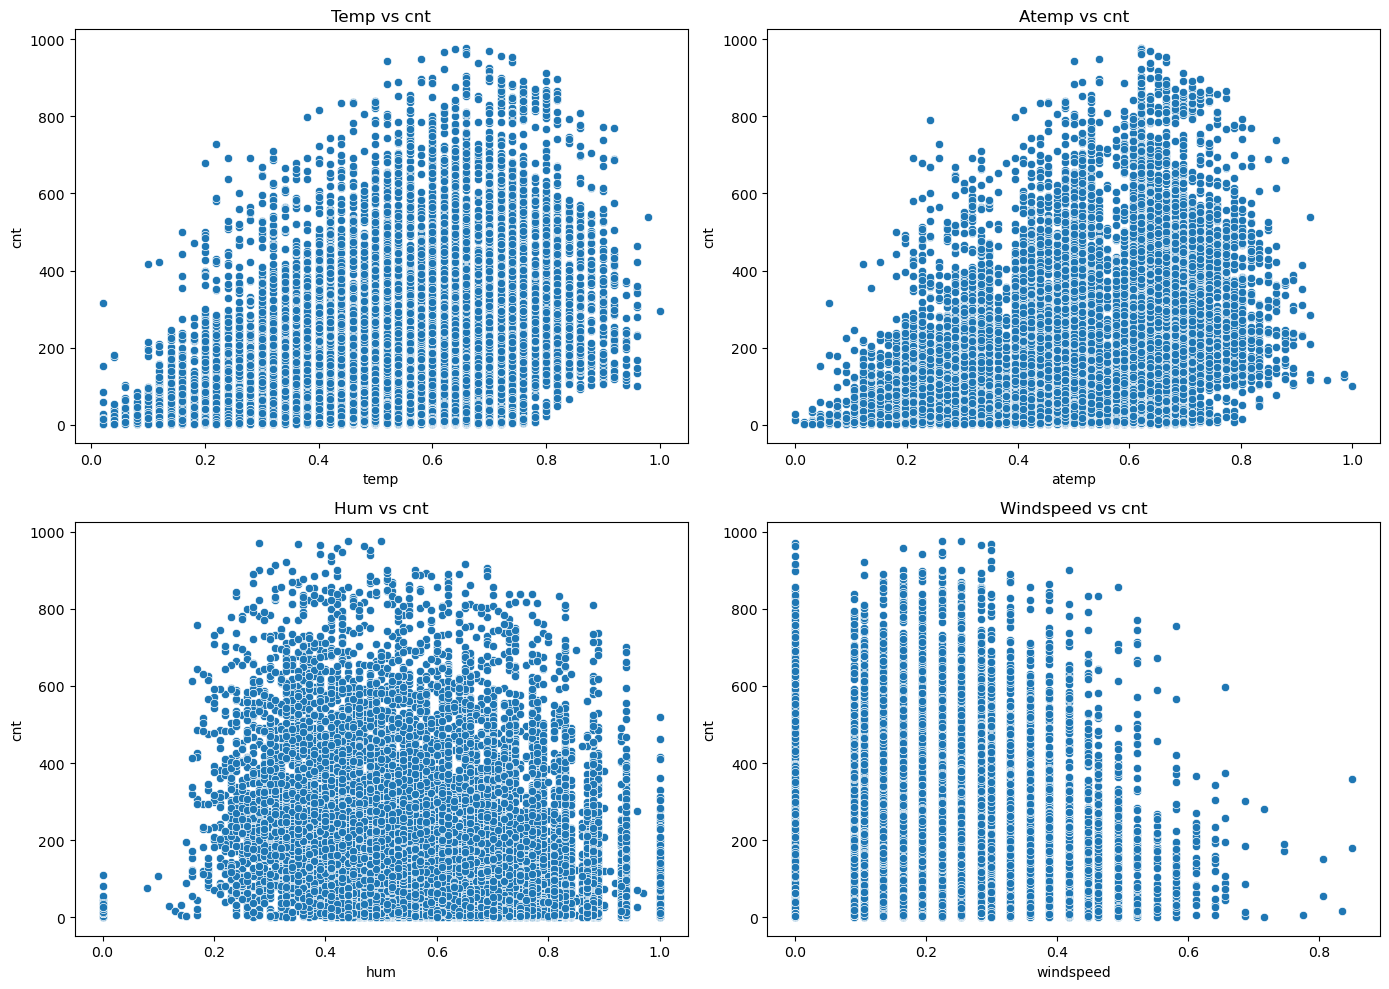

In [14]:
# functie om scatterplots te maken voor numerieke variabele.
def plot_scatterplots(data, columns, target, titles, figsize=(14, 10)):
    """
    Maakt meerdere scatterplots van een lijst met kolommen tegen een targetkolom.

    Parameters:
    - data (DataFrame): De dataset
    - columns (list): Lijst van kolomnamen voor de x-assen
    - target (str): De kolomnaam voor de y-as
    - titles (list): Lijst van titels voor elke subplot
    - figsize (tuple): Grootte van de gehele figuur
    """
    n_cols = 2 
    n_rows = (len(columns) + n_cols - 1) // n_cols 
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.ravel()

    for i, column in enumerate(columns):
        sns.scatterplot(x=column, y=target, data=data, ax=axes[i])
        axes[i].set_title(titles[i])
        axes[i].set_xlabel(column)
        axes[i].set_ylabel(target)

    plt.tight_layout()
    plt.show()

    
# toevoegen op de kolommen met numerieke waarde   
columns = ['temp', 'atemp', 'hum', 'windspeed']
titles = ['Temp vs cnt', 'Atemp vs cnt', 'Hum vs cnt', 'Windspeed vs cnt']
plot_scatterplots(data=train, columns=columns, target='cnt', titles=titles)

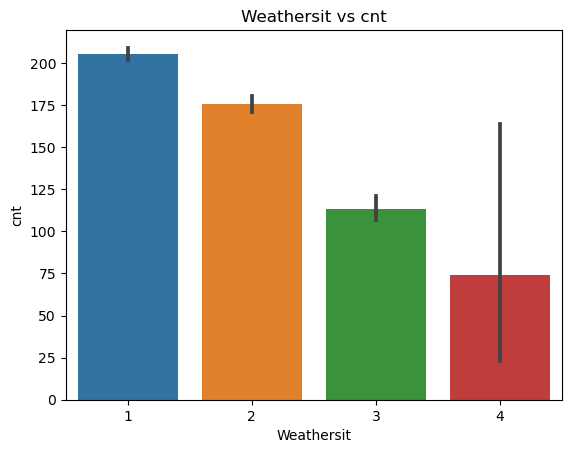

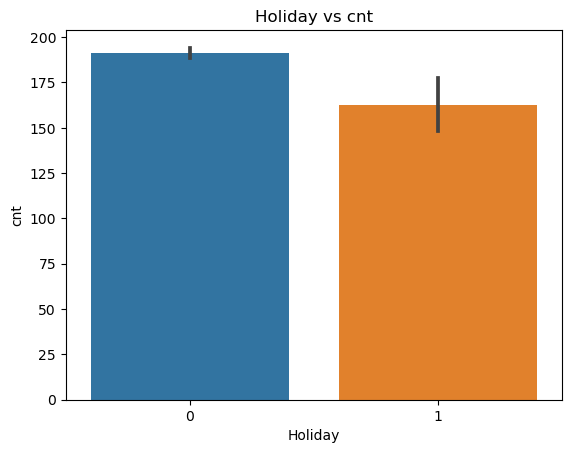

In [15]:
# functie om een staafdiagram te maken van verhuur aantallen bij verschillende weer situaties
def plot_bar_chart(x_column, y_column, data, title, xlabel, ylabel):
    """
    Functie om een staafdiagram te maken voor een bepaalde kolom versus een andere.
    
    Parameters:
    - x_column: De naam van de kolom voor de x-as.
    - y_column: De naam van de kolom voor de y-as.
    - data: De DataFrame met de gegevens.
    - title: De titel van de grafiek.
    - xlabel: De label voor de x-as.
    - ylabel: De label voor de y-as.
    """
    sns.barplot(x=x_column, y=y_column, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_bar_chart(x_column='weathersit', y_column='cnt', data=train, title='Weathersit vs cnt', xlabel='Weathersit', ylabel='cnt')
plot_bar_chart(x_column='holiday', y_column='cnt', data=train, title='Holiday vs cnt', xlabel='Holiday', ylabel='cnt')

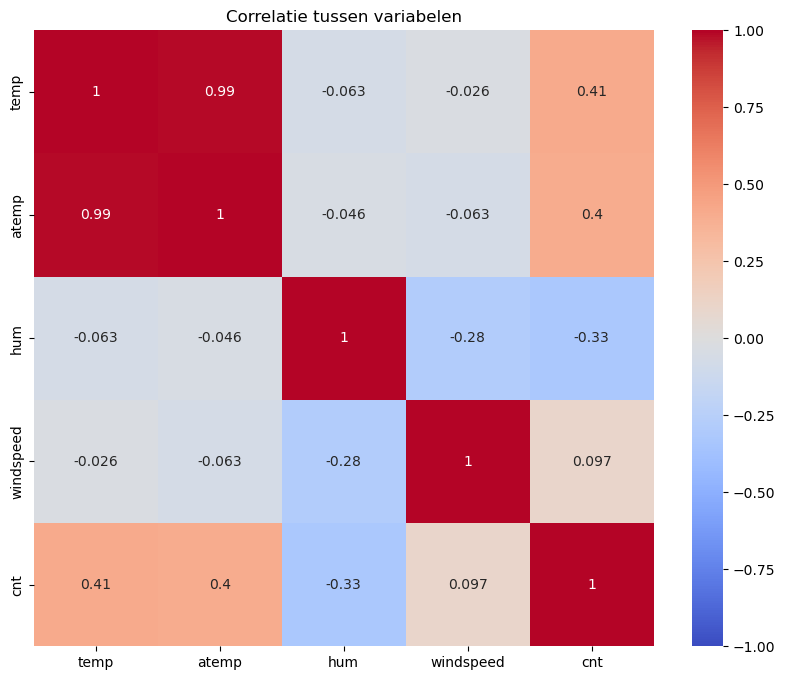

In [12]:
# Correlatieplot tussen de numerieke variabelen
correlation_matrix = train[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlatie tussen variabelen')
plt.show()

### 1.2.3. Data correlatie tijdserie elementen

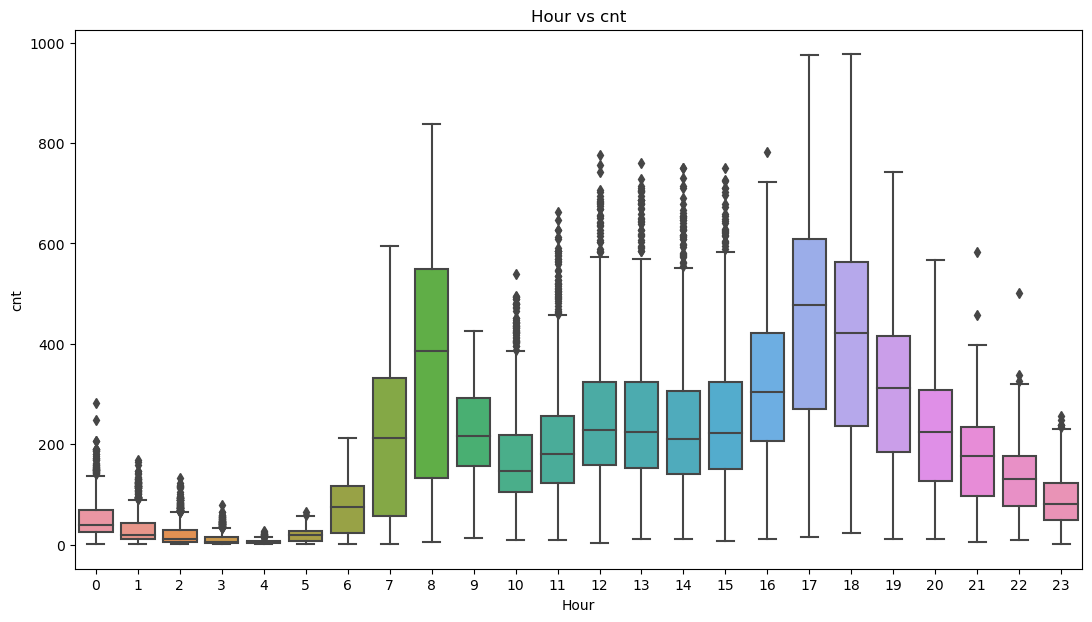

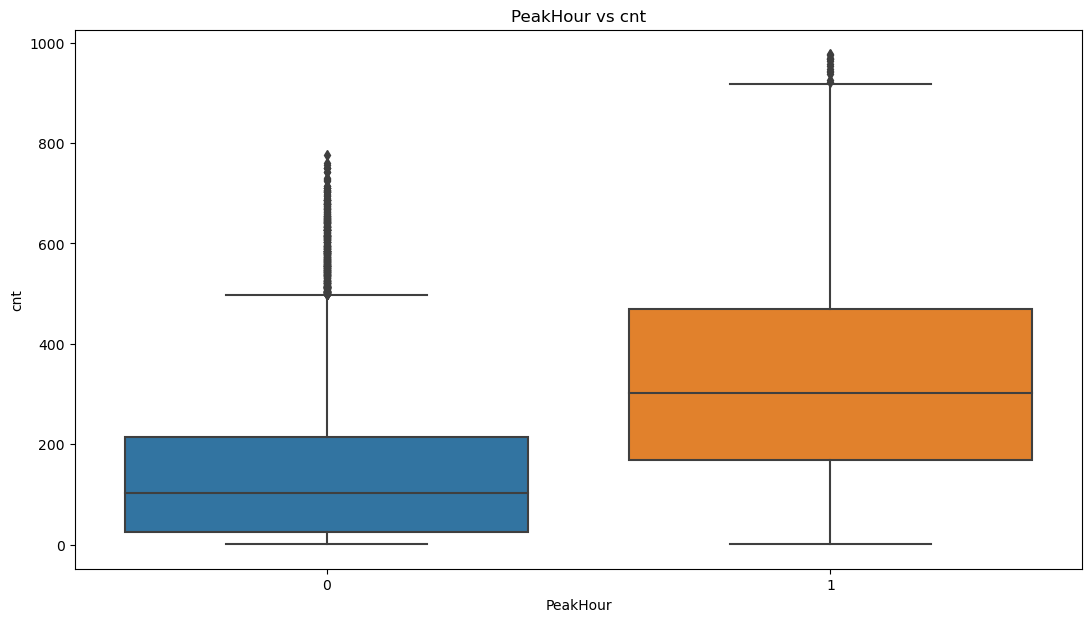

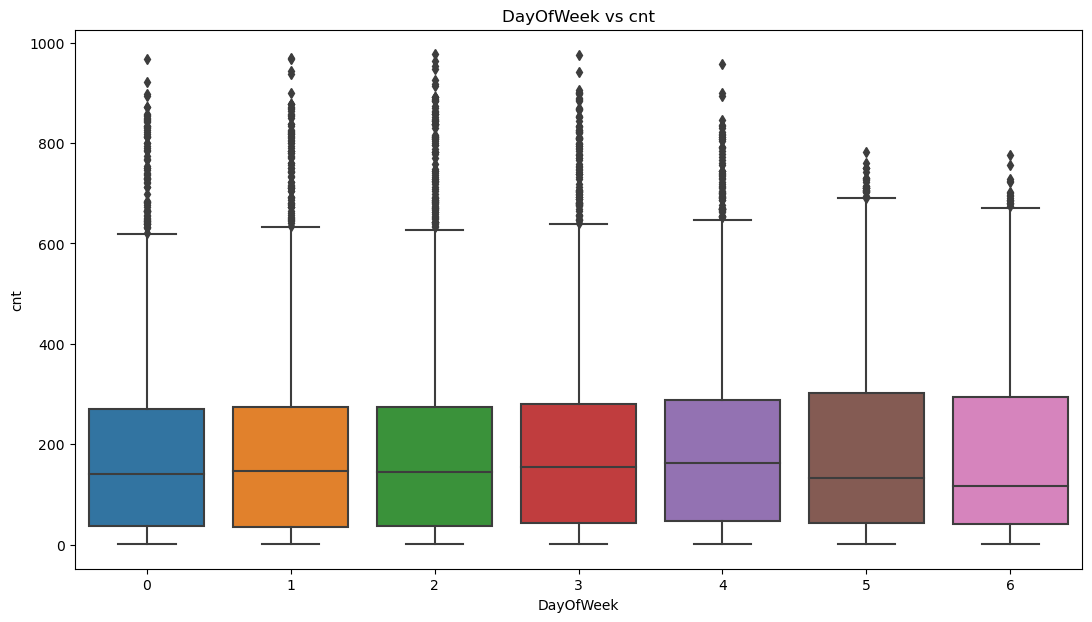

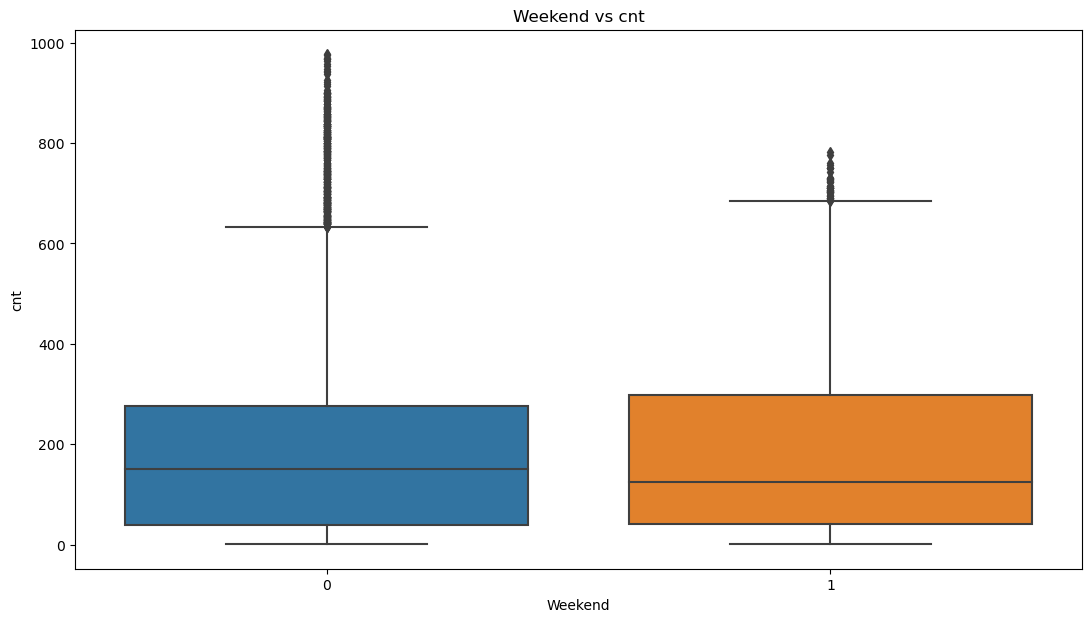

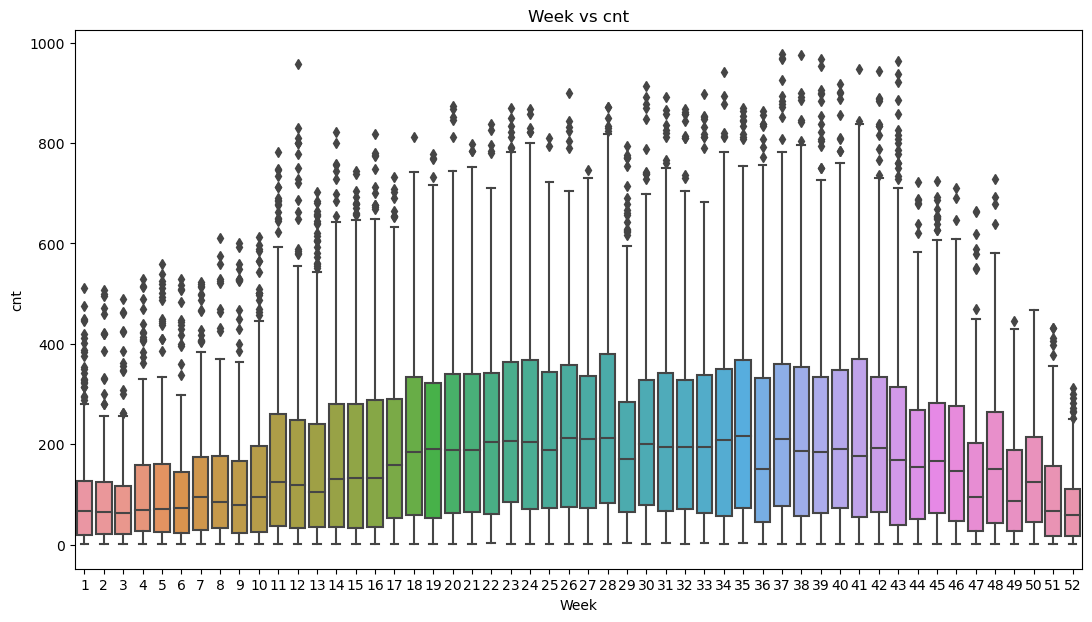

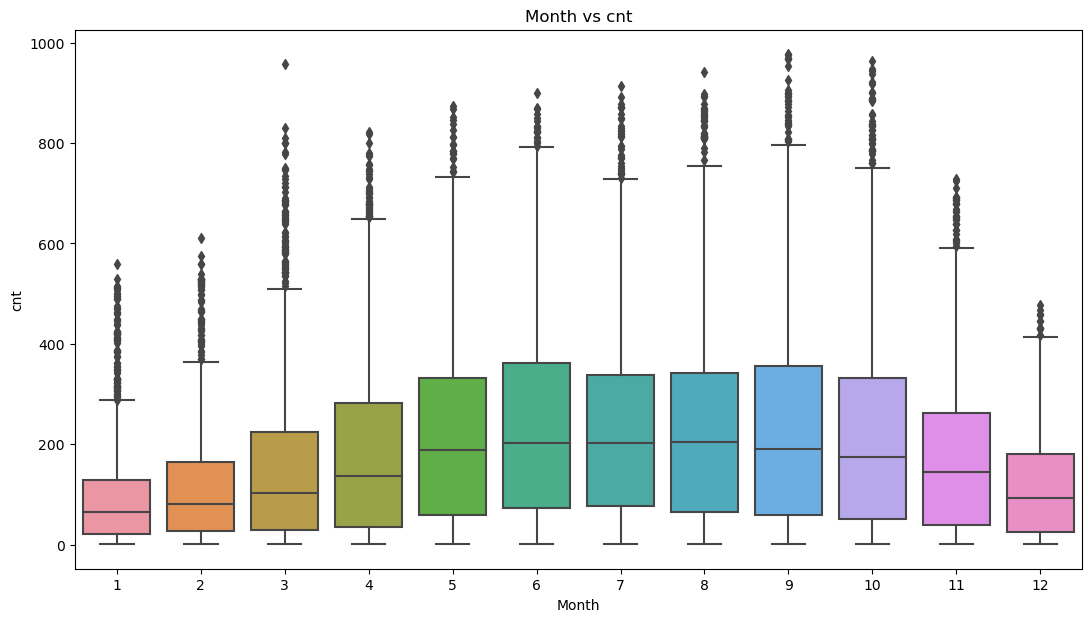

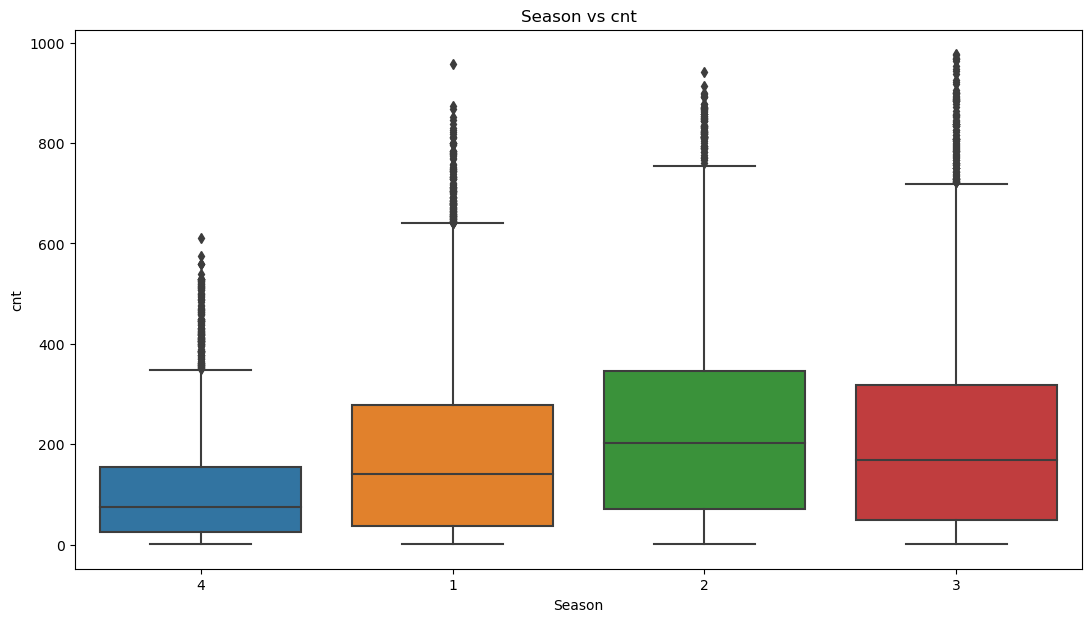

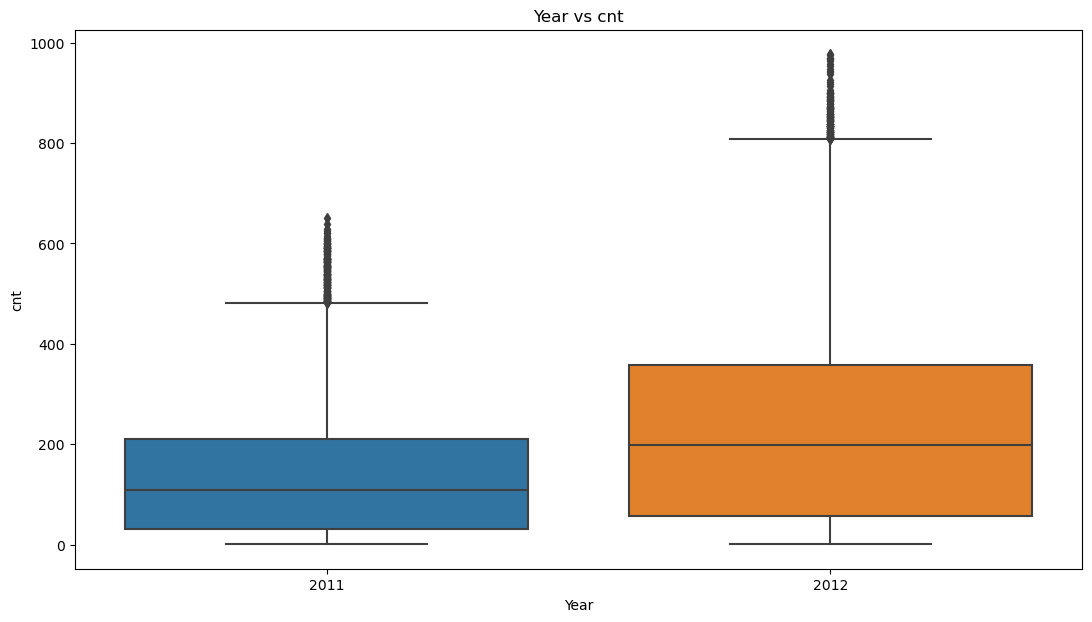

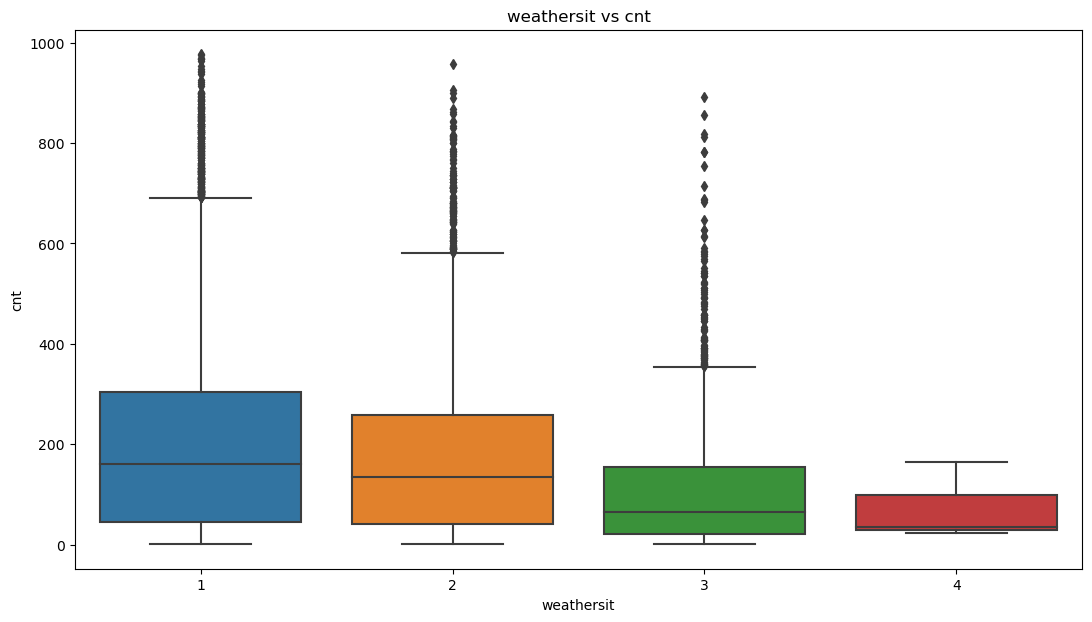

In [16]:
# functie om boxplot te maken voor de categorische variabele.

def generate_boxplots(data, target, columns, figsize=(13, 7)):
    """
    Genereert boxplots voor een lijst van categorische kolommen.
    
    Parameters:
    - data: DataFrame waarin de gegevens staan.
    - target: de target kolom.
    - columns: Een lijst van categorische kolommen.
    - figsize: Afmetingen van de individuele plots.
    """
    for column in columns:
        plt.figure(figsize=figsize)
        sns.boxplot(data=data, x=column, y=target)
        plt.title(f"{column} vs {target}")
        plt.xlabel(column)
        plt.ylabel(target)
        plt.show()

# Lijst van categorische variabelen
categorical_columns = ['Hour', 'PeakHour', 'DayOfWeek', 'Weekend', 'Week', 'Month', 'Season', 'Year', 'weathersit']


# Aanroepen van de functie
generate_boxplots(train, 'cnt', categorical_columns)

### 1.2.4. Fourier Analyse

#### Wat is een Fourier-analyse?

De Fourier-analyse is een techniek om een tijdreeks te ontbinden in een reeks sinus- en cosinusfuncties. Hierbij wordt de data omgezet van het tijdsdomein naar het frequentiedomein. In het tijdsdomein zien we hoe een variabele zich ontwikkelt over de tijd, terwijl we in het frequentiedomein kunnen identificeren welke periodieke patronen (cycli) aanwezig zijn in de data.

Deze techniek is vooral nuttig om dominante patronen te ontdekken, zoals dagelijkse of seizoensgebonden cycli, die vaak terugkeren in tijdreeksdata.

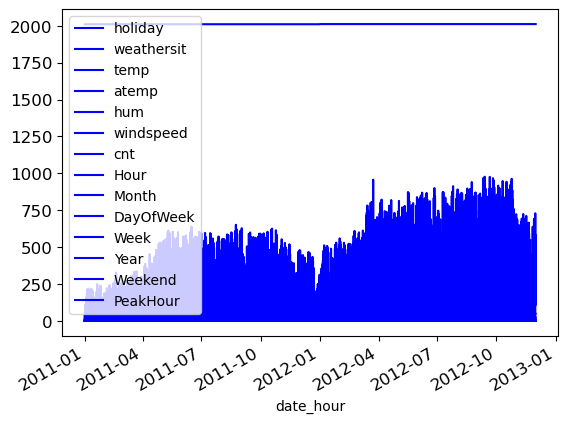

In [14]:
train.plot(color='blue', fontsize=12)
plt.show()

#### Hoe werkt de Fourier-analyse
De Fourier-analyse bestaat uit vier hoofdcomponenten:
1. FFT-berekening: De functie np.fft.fft voert de Fast Fourier Transform (FFT) uit, een efficiënte berekening om de tijdreeks op te splitsen in sinus- en cosinuscomponenten.
2. Amplitude: De amplitude geeft aan hoe sterk een bepaalde frequentie in de data voorkomt. Hoe hoger de amplitude, hoe dominanter het patroon is op die specifieke frequentie.
3. Pieken identificeren: Met find_peaks zoeken we naar de dominante frequenties, oftewel de cycli die het sterkst aanwezig zijn.
4. Periode berekenen: Frequenties worden omgerekend naar perioden (de tijdseenheden waarin een cyclus zich herhaalt) met de formule:

$$
Periode = 1/Frequentie
$$

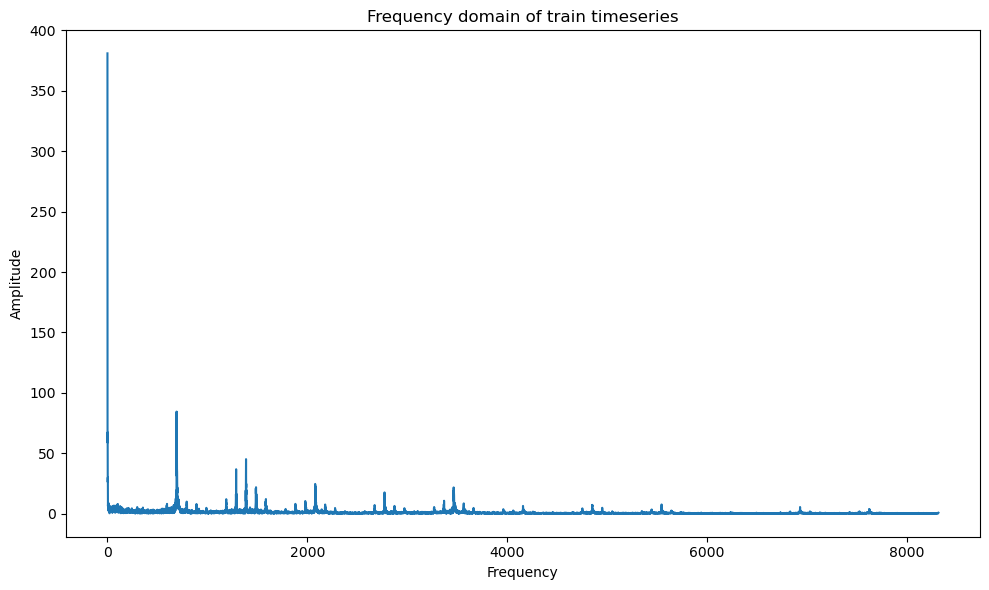

In [15]:
# Toepassen van de fourier transformatie op de train data
N = len(train)

train_ft = np.fft.fft(train['cnt'])

magnitude = 2.0 / N * np.abs(train_ft[:N//2])

# plotten van de fourier transformatie

plt.figure(figsize=(10, 6))
plt.plot(magnitude)
plt.xlabel('Frequency') 
plt.ylabel('Amplitude')
plt.title("Frequency domain of train timeseries")

plt.tight_layout()
plt.show()

#### Interpretatie van de Fourier grafiek
In het frequentiespectrum kunnen we het volgende aflezen:
- De x-as geeft de frequentie weer (hoe vaak een patroon voorkomt).
- De y-as toont de amplitude (de sterkte van deze frequentie).
- Pieken geven aan bij welke frequenties er sterke periodieke patronen aanwezig zijn.

Peaks found at [   2    4  692  694 1288 1387]


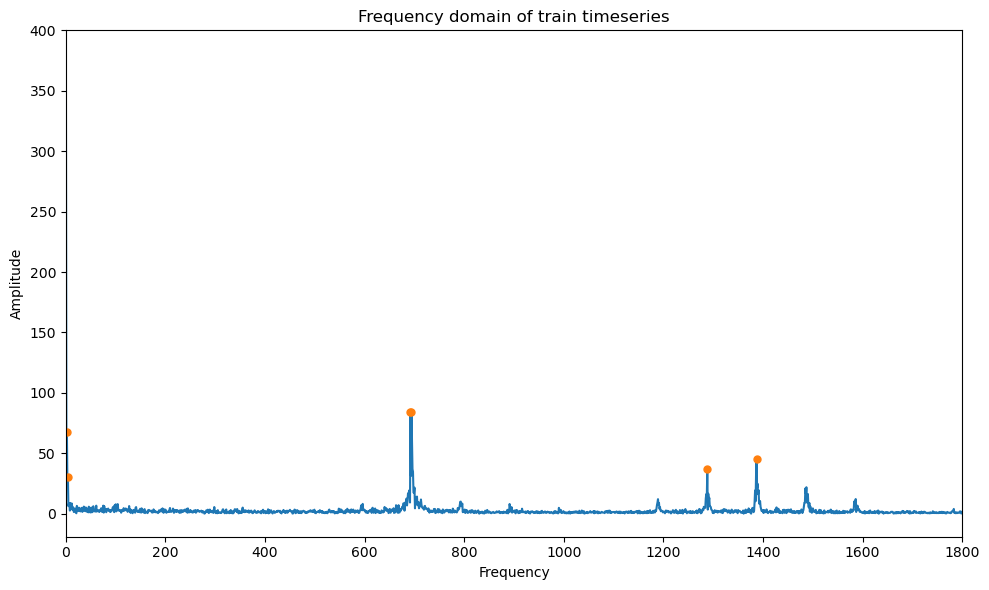

In [16]:
# Vinden van de peaks in de fourier transformatie

peaks, _ = find_peaks(magnitude, height=25)
print(f"Peaks found at {peaks}")

# Plotten van de fourier transformatie met de peaks

plt.figure(figsize=(10, 6))
plt.plot(magnitude)
plt.xlabel('Frequency')
plt.xlim(0,1800)
plt.ylabel('Amplitude')
plt.title("Frequency domain of train timeseries")

plt.plot(peaks, magnitude[peaks], ".", markersize=10)

plt.tight_layout()
plt.show()

In [17]:
# (Fourier Transforms (SciPy.FFT) — SciPY v1.14.1 Manual, z.d.)
# (Numpy.fft.fftfreq — NumPy v2.1 Manual, z.d.)
peak_periods = 1 / np.fft.fftfreq(N, d=1)[:N//2][peaks]
for peak in peak_periods:
    print(f"Peak period: {round(peak,2)} hours")

Peak period: 8318.5 hours
Peak period: 4159.25 hours
Peak period: 24.04 hours
Peak period: 23.97 hours
Peak period: 12.92 hours
Peak period: 11.99 hours


#### Resultaat van de Fourier-analyse

De Fourier-analyse heeft de volgende periodieke signalen in de data geïdentificeerd:

- 8318.5 uur en 4159.25 uur: Dit duidt op langlopende patronen, mogelijk seizoensgebonden trends (bijvoorbeeld jaarlijks terugkerende gebeurtenissen).  
- 24.04 uur en 23.97 uur: Deze frequenties wijzen op een dagelijkse cyclus, wat overeenkomt met het dagelijkse gebruikspatroon van fietsverhuur.  
- 12.92 uur en 11.99 uur: Dit duidt op een halfdaagse cyclus, mogelijk gerelateerd aan de ochtend- en avondspits.  

#### Conclusie
De Fourier-analyse toont aan dat er zowel korte cycli (dagelijks en halfdaags) als langere cycli (seizoensgebonden) aanwezig zijn in de data. Deze inzichten zijn waardevol voor het bouwen van voorspellende modellen, omdat ze helpen rekening te houden met de terugkerende patronen in de tijdreeks.

### 1.2.5. Trend

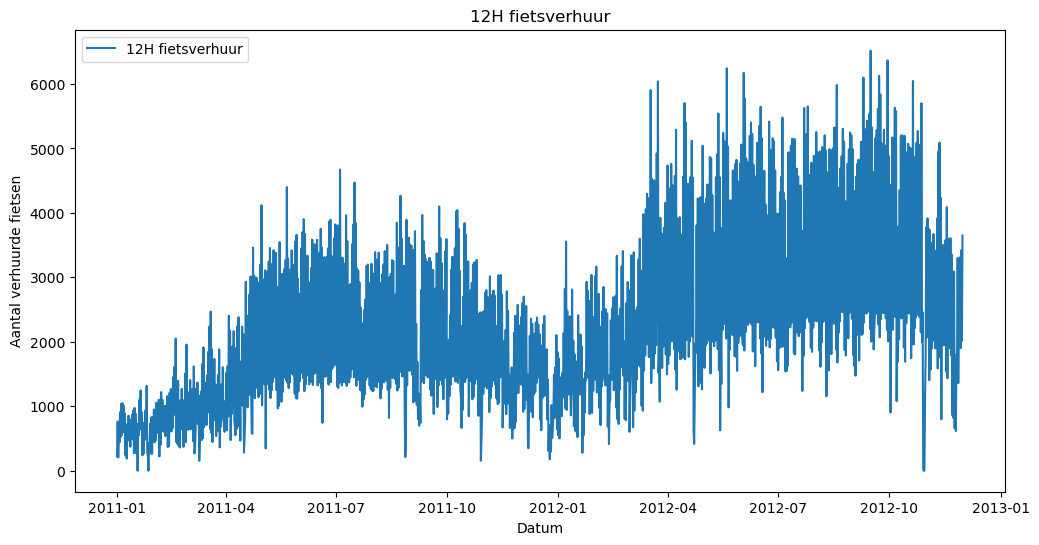

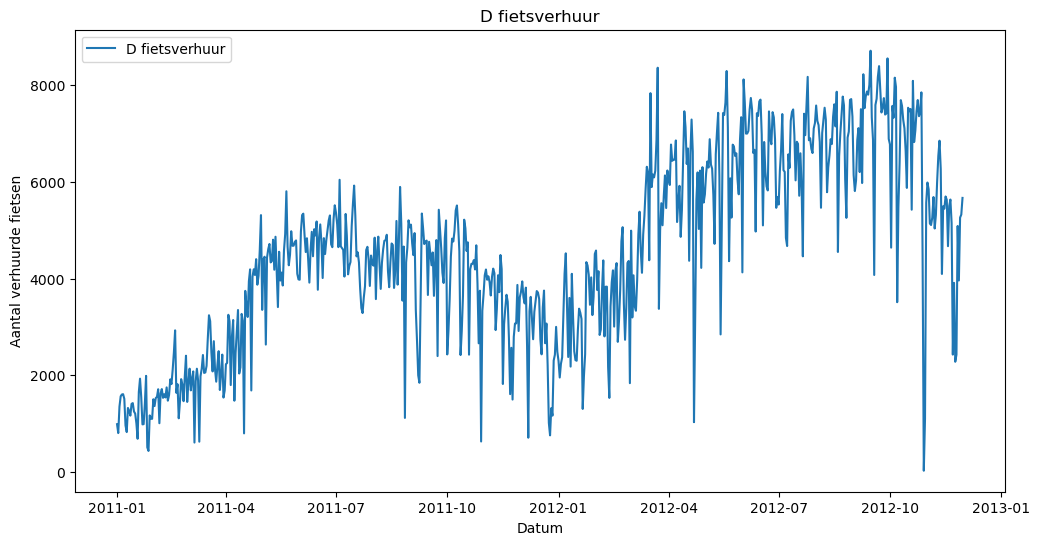

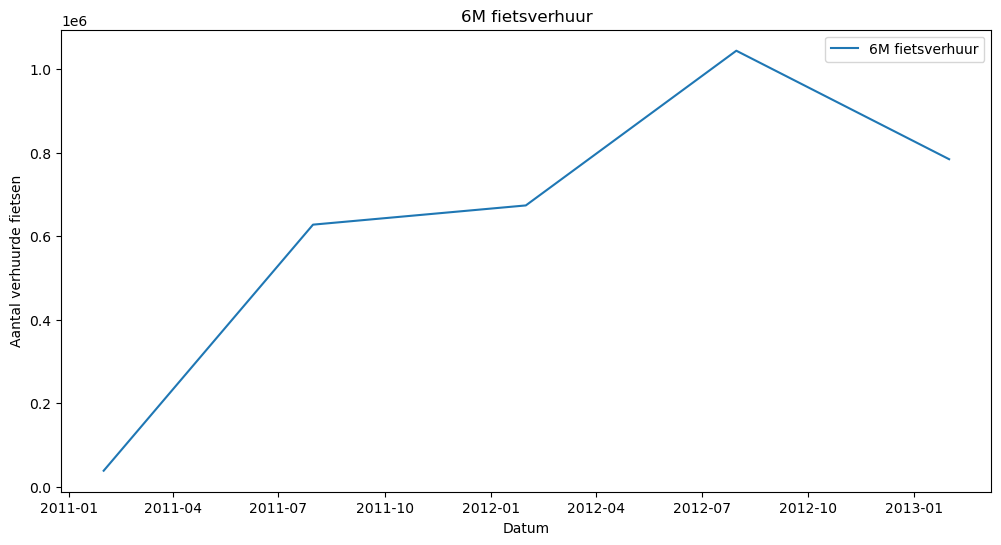

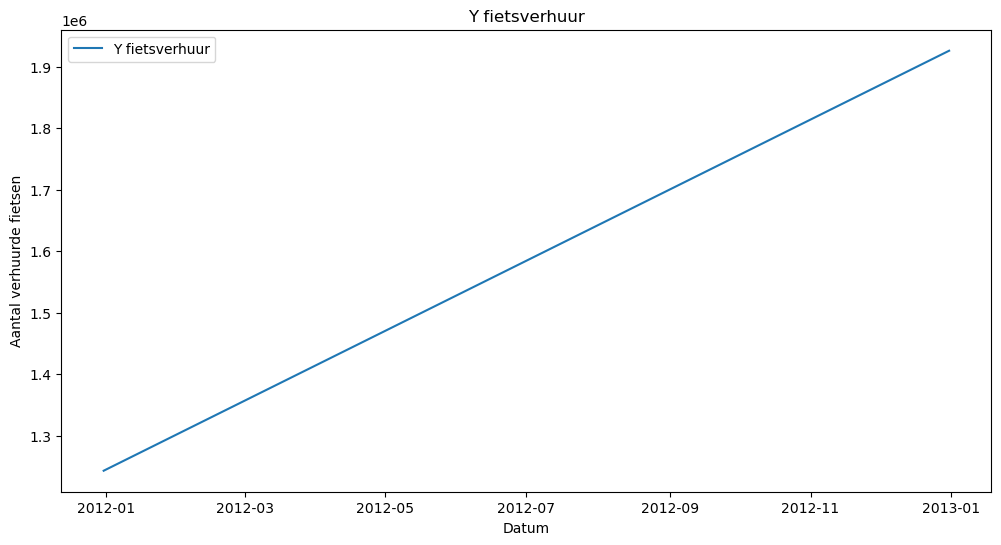

In [18]:
trend = ['12H', 'D', '6M', 'Y']
dail = []
for t in trend:
    daily_rentals = train['cnt'].resample(t).sum()
    dail.append(daily_rentals)
    plt.figure(figsize=(12, 6))
    plt.plot(daily_rentals, label=f'{t} fietsverhuur')
    plt.title(f'{t} fietsverhuur')
    plt.xlabel('Datum')
    plt.ylabel('Aantal verhuurde fietsen')
    plt.legend()
    plt.show()

### Uitleg Trend:
We hebben de trend van de fietsverhuur bekeken op basis van 4 verschillende tijdsintervallen: 12 uur, 1 dag, 6 maanden en 1 jaar.   
Deze tijdsintervallen zijn gekozen op basis van de fourier analyse, waar we frequentiepieken hebben gevonden op 12 uur, 1 dag, 6 maanden en 1 jaar.     
De trendlijnen laten zien dat er een stijging is bij elke tijdsinterval, en zeker bij de 6 maanden en 1 jaar trendlijnen is goed te zien dat de trend lineair stijgt.   

### 1.2.6. Missende Waarden en outliers

In [8]:
# Onderzoek naar missende waarden
print('Missende waarden in de train data:')
display(train.isnull().sum())
print('Missende waarden in de test data:')
display(test.isnull().sum())

# Onderzoek naar duplicaten
print('Duplicaten in de train data:')
display(train.duplicated().sum())
print('Duplicaten in de test data:')
display(test.duplicated().sum())


Missende waarden in de train data:


holiday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
Hour          0
Season        0
Month         0
DayOfWeek     0
Week          0
Year          0
Weekend       0
PeakHour      0
dtype: int64

Missende waarden in de test data:


holiday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
Hour          0
Season        0
Month         0
DayOfWeek     0
Week          0
Year          0
Weekend       0
PeakHour      0
dtype: int64

Duplicaten in de train data:


0

Duplicaten in de test data:


0

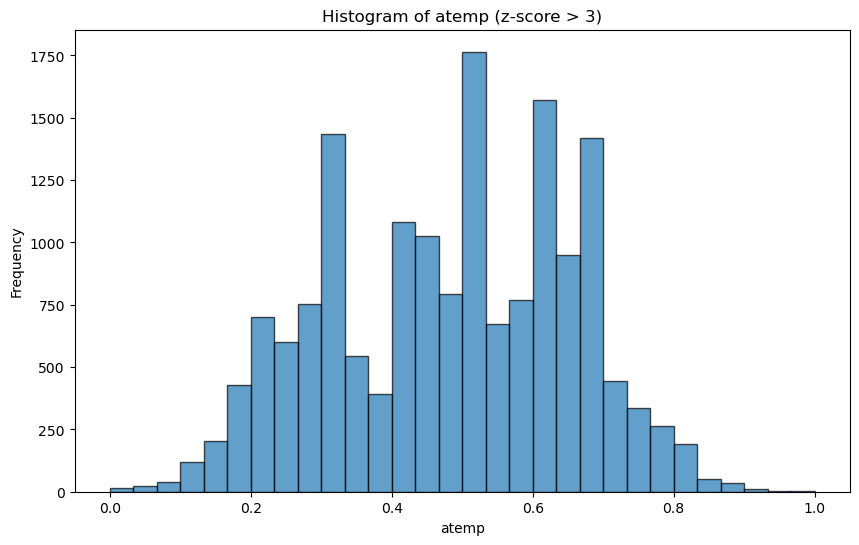

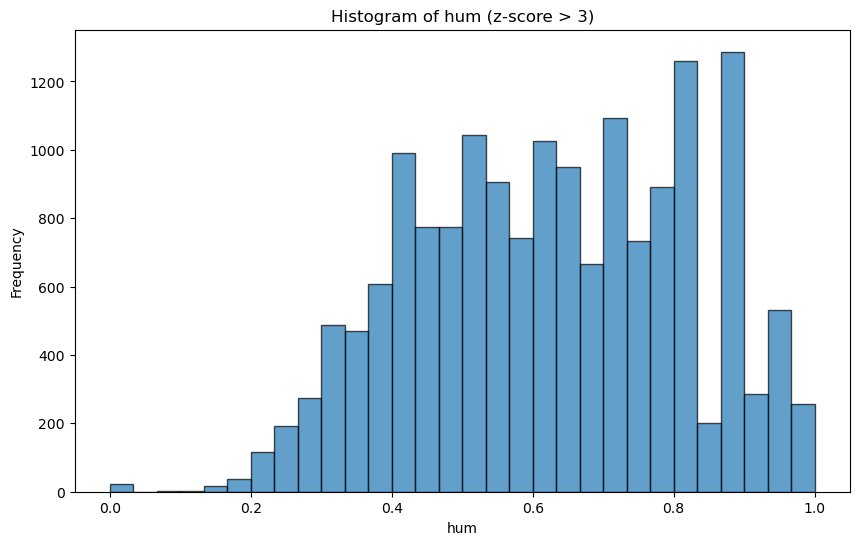

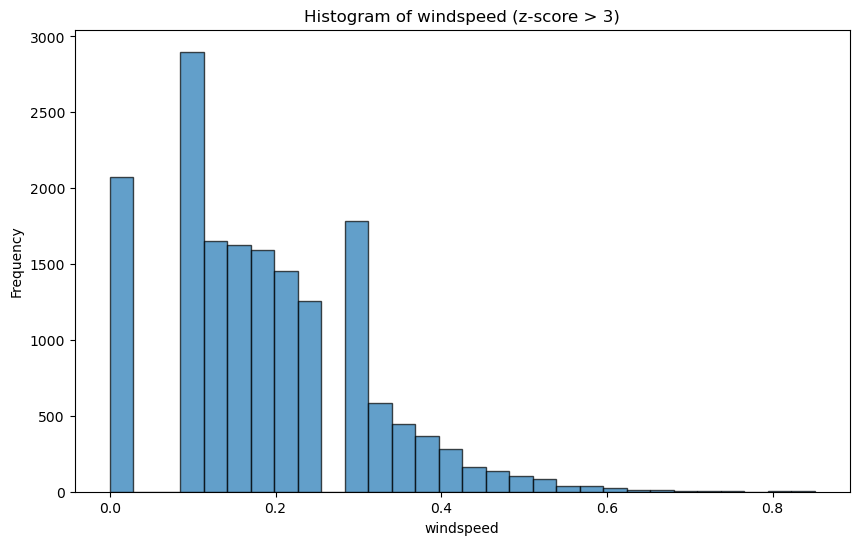

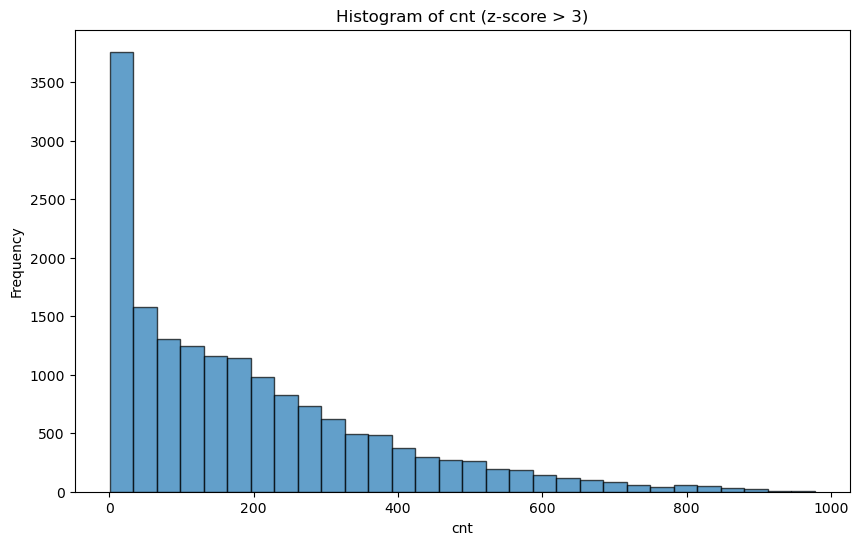

In [ ]:
# onderzoek naar outliers
# Importeren van de z_score, en de toepassing van de z_score
z_scores = train[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].apply(zscore)
 
columns_to_plot = z_scores.columns[(z_scores.abs() > 3).any()]
 
# De z_scores plotten in histogrammen om te kijken naar outliers
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.hist(train[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column} (z-score > 3)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Bron: (wiskunde portfolio, jaar 1 semester 2)

In [9]:
# zoek naar de nul waarden van hum in de train data
print('De nul waarden van hum in de train data:')
display(train[train['hum'] == 0])
print(train.shape)

# Alle 0 waarden in de 'hum' kolom zijn afkomstig van 1 dag, en dat is 2011-03-10.
# De 0 waarden zijn waarschijnlijk een fout in de data, en kan verwijderd worden omdat het maar 1 dag van de data is.

# Verwijderen van de 0 waarden in de 'hum' kolom
train = train[train['hum'] != 0]
print(train.shape)



De nul waarden van hum in de train data:


holiday  weathersit  temp   atemp  hum  windspeed  cnt  \
date_hour                                                                     
2011-03-10 00:00:00        0           3  0.34  0.3182  0.0     0.2537    3   
2011-03-10 01:00:00        0           3  0.34  0.3182  0.0     0.2537    2   
2011-03-10 02:00:00        0           3  0.34  0.3182  0.0     0.2537    1   
2011-03-10 05:00:00        0           3  0.36  0.3485  0.0     0.1940    3   
2011-03-10 06:00:00        0           3  0.36  0.3333  0.0     0.3284   12   
2011-03-10 07:00:00        0           3  0.38  0.3939  0.0     0.2239   37   
2011-03-10 08:00:00        0           3  0.38  0.3939  0.0     0.2836   44   
2011-03-10 09:00:00        0           3  0.40  0.4091  0.0     0.2239   24   
2011-03-10 10:00:00        0           3  0.40  0.4091  0.0     0.1642   17   
2011-03-10 11:00:00        0           3  0.40  0.4091  0.0     0.2537   11   
2011-03-10 12:00:00        0           3  0.42  0.4242  0.0     0.2239   34   
2011-03-10 13:00:00        0           3  0.42  0.4242  0.0     0.2239   12   
2011-03-10 14:00:00        0           3  0.44  0.4394  0.0     0.2985   12   
2011-03-10 15:00:00        0           3  0.44  0.4394  0.0     0.2239   14   
2011-03-10 16:00:00        0           3  0.42  0.4242  0.0     0.2537   21   
2011-03-10 17:00:00        0           2  0.44  0.4394  0.0     0.3881  111   
2011-03-10 18:00:00        0           3  0.44  0.4394  0.0     0.3582   82   
2011-03-10 19:00:00        0           3  0.44  0.4394  0.0     0.5821   56   
2011-03-10 20:00:00        0           3  0.36  0.3333  0.0     0.3284   38   
2011-03-10 21:00:00        0           3  0.36  0.3485  0.0     0.2239   28   
2011-03-10 22:00:00        0           2  0.34  0.3333  0.0     0.1343   34   
2011-03-10 23:00:00        0           3  0.34  0.3485  0.0     0.0896   27   

                     Hour Season  Month  DayOfWeek  Week  Year  Weekend  \
date_hour                                                                 
2011-03-10 00:00:00     0      1      3          3    10  2011        0   
2011-03-10 01:00:00     1      1      3          3    10  2011        0   
2011-03-10 02:00:00     2      1      3          3    10  2011        0   
2011-03-10 05:00:00     5      1      3          3    10  2011        0   
2011-03-10 06:00:00     6      1      3          3    10  2011        0   
2011-03-10 07:00:00     7      1      3          3    10  2011        0   
2011-03-10 08:00:00     8      1      3          3    10  2011        0   
2011-03-10 09:00:00     9      1      3          3    10  2011        0   
2011-03-10 10:00:00    10      1      3          3    10  2011        0   
2011-03-10 11:00:00    11      1      3          3    10  2011        0   
2011-03-10 12:00:00    12      1      3          3    10  2011        0   
2011-03-10 13:00:00    13      1      3          3    10  2011        0   
2011-03-10 14:00:00    14      1      3          3    10  2011        0   
2011-03-10 15:00:00    15      1      3          3    10  2011        0   
2011-03-10 16:00:00    16      1      3          3    10  2011        0   
2011-03-10 17:00:00    17      1      3          3    10  2011        0   
2011-03-10 18:00:00    18      1      3          3    10  2011        0   
2011-03-10 19:00:00    19      1      3          3    10  2011        0   
2011-03-10 20:00:00    20      1      3          3    10  2011        0   
2011-03-10 21:00:00    21      1      3          3    10  2011        0   
2011-03-10 22:00:00    22      1      3          3    10  2011        0   
2011-03-10 23:00:00    23      1      3          3    10  2011        0   

                     PeakHour  
date_hour                      
2011-03-10 00:00:00         0  
2011-03-10 01:00:00         0  
2011-03-10 02:00:00         0  
2011-03-10 05:00:00         0  
2011-03-10 06:00:00         0  
2011-03-10 07:00:00         1  
2011-03-10 08:00:00         1  
2011-03-10 09:00:00         1  
201

(16637, 15)
(16615, 15)


### 1.2.7. Bevindingen van de EDA

We zijn begonnen met het bekijken van de basisstatistieken. Hierbij hebben we eerst gekeken naar de datatypes van de train- en testdata. Het viel op dat de 'date_hour'-kolom het datatype object had en daarom moest worden omgezet naar een datetime-datatype. Dit hebben we gedaan met de functie pd.to_datetime().

#### *Correlaties:*
Daarna hebben we tijdserie-elementen toegevoegd aan de data. We hebben ervoor gekozen om de kolommen 'hour', 'Season', 'Month', 'DayOfWeek', 'Week' en 'Year' toe te voegen, omdat deze mogelijk meer inzicht geven in de correlaties binnen de data.

Vervolgens hebben we de correlaties onderzocht. Eerst bekeken we de numerieke variabelen met scatterplots. Hieruit kwamen geen opvallende correlaties naar voren, behalve een lichte correlatie bij de kolommen 'temp' en 'atemp'.

Daarna analyseerden we de categorische variabelen met boxplots. Hierbij zagen we duidelijke verbanden. Opvallende bevindingen waren:

- er werden meer fietsen verhuurd in de zomer dan in de winter
- er vond meer verhuur plaats in de herfst dan in de winter
- we zagen pieken in het aantal verhuurde fietsen rond 7-8 uur 's ochtends en 5-6 uur 's avonds
- in 2011 werden aanzienlijk minder fietsen verhuurd dan in 2012

Om de numerieke waarden verder te analyseren, hebben we een correlatiematrix gemaakt met de standaard correlatiemethode Pearson. Hieruit bleek dat 'temp' en 'atemp' de hoogste correlaties vertonen met 'cnt' (het totale aantal verhuurde fietsen). Daarnaast correleren 'temp' en 'atemp' onderling sterk (correlatie van 0.99). Ook viel op dat de kolom 'hum' een negatieve correlatie heeft met alle andere numerieke variabelen.

#### *Fourier analyse en trend analyse*
We hebben een Fourier-analyse uitgevoerd op de trainingsdata om patronen in de data te identificeren. Hiervoor kozen we een height van 25, zodat we kleinere maar relevante frequenties niet zouden missen. Hieruit bleek dat er pieken waren bij frequenties dicht bij 0 en rond 700, 1300 en 1400.

Deze frequenties hebben we omgezet naar uren om de patronen beter te interpreteren. Dit leidde tot patronen van een halve dag, een dag, een half jaar en een jaar.

Vervolgens hebben we de trends in de data onderzocht, waarbij we ons richtten op de frequenties uit de Fourier-analyse. Voor elk patroon hebben we een grafiek gemaakt. Hieruit bleek dat de lijn van de trend steeds steiler werd. Door deze bevindingen konden we uiteindelijk concluderen dat er sprake is van een lineaire trend in de data.  

#### *Missende waarden en outliers:*  
Als laatste onderdeel van de EDA hebben we gekeken naar missende en onjuiste waarden, evenals outliers in de train- en testdata. We controleerden op missende waarden en duplicaten met .isna().sum() en .duplicated().sum(). Dit leverde geen missende of gedupliceerde waarden op.

Daarna hebben we outliers onderzocht met de z-score, een statistische methode om extreme waarden te identificeren. Hieruit bleek dat er enkele nulwaarden aanwezig waren in de kolom 'hum' (luchtvochtigheid). Na onderzoek concludeerden we dat een luchtvochtigheid van 0 in de praktijk niet mogelijk is. Het ging om slechts 22 waarden, die waarschijnlijk foutief waren ingevoerd. Daarom hebben we besloten deze waarden te verwijderen.

## 2: Time series feature engineering

### 2.1. Feature Engineering

In [10]:

class TimeSeriesFeatures:
    """
    Class to add features to a time series dataset.

    Atributes
    ---------
    self.data : DataFrame
        The time series dataset.
    """
    def __init__(self, df):
        """
        Parameters
        ----------
        df : DataFrame
            The time series dataset.
        columns : list, optional
            List of columns to make dummies from (default: None).
        """
        self.data = df.copy()
    
    def add_fourier(self, frequencies):
        """
        Adds sin and cos Fourier features to the dataset.

        Parameters
        ----------
        frequencies : list
            List of frequencies to add to the dataset.
        """
    
        n = len(self.data)
        for freq in frequencies:
            self.data[f'sin_{freq}'] = np.sin(2 * np.pi * freq * np.arange(n))
            self.data[f'cos_{freq}'] = np.cos(2 * np.pi * freq * np.arange(n))
        return self.data
    
    def add_rolling(self, window, col):
        """
        Adds the rolling mean and standard deviation to the dataset.

        Parameters
        ----------
        window : int
            Number of periods for the rolling window.
        col : str
            The column to calculate the rolling statistics.
        """
       
        self.data[f'rolling_mean_{col}'] = self.data[col].rolling(window=window).mean()
        self.data[f'rolling_std_{col}'] = self.data[col].rolling(window=window).std()
        return self.data
    
    def add_lag(self, lags, col):
        """
        Adds lagged values to the dataset.

        Parameters
        ----------
        lags : list
            List of lags to add.
        col : str
            The column to calculate lagged values.
        """
        
        for lag in lags:
            self.data[f'lag_{lag}_{col}'] = self.data[col].shift(lag)
        return self.data.fillna(method='bfill') 
    
    def add_trend(self):
        """Voegt een lineaire trend toe aan de dataset
        Parameters
        ----------
        df : DataFrame
            De dataset.
        """
    
        # Maak een lineaire trend kolom (bijvoorbeeld: 1, 2, 3, ...)
        self.data['linear_trend'] = np.arange(len(self.data))
    
        return self.data
    

### Rolling Window Feature
De rolling window-functie kan worden gebruikt om statistische waarden te berekenen op basis van een schuivend venster. Hiermee kun je trends in de data analyseren (GeeksforGeeks, 2022b). Het venster, ook wel window genoemd, is een specifiek interval met een vaste lengte dat over de dataset schuift. Voor elk venster worden statistische berekeningen uitgevoerd, zoals de rolling sum of het rolling mean (ook bekend als het moving average). 

### Rolling sum en rolling mean

- Rolling sum: de som van de waarden binnen elk venster.  
- Rolling mean(moving average): het gemiddelde van de waarden binnen elk venster (Vikram, slides timeseries 1).  

Elke moving average correspondeert met het midden van het venster. Als het venster een lengte van 'L' heeft, zullen de eerste L/2 en de laatste L/2 waarden NaN zijn, omdat er onvoldoende data beschikbaar is om het venster volledig te vullen (Collins, 2024b; Vikram, slides Time Series 1). 

### Wat is een venster?
Een venster is een klein gedeelte van de dataset met een vaste lengte 'L'. Het schuift telkens één stap verder door de data.
Bijvoorbeeld:  
Als je dataset bestaat uit [10, 20, 30, 40, 50] en je gebruikt een 'L' van 3, dan worden de vensters als volgt:  
1. [10, 20, 30]
2. [20, 30, 40]  
3. [30, 40, 50]  

Voor elk venster wordt vervolgens een statistische berekening uitgevoerd, zoals het gemiddelde of de som.

### Formule voor de moving average
De moving average wordt berekend als (Wikipedia contributors, 2024):

$$
MA_t = \frac{1}{N} \sum_{i=t-N+1}^{t} x_i
$$

Waarbij:
- L: de grootte van het venster (Wikipedia contributors, 2024),
- x_i: het datapunt op tijdstip \(i\) (Wikipedia contributors, 2024),
- t: het huidige tijdstip (Wikipedia contributors, 2024).

De moving average maakt het mogelijk om lange termijn trends te ontdekken door voorbij dagelijkse schommelingen te kijken. Hiermee kunnen we bijvoorbeeld vaststellen of er een algehele stijging of daling in verhuuraantallen is.

### Formule voor de rolling standard deviation

De standaardafwijking wordt berekend als (Standard Deviation Formulas, z.d.):

$$
\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2}
$$

Waarbij:
- x_i: het datapunt op positie \(i\) (Standard Deviation Formulas, z.d.),
- \(\bar{x}\): het gemiddelde van de waarden binnen het venster (Standard Deviation Formulas, z.d.),
- n: het aantal datapunten in het venster (Standard Deviation Formulas, z.d.).

Ook hebben we de rolling standard deviation toegevoegd. De rolling standard deviation helpt ons de variabiliteit en stabiliteit van de data te begrijpen, wat inzicht geeft in de consistentie van de gegevens.

### features

Wij hebben ervoor gekozen om de moving average en de standaardafwijking te gebruiken om meer inzicht te krijgen in de data. De moving average zorgt ervoor dat er minder ruis in de data zit, waardoor het eenvoudiger wordt om naar algemene trends te kijken. Daarnaast helpt de standaardafwijking om een beter beeld te krijgen van de variatie in de data. Hierdoor kunnen we afwijkingen in de data beter begrijpen. Door deze features toe te voegen, proberen we een beter overzicht te krijgen van de trends en variaties in onze data.    


### Cylci en autocorrelatie
### cycli 
Cycli zijn herhalende patronen die periodiek optreden in de data, maar niet strikt gebonden zijn aan vaste tijdsintervallen zoals seizoenen of jaren.

#### Autocorrelatie
Autocorrelatie meet de mate van overeenkomst tussen een tijdreeks datapunt en een lagged versie van zichzelf op verschillende tijdsintervallen. Het is vergelijkbaar met de correlatie tussen twee verschillende tijdreeksen, maar hierbij wordt dezelfde tijdreeks twee keer gebruikt: eenmaal in zijn originele vorm en een andere keer met verschuivingen in de tijd (Lendave, 2022).

#### Partial autocorrelatie
Bij partiële autocorrelatie wordt de relatie beschreven tussen een observatie in een tijdreeks en de data van eerdere stappen, waarbij de correlaties tussen de observaties ertussen worden genegeerd (Lendave, 2022).

#### Autocorrelatiefunctie (ACF)
De autocorrelatie is de relatie tussen twee waarden in een tijdreeks. Het aantal intervallen tussen twee metingen wordt de 'lag' genoemd. Bijvoorbeeld, er is een lag van één seconde tussen de huidige observatie en de vorige observatie. Als je verder teruggaat in de tijd, wordt de lag groter, bijvoorbeeld lag 2, enzovoort (Lendave, 2022).

De ACF kan worden gebruikt om onder andere seizoenspatronen te ontdekken. In een ACF-plot stelt elke staaf een correlatie voor. Als de correlatie 0 is, is deze niet significant (Lendave, 2022).

#### Partiële autocorrelatiefunctie (PACF)
De PACF laat alleen de relatie tussen twee datapunten zien die niet verklaard kan worden door kortere lags. De partiële autocorrelatie voor bijvoorbeeld lag 3 beschrijft de correlatie die niet verklaard wordt door lag 1 en lag 2. Met andere woorden, de partiële correlatie is de unieke correlatie tussen twee observaties, nadat de correlaties tussen de tussenliggende observaties zijn verwijderd (Lendave, 2022).

#### Verschil tussen autocorrelatie en partiële autocorrelatie
De autocorrelatie helpt met het verklaring van kwaliteiten van een timeseries. De partiele autocorrelatie is veel voordeliger tijdens het modelleren. (Lendave, 2022)

In onze code hebben we gebruik gemaakt van verschillende technieken om tijdreeksgegevens te analyseren. We hebben ook verschillende technieken gebruikt om voorspellende modellen te verbeteren. Een belangrijk onderdeel hiervan was het begrijpen van de trend analyse. Deze helpt ons langetermijns gebonden patronen, zoals seizoensgebonden patronen te herkennen.

### Fourier-analyse
We hebben gebruikgemaakt van fourier transformaties om periodieke patronen in de tijdreeksdata te ontdekken. Fourier analyse stelt ons in staat om een complexe tijdreeks op te splitsen in een verzameling van sinus- en cosinusgolven. Dit helpt om de seizoensgebonden componenten van data te identificeren.
Wiskundig gezien wordt een Fourier-transformatie als volgt uitgevoerd:
$$
\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \bar{x})^2}
$$
Waarbij:
- \(X(f)\): de Fourier-coëfficiënt voor frequentie \(f\),  
- \(x_t\): de waarde van de tijdreeks op tijdstip \(t\),  
- \(N\): het totale aantal datapunten,  
- \(i\): de imaginaire eenheid.  


Met de Fourier-transformatie kunnen we de oorspronkelijke tijdreeks omzetten naar het frequentiedomein, waarbij we kunnen zien welke frequenties een significante bijdrage leveren aan de variatie in de data. Dit is vooral nuttig om seizoenspatronen te identificeren, zoals dagelijkse of wekelijkse cycli.


Door Fourier-transformatie konden we in onze dataset bepaalde terugkerende patronen ontdekken. Zo ontdektte we pieken in de verhuuraantallen, die verband hielden met bepaalde tijdstippen van de dag of specifieke dagen van de week. De Fourier-analyse maakte het mogelijk om deze frequenties te isoleren en te gebruiken in onze voorspellende modellen. Deze componenten fungeerden als extra features, waardoor onze modellen beter konden anticiperen op seizoensgebonden schommelingen in de verhuurvraag.

### 2.2. Model class aanmaken

In [11]:
class RegressionModels:
    def __init__(self, data, target, dummie_cols=False, shuffle=False, test_size=0.2, random_state=42):
        self.data = data
        if dummie_cols:
            self.data = pd.get_dummies(self.data, columns=dummie_cols)    
        self.data = self.data         
        self.X = self.data.drop([target], axis=1)
        self.y = self.data[[target]]        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=test_size, shuffle=shuffle, random_state=random_state)
    def predict(self, models=None):
        self.fi = {}
        self.models_dict = models
        for model in self.models_dict.items():            
            model[1].fit(self.X_train, self.y_train)
            self.y_train_pred = model[1].predict(self.X_train)
            self.y_test_pred = model[1].predict(self.X_test)
            print(f'train r2 {model}', r2_score(self.y_train, self.y_train_pred))
            print(f'test r2 {model}', r2_score(self.y_test, self.y_test_pred))
            if hasattr (model[1], 'feature_importances_'):
                self.fi[model[0]] = model[1].feature_importances_
    def show_feature_importances(self):
        for fi in self.fi.items():
            feature_importance = pd.DataFrame(fi[1])
            cols = pd.DataFrame(self.X_train.columns)
            df_fi = pd.concat([cols, feature_importance], axis=1)
            df_fi.columns = ['feature', 'importance']
            df_fi.sort_values('importance', ascending=True, inplace=True)
            df_fi.plot(kind='barh', x='feature', y='importance', title=fi[0], figsize=(18, 15))

### 2.3. Iteratie proces

In [13]:
train_features = TimeSeriesFeatures(train)
test_features = TimeSeriesFeatures(test)

# aanmaken dataset met fourier features
data_fourier = train_features.add_fourier([1/24,1/8318.5])
data_fourier = data_fourier.fillna(method='bfill')

# aanmaken dataset met rolling features
data_f_rolling = train_features.add_rolling(24, 'cnt')
data_f_rolling = data_f_rolling.fillna(method='bfill')

# aanmaken dataset met lag features
data_f_r_lag = train_features.add_lag([1,2,3], 'cnt')
data_f_r_lag = data_f_r_lag.fillna(method='bfill')

# aanmaken dataset met trend features
data_f_r_lag_trend = train_features.add_trend()
data_f_r_lag_trend = data_f_r_lag_trend.fillna(method='bfill')

In [14]:
# aanmaken van dictionary met modellen
models = {'LinearRegression': LinearRegression(),
          'RandomForest': RandomForestRegressor(),
          'DecisionTree': DecisionTreeRegressor()}

train r2 ('LinearRegression', LinearRegression()) 0.6914102309272796
test r2 ('LinearRegression', LinearRegression()) 0.6082015523860405


c:\Users\Miche\mapvoornotebook\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


train r2 ('RandomForest', RandomForestRegressor()) 0.9894134529892452
test r2 ('RandomForest', RandomForestRegressor()) 0.8541731390616008
train r2 ('DecisionTree', DecisionTreeRegressor()) 1.0
test r2 ('DecisionTree', DecisionTreeRegressor()) 0.7800659258476009


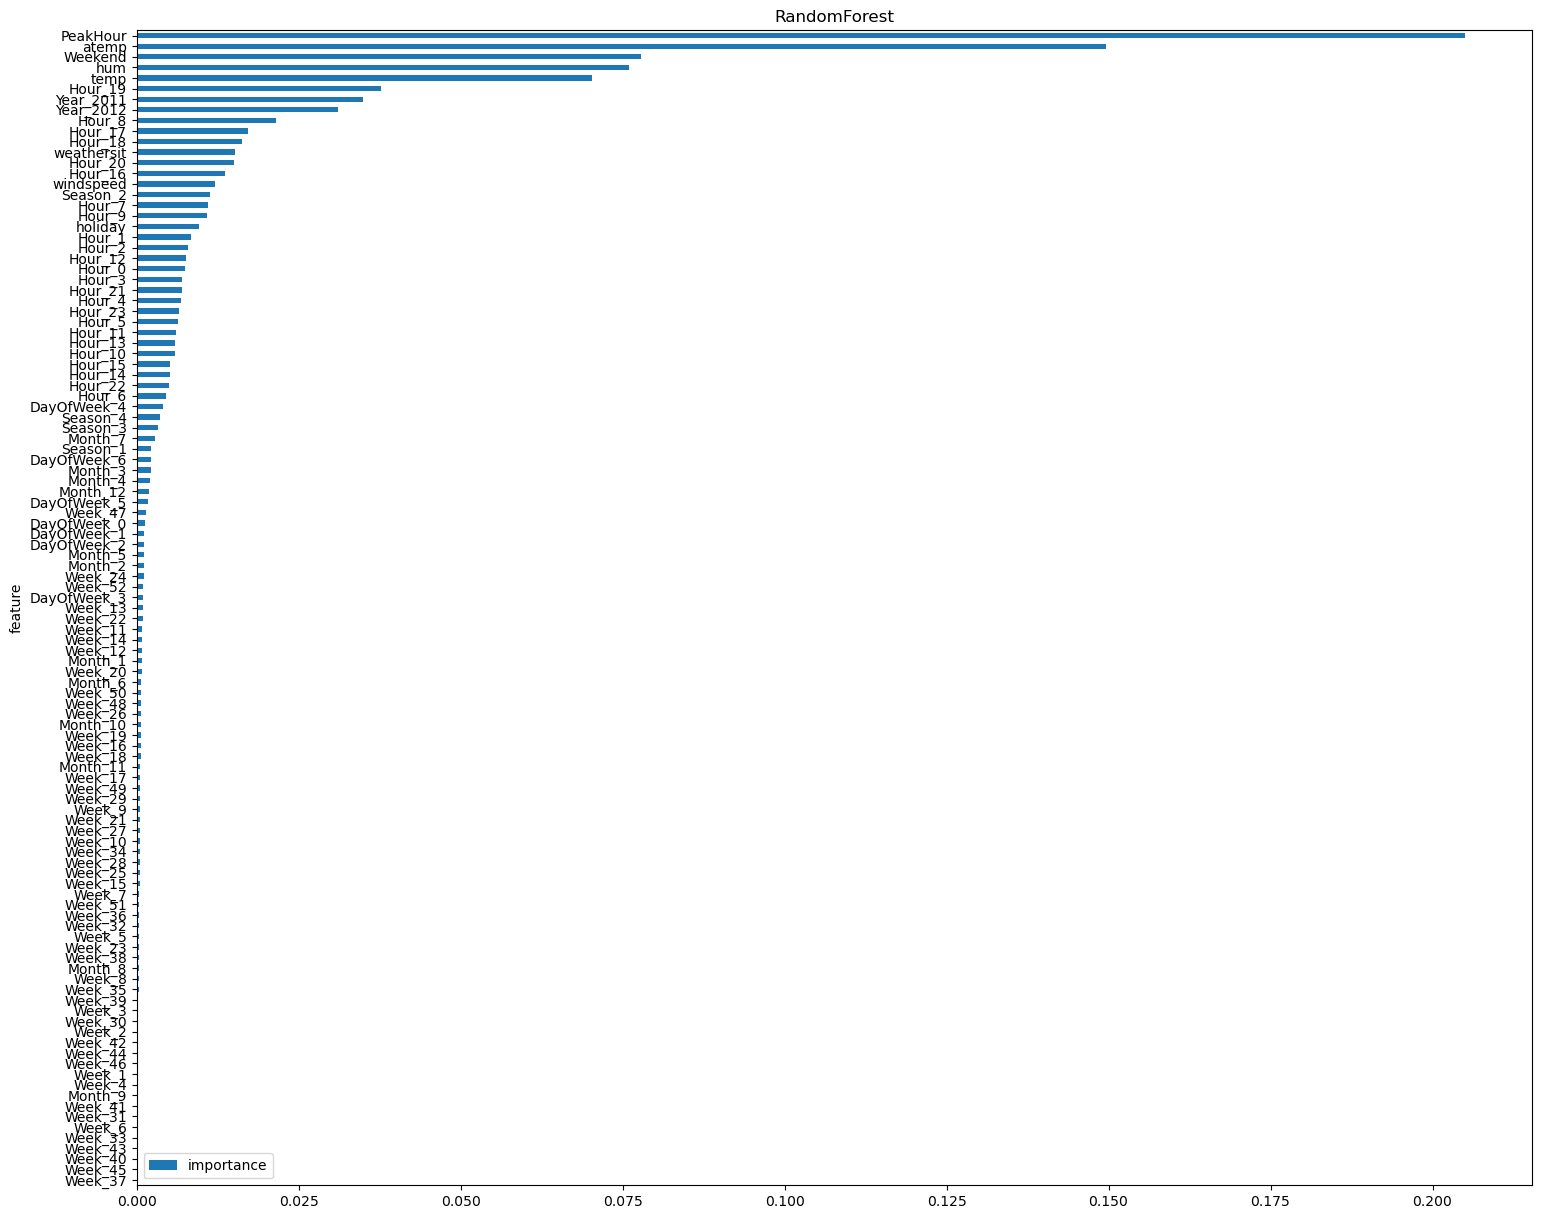

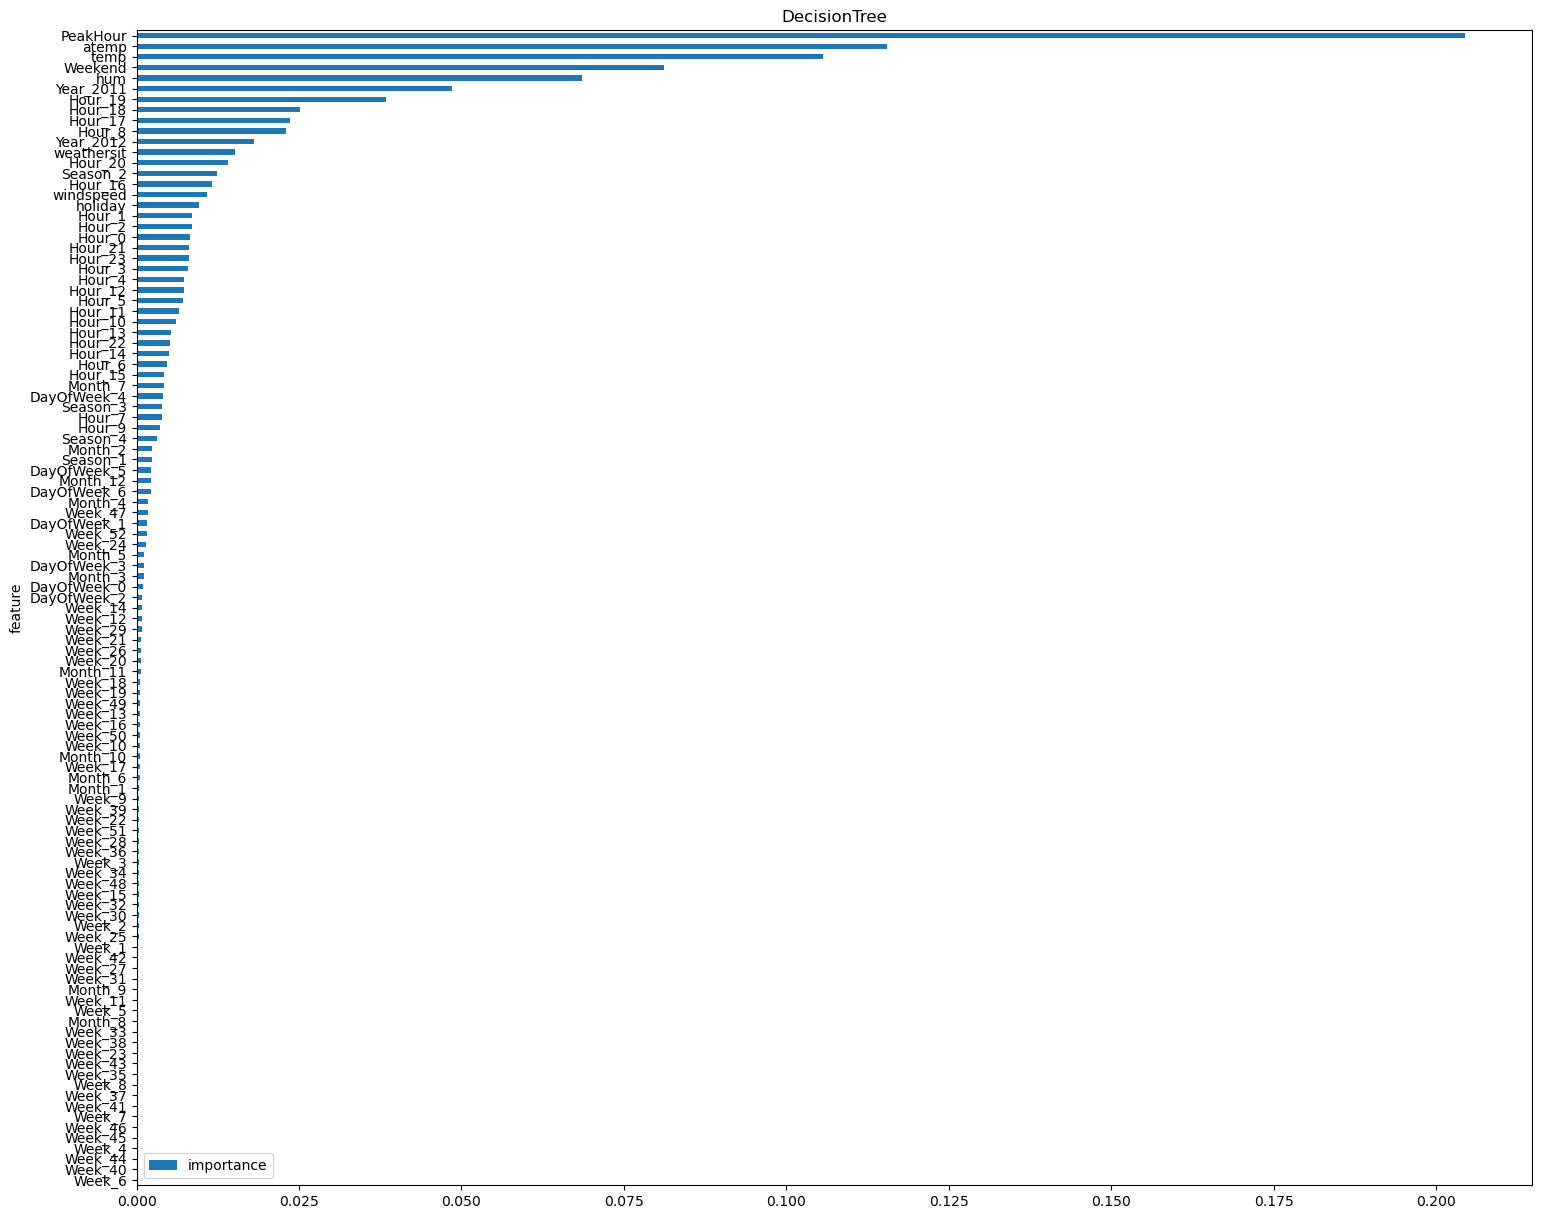

In [15]:
# aanmaken dataset zonder time series features
Regressie = RegressionModels(train, 'cnt', dummie_cols=['Season','Hour', 'Month', 'DayOfWeek', 'Week', 'Year'], shuffle=False, test_size=0.2, random_state=42)
Regressie.predict(models)
Regressie.show_feature_importances()

train r2 ('LinearRegression', LinearRegression()) 0.6982899667200451
test r2 ('LinearRegression', LinearRegression()) 0.5304788296702014


c:\Users\Miche\mapvoornotebook\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


train r2 ('RandomForest', RandomForestRegressor()) 0.9914541100187894
test r2 ('RandomForest', RandomForestRegressor()) 0.8059011660990147
train r2 ('DecisionTree', DecisionTreeRegressor()) 1.0
test r2 ('DecisionTree', DecisionTreeRegressor()) 0.711986737252043


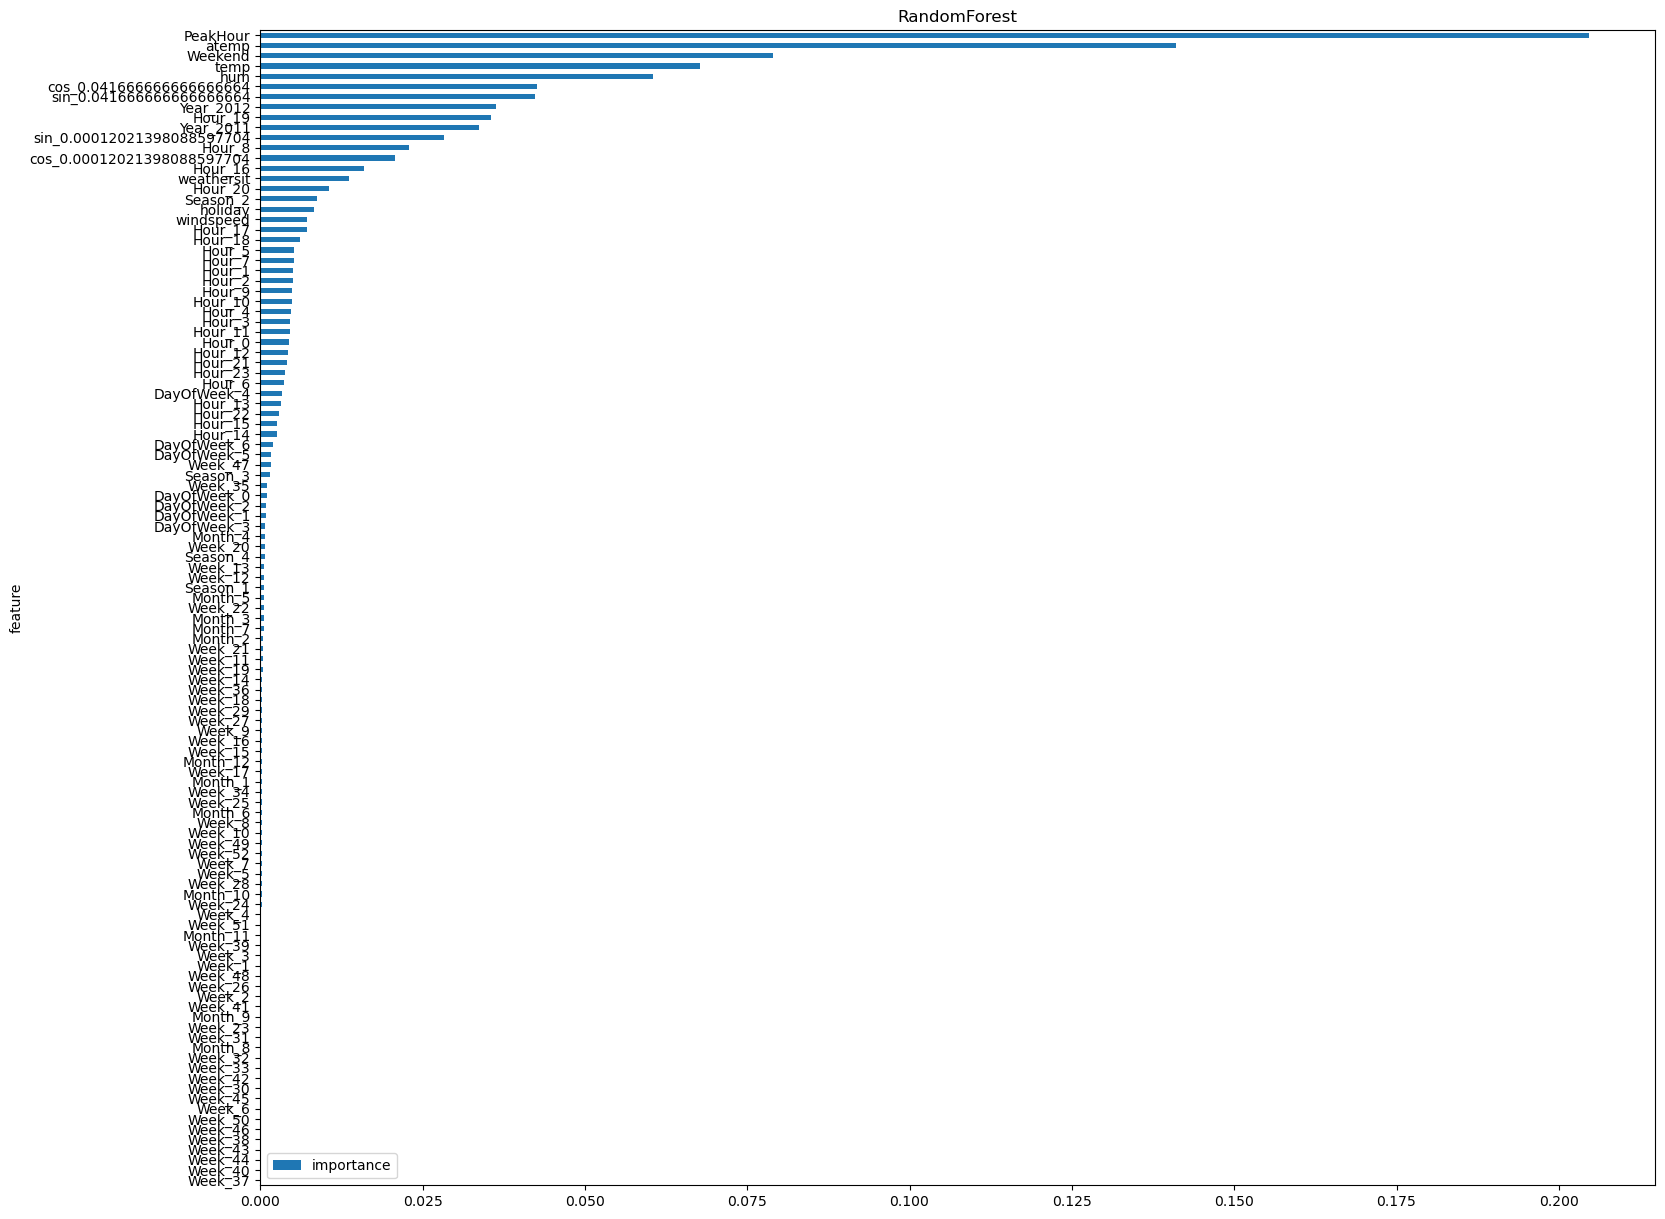

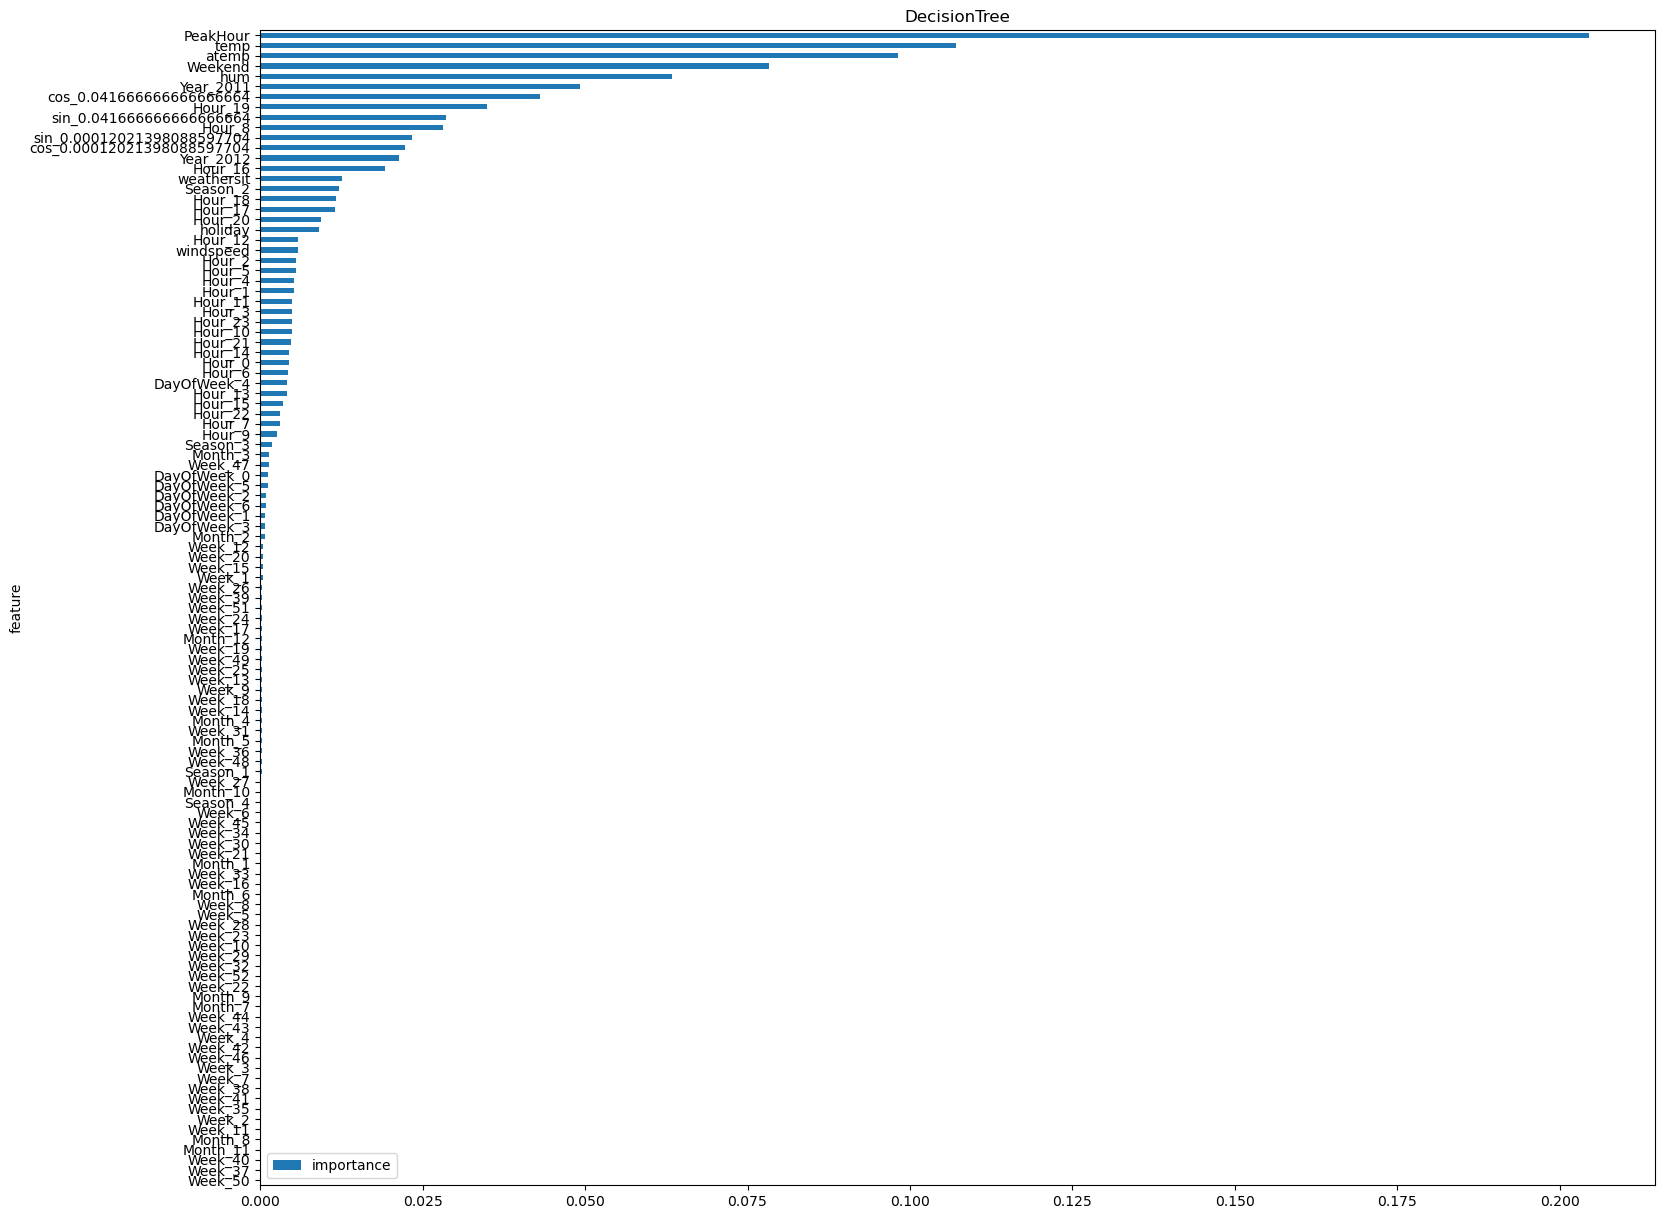

In [16]:
# aanmaken dataset met fourier features
Regressie_f = RegressionModels(data_fourier, 'cnt', dummie_cols=['Season','Hour', 'Month', 'DayOfWeek', 'Week', 'Year'], shuffle=False, test_size=0.2, random_state=42)
Regressie_f.predict(models)
Regressie_f.show_feature_importances()

train r2 ('LinearRegression', LinearRegression()) 0.7085724508397419
test r2 ('LinearRegression', LinearRegression()) 0.6343884941793518


c:\Users\Miche\mapvoornotebook\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


train r2 ('RandomForest', RandomForestRegressor()) 0.9924052952713985
test r2 ('RandomForest', RandomForestRegressor()) 0.9055166907203971
train r2 ('DecisionTree', DecisionTreeRegressor()) 1.0
test r2 ('DecisionTree', DecisionTreeRegressor()) 0.8172870069957794


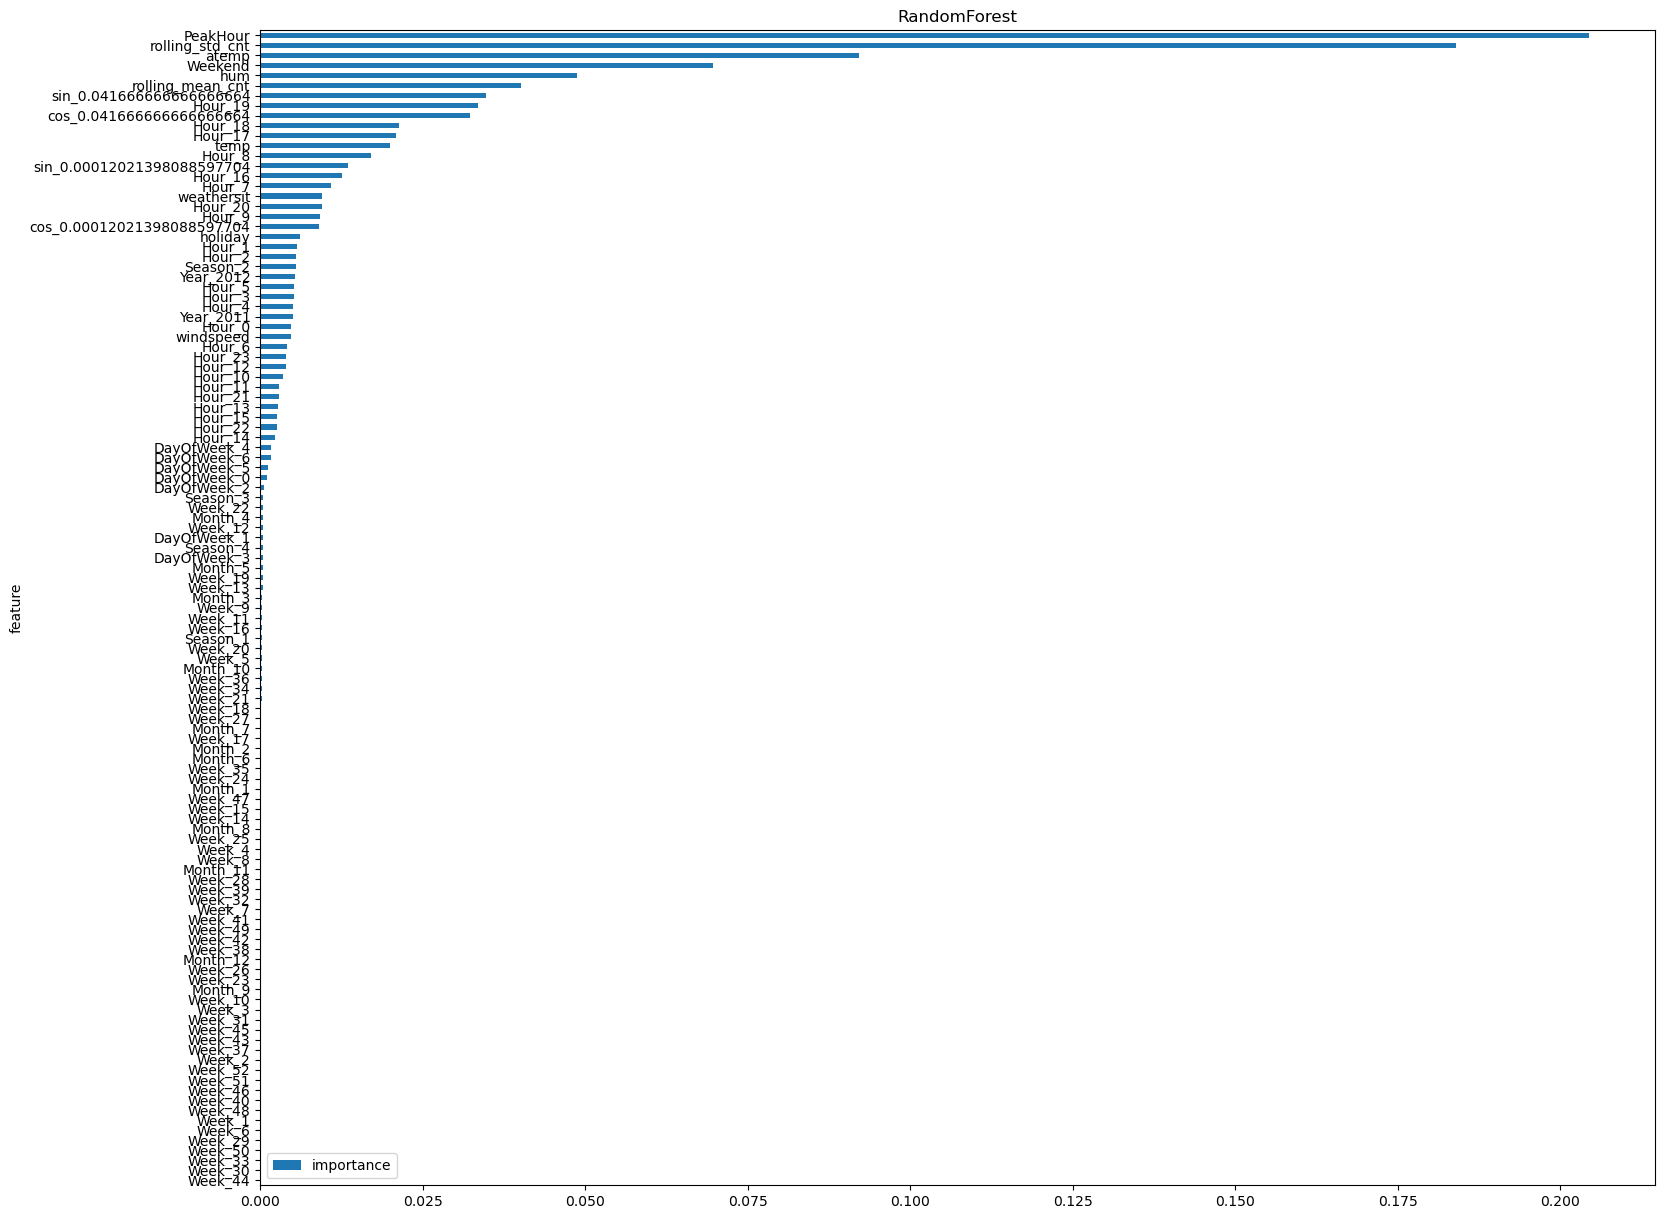

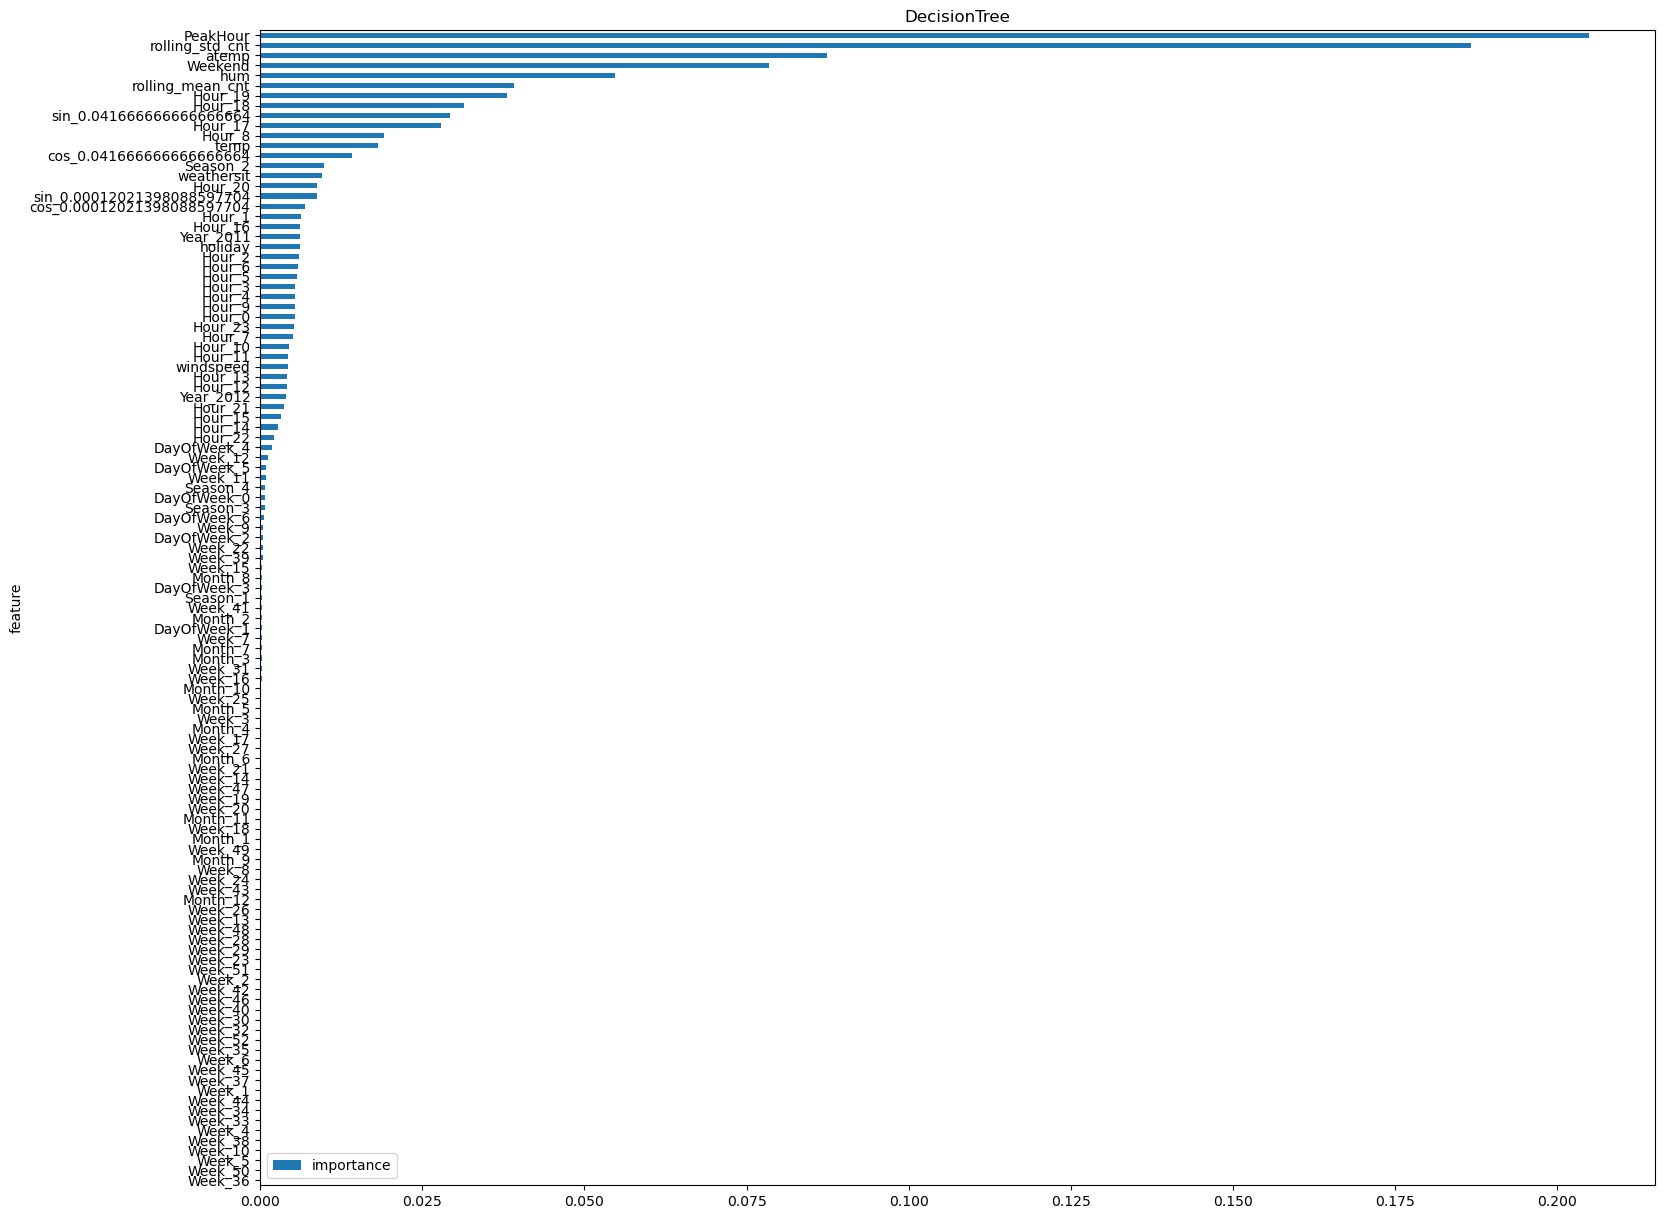

In [ ]:
# aanmaken dataset met fourier en rolling features
Regressie_f_r = RegressionModels(data_f_rolling, 'cnt', dummie_cols=['Season','Hour', 'Month', 'DayOfWeek', 'Week', 'Year'], shuffle=False, test_size=0.2, random_state=42)
Regressie_f_r.predict(models)
Regressie_f_r.show_feature_importances()

train r2 ('LinearRegression', LinearRegression()) 0.8915006588017871
test r2 ('LinearRegression', LinearRegression()) 0.8676915135120129


c:\Users\Miche\mapvoornotebook\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


train r2 ('RandomForest', RandomForestRegressor()) 0.9947801677508983
test r2 ('RandomForest', RandomForestRegressor()) 0.9522472303656145
train r2 ('DecisionTree', DecisionTreeRegressor()) 1.0
test r2 ('DecisionTree', DecisionTreeRegressor()) 0.9102385143369043


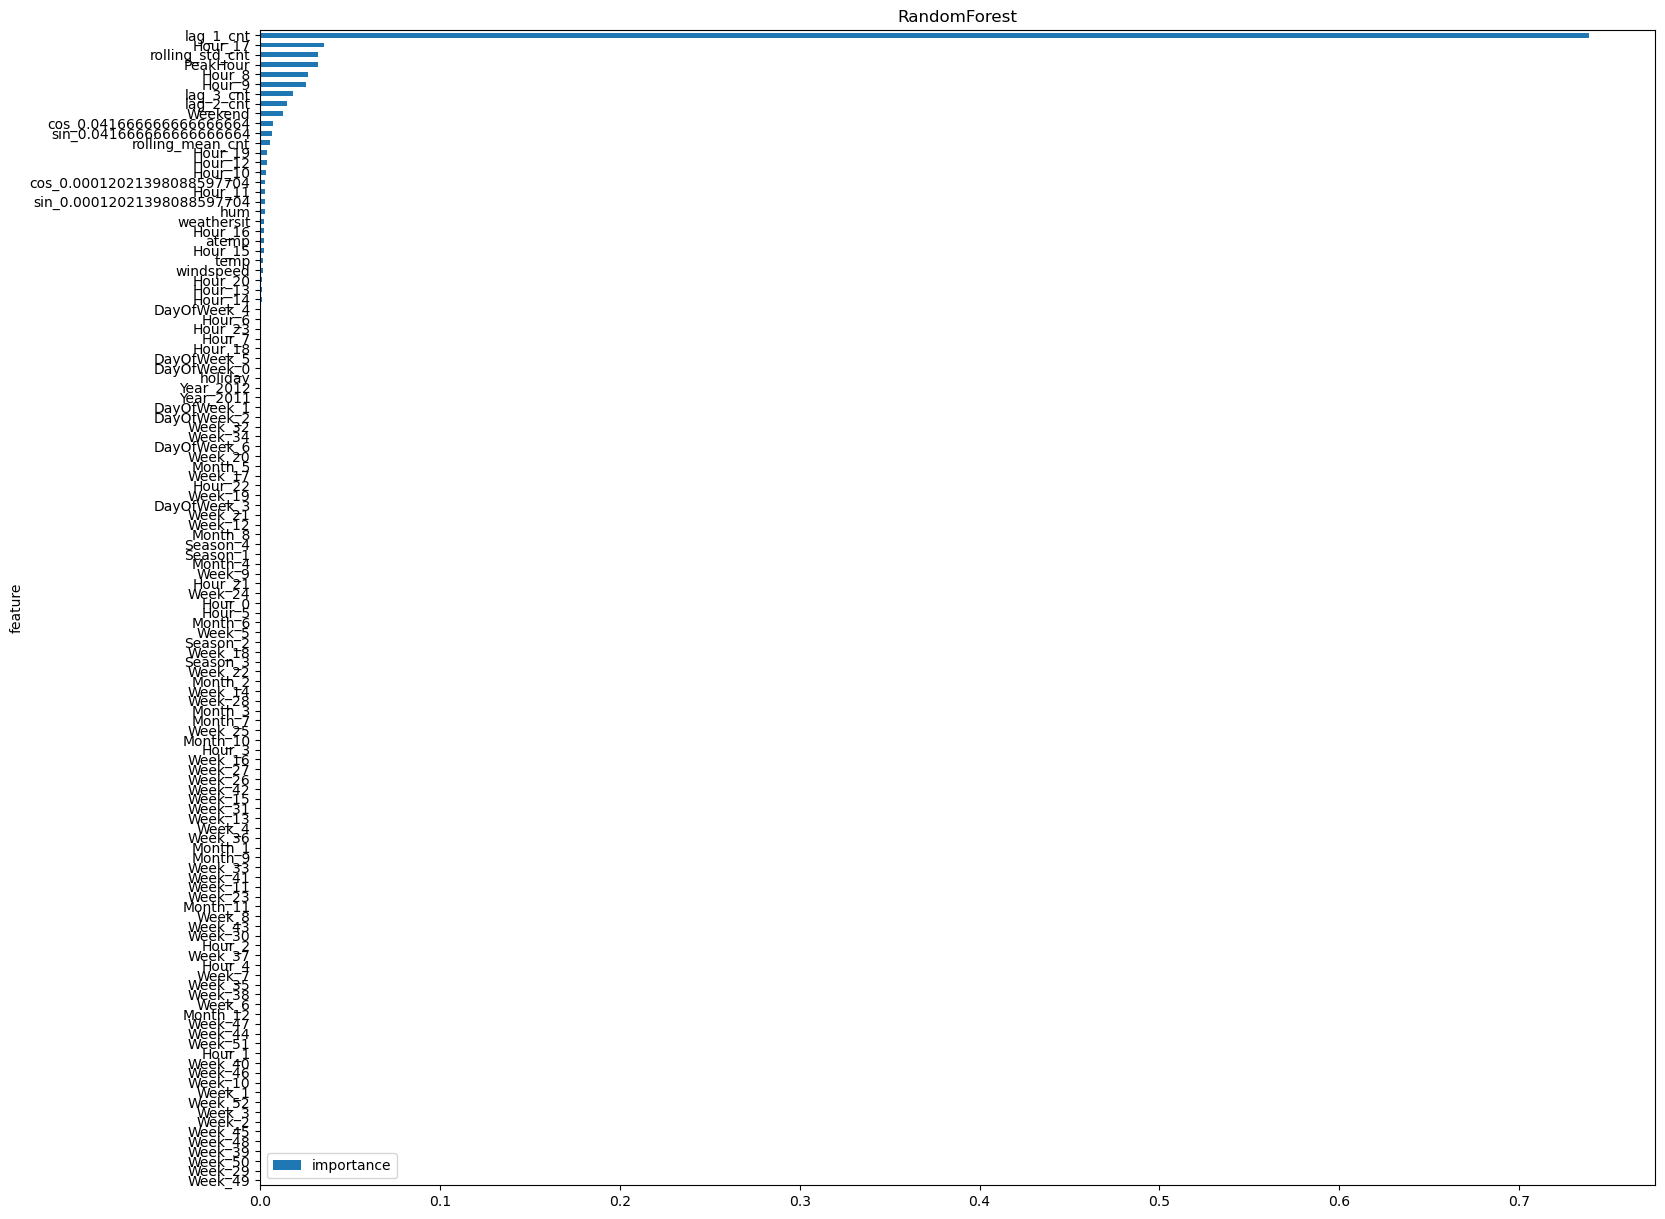

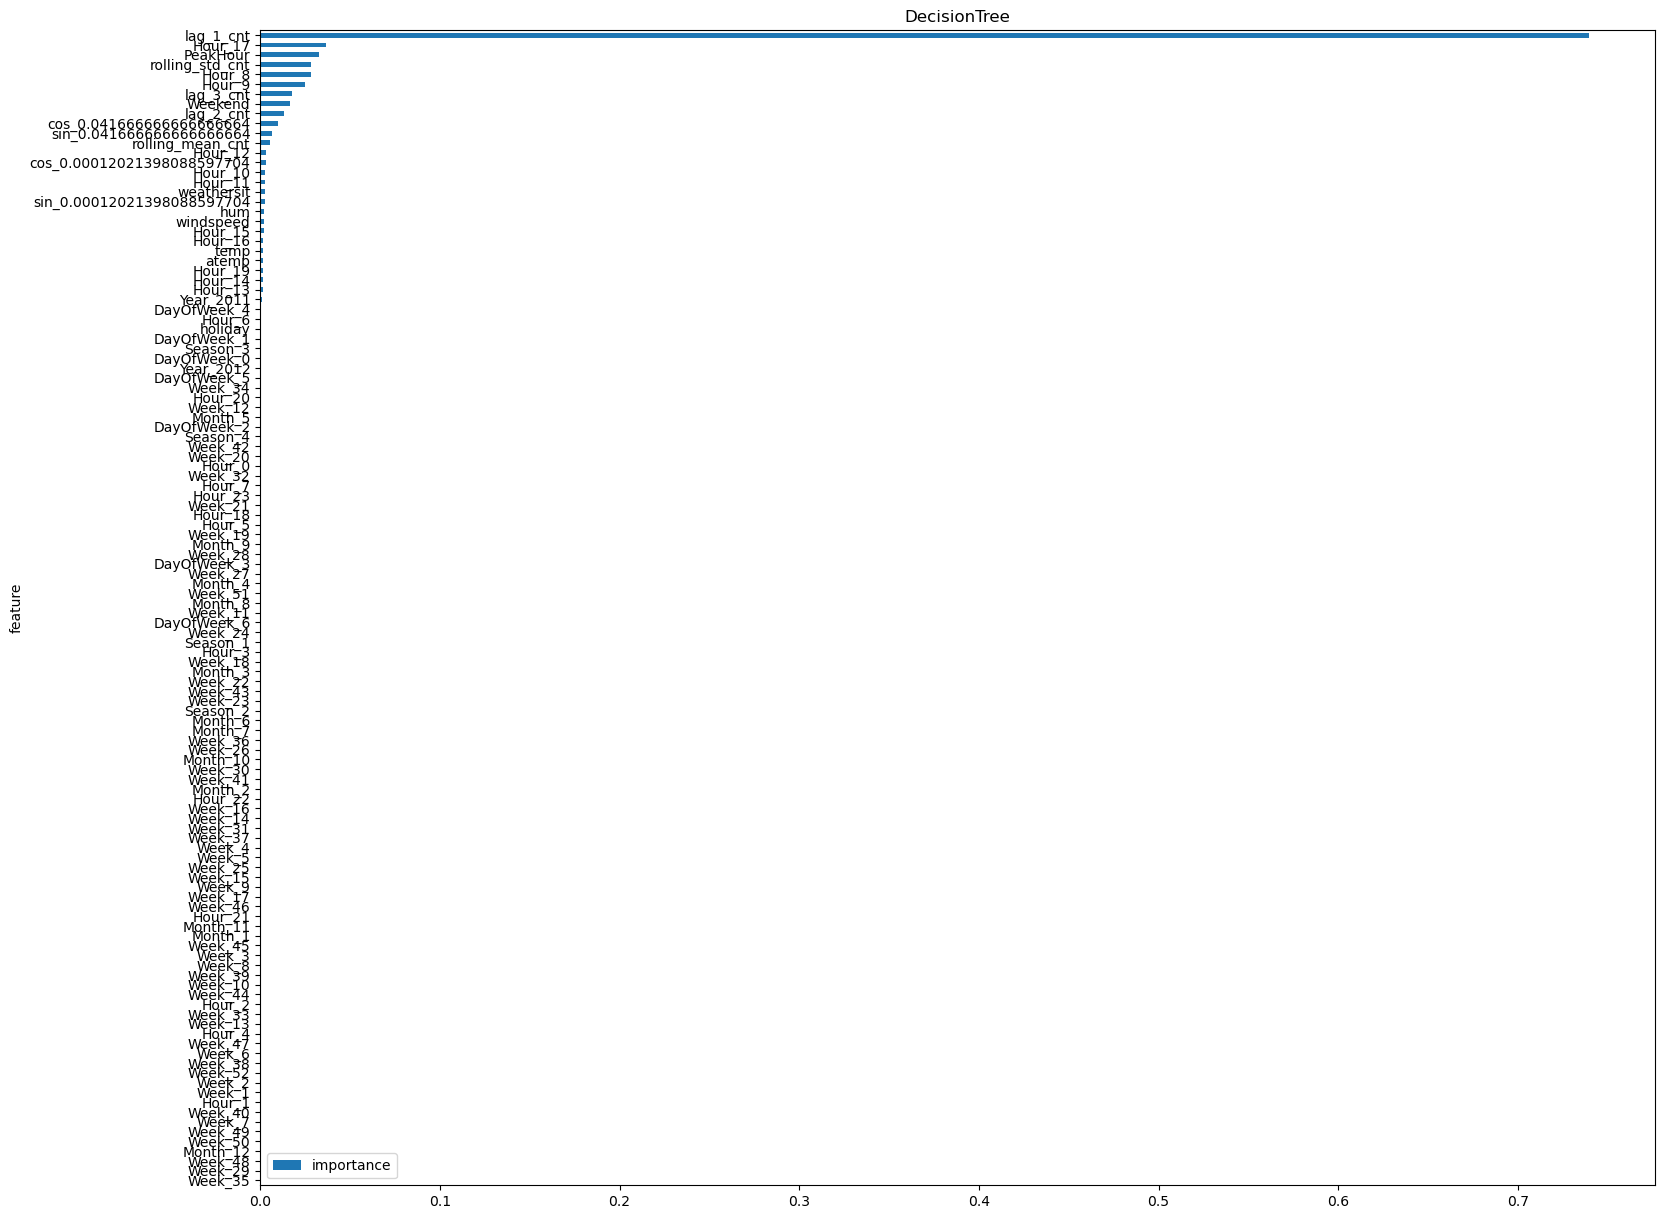

In [ ]:
# aanmaken dataset met fourier, rolling en lag features
Regressie_f_r_l = RegressionModels(data_f_r_lag, 'cnt', dummie_cols=['Season','Hour', 'Month', 'DayOfWeek', 'Week', 'Year'], shuffle=False, test_size=0.2, random_state=42)
Regressie_f_r_l.predict(models)
Regressie_f_r_l.show_feature_importances()

train r2 ('LinearRegression', LinearRegression()) 0.8915020725973699
test r2 ('LinearRegression', LinearRegression()) 0.8477178732334522


c:\Users\Miche\mapvoornotebook\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


train r2 ('RandomForest', RandomForestRegressor()) 0.9948511872738409
test r2 ('RandomForest', RandomForestRegressor()) 0.9537206110410286
train r2 ('DecisionTree', DecisionTreeRegressor()) 1.0
test r2 ('DecisionTree', DecisionTreeRegressor()) 0.9097293702713016


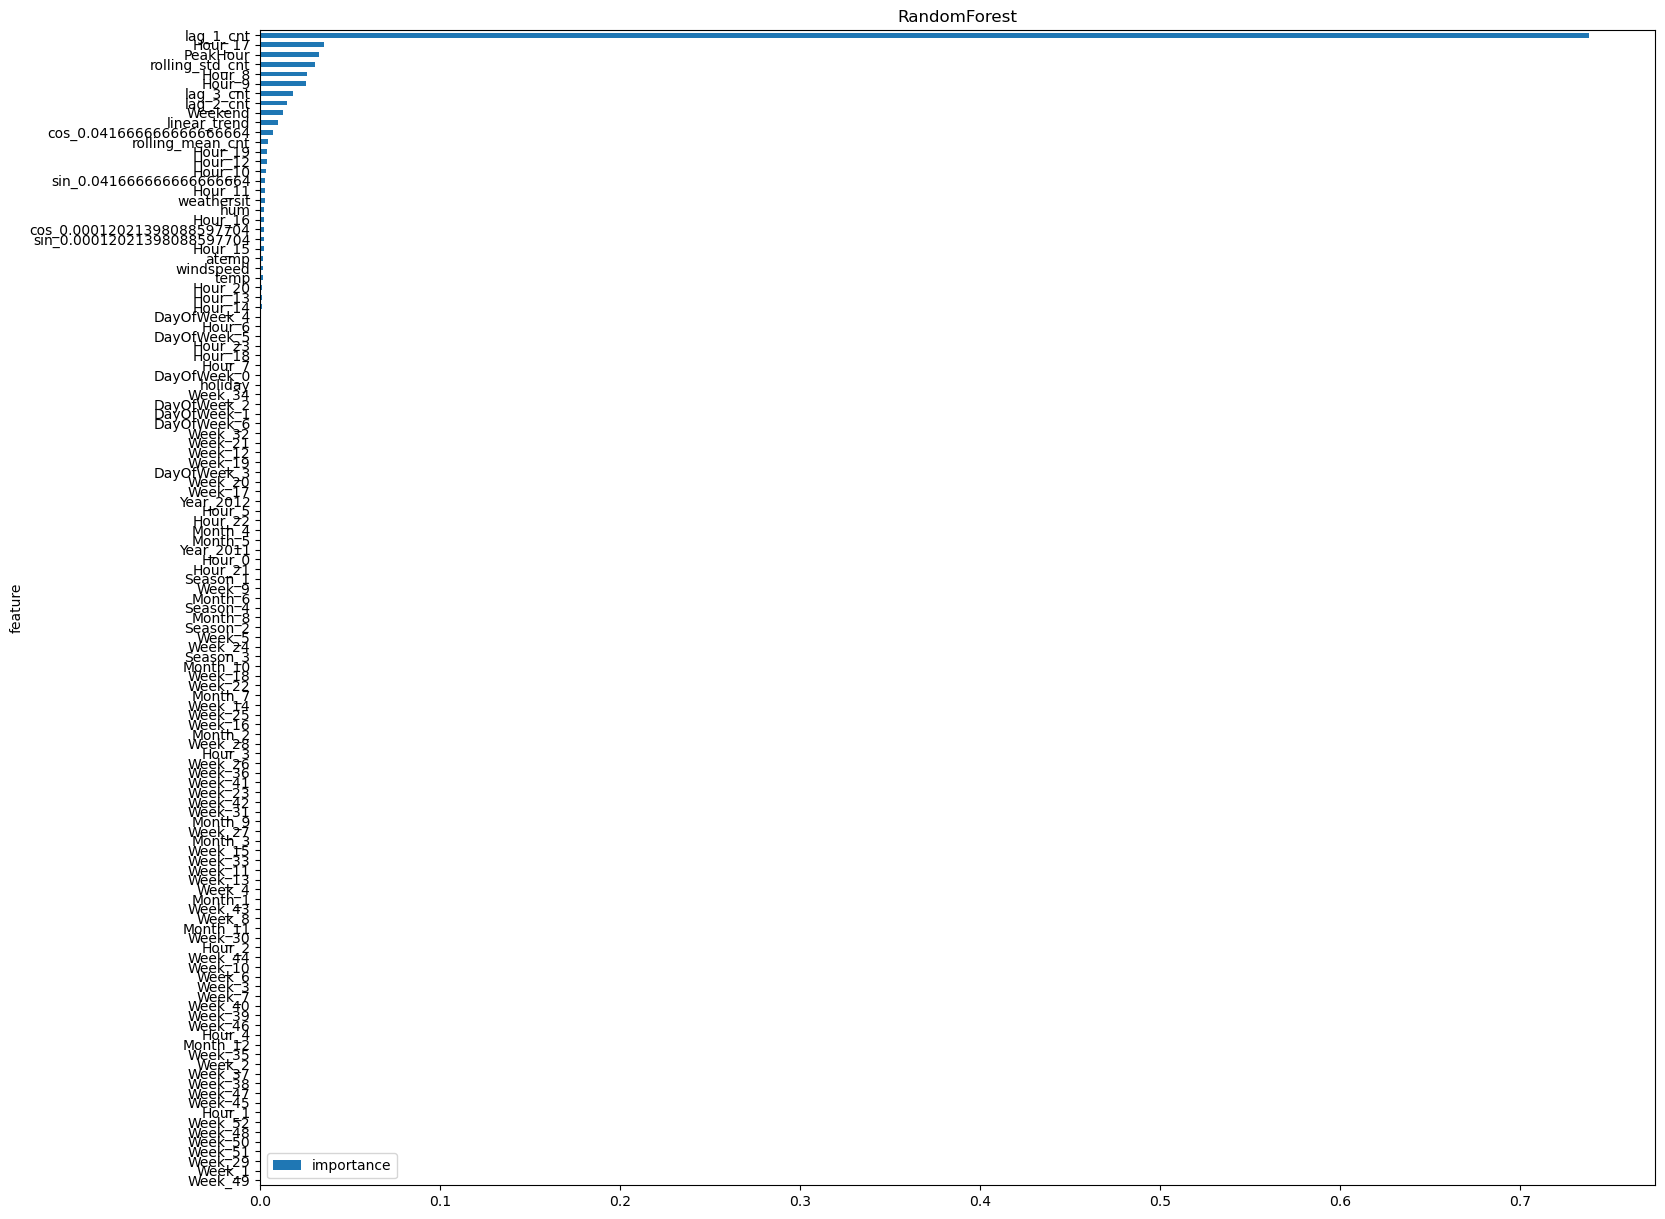

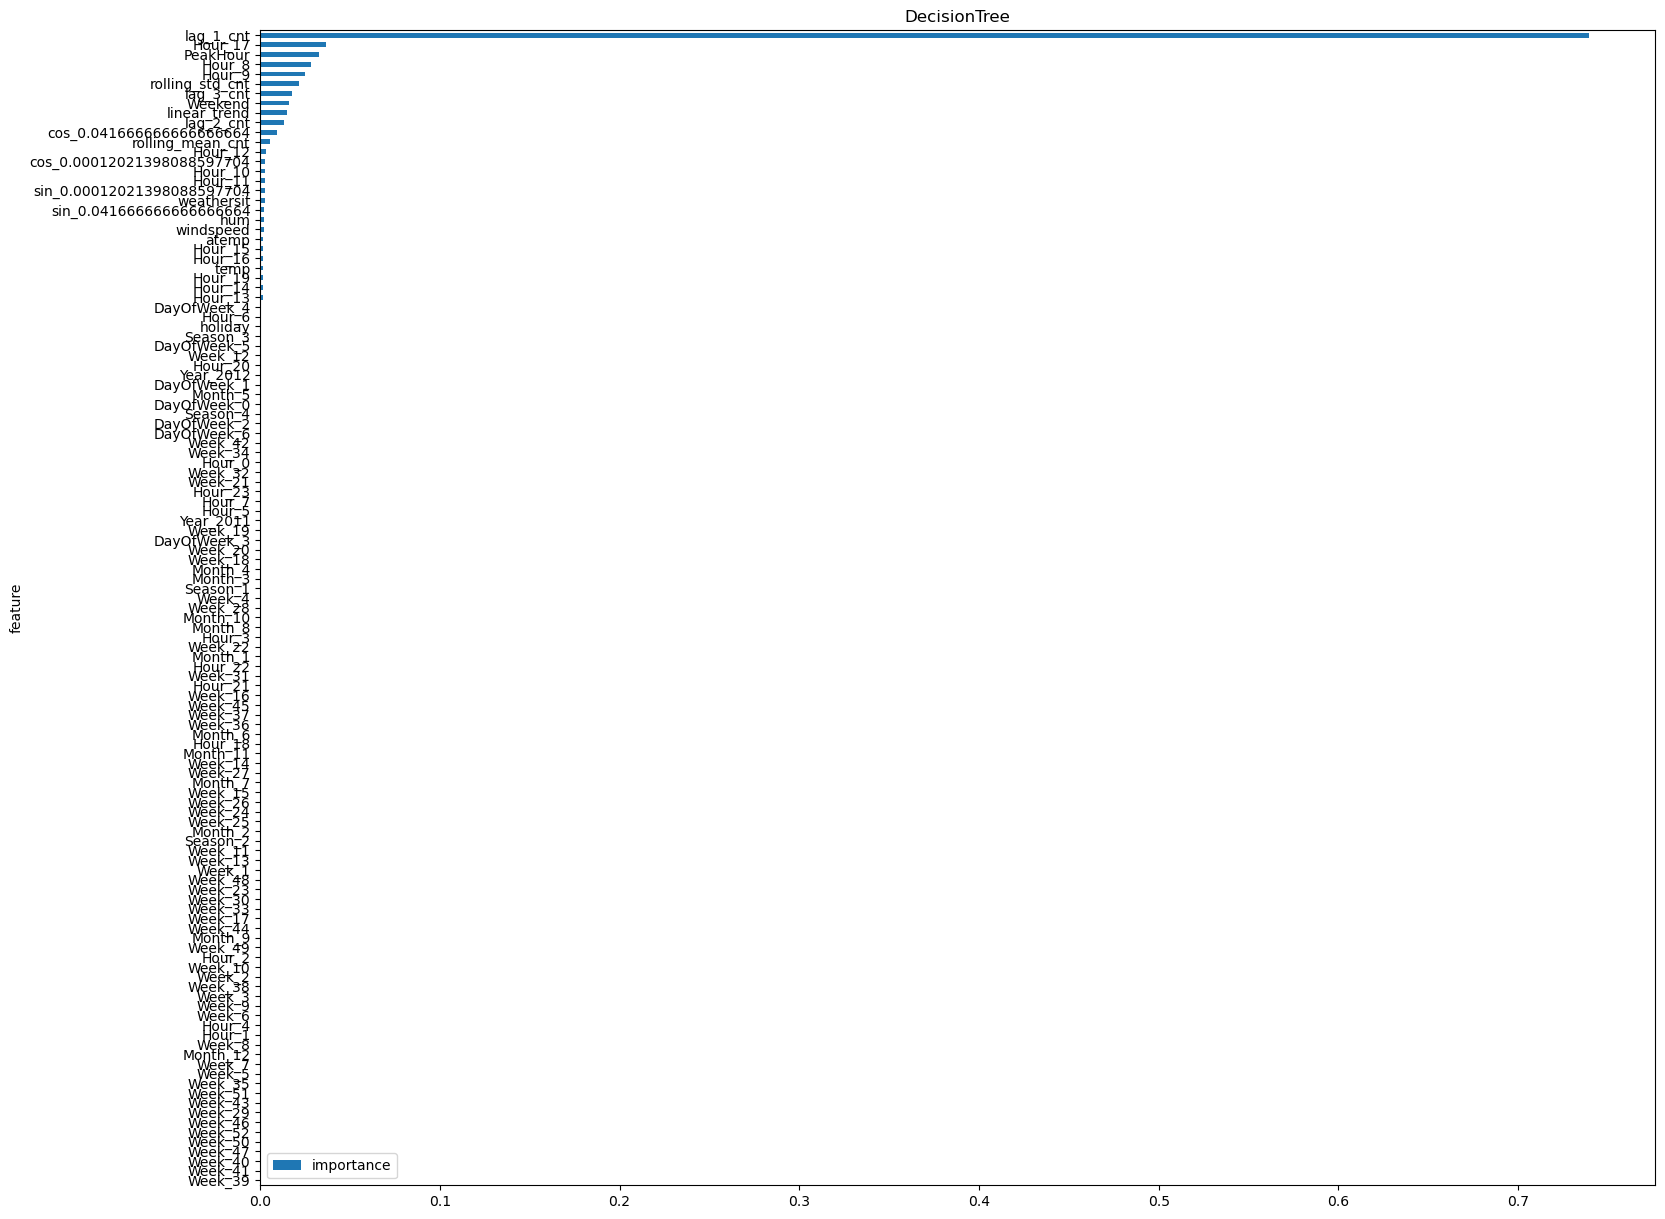

In [ ]:
# Maken van regressie dataset met fourier, rolling, lag en trend features
Regressie_f_r_l_t = RegressionModels(data_f_r_lag_trend, 'cnt', dummie_cols=['Season','Hour', 'Month', 'DayOfWeek', 'Week', 'Year'], shuffle=False, test_size=0.2, random_state=42)
Regressie_f_r_l_t.predict(models)
Regressie_f_r_l_t.show_feature_importances()

In [17]:
train_new = TimeSeriesFeatures(train)

# aanmaken dataset met rolling features
data_rolling = train_features.add_rolling(24, 'cnt')
data_rolling = data_rolling.fillna(method='bfill')

# aanmaken dataset met rolling en lag features
data_r_lag = train_features.add_lag([1,2,3], 'cnt')
data_r_lag = data_r_lag.fillna(method='bfill')

# aanmaken dataset met rolling, lag en trend features
data_r_lag_trend = train_features.add_trend()
data_r_lag_trend = data_r_lag_trend.fillna(method='bfill')

train r2 ('LinearRegression', LinearRegression()) 0.8915020725973699
test r2 ('LinearRegression', LinearRegression()) 0.8477178732334522


c:\Users\Miche\mapvoornotebook\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


train r2 ('RandomForest', RandomForestRegressor()) 0.994856166920096
test r2 ('RandomForest', RandomForestRegressor()) 0.9545908823405437
train r2 ('DecisionTree', DecisionTreeRegressor()) 1.0
test r2 ('DecisionTree', DecisionTreeRegressor()) 0.9064406034118602


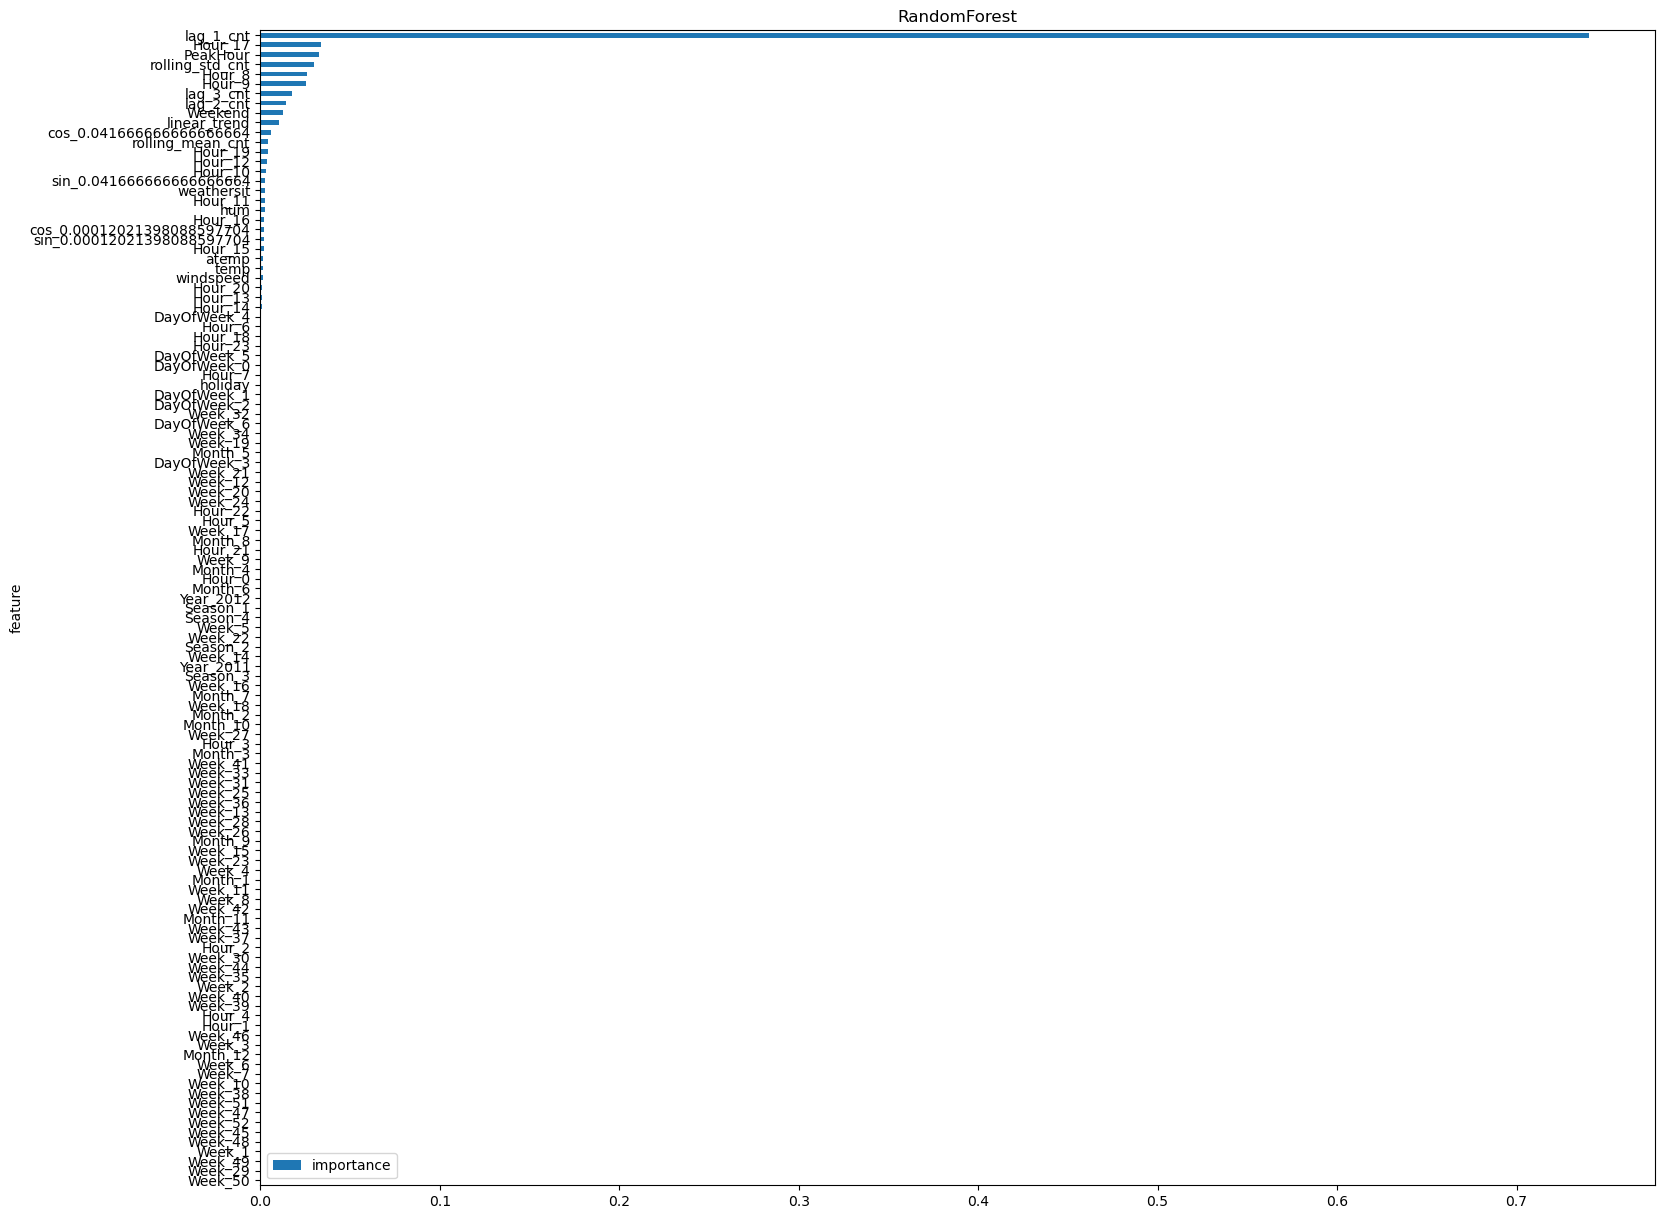

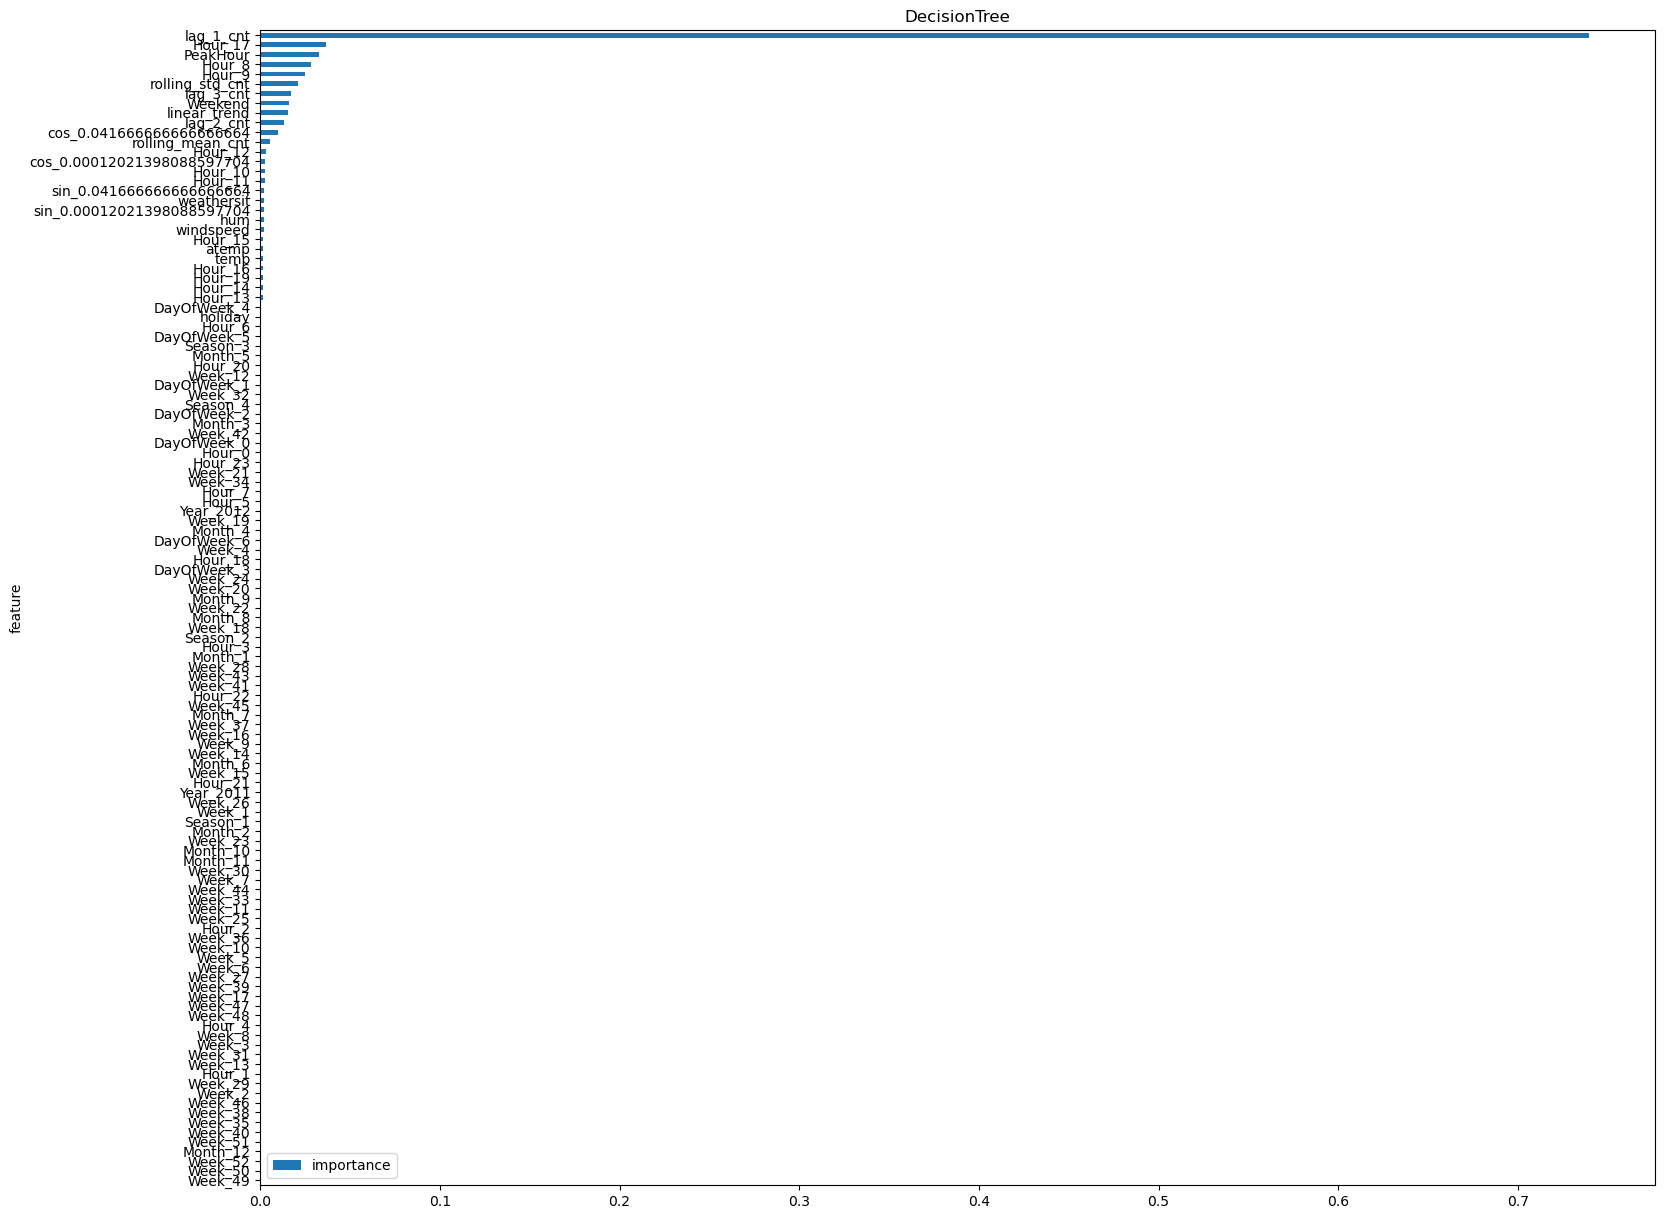

In [ ]:
# aanmaken van de dictionary met modellen
models_dict = {'LinearRegression': LinearRegression(),
			   'RandomForest': RandomForestRegressor(),
			   'DecisionTree': DecisionTreeRegressor()}

# Maken van de Regressie dataset zonder fourier
Regressie_r_l_t = RegressionModels(data_r_lag_trend, 'cnt', dummie_cols=['Season','Hour', 'Month', 'DayOfWeek', 'Week', 'Year'], shuffle=False, test_size=0.2, random_state=42)
Regressie_r_l_t.predict(models_dict)
Regressie_r_l_t.show_feature_importances()

In [62]:
# De scores van de verschillende modellen en features
features = ['Basis','Basis + Fourier', 'Basis + Fourier + Rolling window', 'Basis + Fourier + Rolling window + Lag', 'Basis + Fourier + Rolling window + Lag + Trend', 'Basis + Rolling window + Lag + Trend']
models = ['LinearRegression', 'RandomForestRegressor', 'DecisionTreeRegressor']

# De r2 scores van de verschillende modellen en features
scores = {'LinearRegression': [0.6086, 0.5344, 0.6343, 0.8676, 0.8477, 0.8477],
          'RandomForestRegressor': [0.8561, 0.8066, 0.9055, 0.9522, 0.9537, 0.9545],
          'DecisionTreeRegressor': [0.7939, 0.7037, 0.8172, 0.9102, 0.9097, 0.9064]}

# De scores in een dataframe zetten
df_scores = pd.DataFrame(scores, index=features)
df_scores


LinearRegression  \
Basis                                                     0.6086   
Basis + Fourier                                           0.5344   
Basis + Fourier + Rolling window                          0.6343   
Basis + Fourier + Rolling window + Lag                    0.8676   
Basis + Fourier + Rolling window + Lag + Trend            0.8477   
Basis + Rolling window + Lag + Trend                      0.8477   

                                                RandomForestRegressor  \
Basis                                                          0.8561   
Basis + Fourier                                                0.8066   
Basis + Fourier + Rolling window                               0.9055   
Basis + Fourier + Rolling window + Lag                         0.9522   
Basis + Fourier + Rolling window + Lag + Trend                 0.9537   
Basis + Rolling window + Lag + Trend                           0.9545   

                                                DecisionTreeRegressor  
Basis                                                          0.7939  
Basis + Fourier                                                0.7037  
Basis + Fourier + Rolling window                               0.8172  
Basis + Fourier + Rolling window + Lag                         0.9102  
Basis + Fourier + Rolling window + Lag + Trend                 0.9097  
Basis + Rolling window + Lag + Trend                           0.9064

### Bevindingen iteratief proces

We hebben er voor gekozen om drie eenvoudige modellen te gebruiken voor dit proces, namelijk:
- LinearRegression
- DecisionTreeRegressor
- RandomForestRegressor

Deze modellen zijn gekozen, omdat elk model verschillende eigenschappen heeft. Dit stelt ons in staat om goed te zien welke invloed de features op de verschillende modellen hebben, wat ons helpt bij het maken van een weloverwogen beslissing over de uiteindelijke features.  

#### proces
In onze Exploratory Data Analysis hebben we onderzoek gedaan naar verschillende patronen in de data, waaronder de Fourier-analyse en de trend van de data.
Uit dit onderzoek bleek dat er patronen aanwezig zijn in de data op basis van tijdsintervallen van een halve dag, een dag, een half jaar en een jaar. Voor onze Fourier-feature hebben we ervoor gekozen om alleen gebruik te maken van het dag- en jaarpatroon, omdat de andere twee patronen (halve dag en half jaar) al terug te vinden zijn in de dag- en jaarpatronen.

Daarnaast hebben we de trend onderzocht in tijdsintervallen van een halve dag, een dag, een half jaar en een jaar. Deze intervallen zijn gekozen op basis van de patronen uit de Fourier-analyse. Hieruit bleek dat we een lineaire trend in de data hadden.
We hebben daarom besloten om een lineaire trendkolom toe te voegen voor de feature engineering.

Verder hebben we de lag- en rolling window-statistieken toegevoegd. De lag is toegevoegd om te onderzoeken of er een hoge correlatie zou zijn tussen de datapunten zelf.
Voor de rolling window hebben we de standaarddeviatie en het gemiddelde toegevoegd. Met de standaarddeviatie krijgen we een beter beeld van de variatie in de data, en door de modellen hiermee te trainen, kunnen ze beter omgaan met outliers. Daarnaast hebben we het gemiddelde (ook wel de moving average genoemd) berekend om een beeld te krijgen met minder ruis. Hierdoor kunnen de modellen beter fitten op de algemene data.

#### Onderzoek van features
We hebben voor dit onderzoek twee klassen aangemaakt: 1 voor het aanmaken van de features om het iteratieve proces eenvoudiger te maken en 1 voor het splitsen en voorspellen van de data.       
Na het aanmaken van deze klassen hebben we zes dataframes aangemaakt, waarbij telkens een nieuwe feature werd toegevoegd om te kijken naar de invloed van de features op de modellen.    
In onze tabel is te zien in welke volgorde we de features hebben toegevoegd. Wat ons op viel in de scores van de modellen, is dat de "Basis + Fourier" een lagere score gaf dan alleen de "Basis".   
We hebben daarom op het einde nog een keer alle modellen gedraaid met alle features behalve de fourier.     
Hieruit bleek dat er een kleine verbetering was in de score van de RandomForestRegressor, maar de scores van de LinearRegression en de DecisionTreeRegressor bleven gelijk of werden lager.        

#### Conclusie
Omdat de test dataset de kolom 'cnt' niet bevat, is het helaas niet mogelijk om de lag en rolling window features mee te nemen. We zagen in de twee overgebleven features niet een daling van scores, dus is besloten om de Fourier- en trend features in zowel de train- als de testset mee te nemen.

## 3 Modelleren

In [18]:
train_features = TimeSeriesFeatures(train)

# aanmaken dataset met fourier features
data_fourier = train_features.add_fourier([1/24,1/8318.5])
data_fourier = data_fourier.fillna(method='bfill')

# aanmaken dataset met trend features
data_all = train_features.add_trend()
data_all = data_all.fillna(method='bfill')\

data_all.head(5)

# float maken van seizoens kolom
data_all['Season'] = data_all['Season'].astype(int)

# aanmaken van de x_train en y_train split
data = RegressionModels(data_all, 'cnt', dummie_cols=['Hour', 'DayOfWeek'], shuffle=False, test_size=0.2, random_state=42)
data.data

holiday  weathersit  temp   atemp   hum  windspeed  cnt  \
date_hour                                                                      
2011-01-01 00:00:00        0           1  0.24  0.2879  0.81     0.0000   16   
2011-01-01 01:00:00        0           1  0.22  0.2727  0.80     0.0000   40   
2011-01-01 02:00:00        0           1  0.22  0.2727  0.80     0.0000   32   
2011-01-01 03:00:00        0           1  0.24  0.2879  0.75     0.0000   13   
2011-01-01 04:00:00        0           1  0.24  0.2879  0.75     0.0000    1   
...                      ...         ...   ...     ...   ...        ...  ...   
2012-11-30 19:00:00        0           1  0.32  0.3485  0.66     0.0000  377   
2012-11-30 20:00:00        0           1  0.32  0.3485  0.66     0.0000  245   
2012-11-30 21:00:00        0           1  0.30  0.3182  0.75     0.0896  183   
2012-11-30 22:00:00        0           1  0.30  0.3333  0.75     0.0000  163   
2012-11-30 23:00:00        0           2  0.30  0.3182  0.75     0.0896  110   

                     Season  Month  Week  ...  Hour_21  Hour_22  Hour_23  \
date_hour                                 ...                              
2011-01-01 00:00:00       4      1    52  ...        0        0        0   
2011-01-01 01:00:00       4      1    52  ...        0        0        0   
2011-01-01 02:00:00       4      1    52  ...        0        0        0   
2011-01-01 03:00:00       4      1    52  ...        0        0        0   
2011-01-01 04:00:00       4      1    52  ...        0        0        0   
...                     ...    ...   ...  ...      ...      ...      ...   
2012-11-30 19:00:00       3     11    48  ...        0        0        0   
2012-11-30 20:00:00       3     11    48  ...        0        0        0   
2012-11-30 21:00:00       3     11    48  ...        1        0        0   
2012-11-30 22:00:00       3     11    48  ...        0        1        0   
2012-11-30 23:00:00       3     11    48  ...        0        0        1   

                     DayOfWeek_0  DayOfWeek_1  DayOfWeek_2  DayOfWeek_3  \
date_hour                                                                 
2011-01-01 00:00:00            0            0            0            0   
2011-01-01 01:00:00            0            0            0            0   
2011-01-01 02:00:00            0            0            0            0   
2011-01-01 03:00:00            0            0            0            0   
2011-01-01 04:00:00            0            0            0            0   
...                          ...          ...          ...          ...   
2012-11-30 19:00:00            0            0            0            0   
2012-11-30 20:00:00            0            0            0            0   
2012-11-30 21:00:00            0            0            0            0   
2012-11-30 22:00:00            0            0            0            0   
2012-11-30 23:00:00            0            0            0            0   

                     DayOfWeek_4  DayOfWeek_5  DayOfWeek_6  
date_hour                                                   
2011-01-01 00:00:00            0            1            0  
2011-01-01 01:00:00            0            1            0  
2011-01-01 02:00:00            0            1            0  
2011-01-01 03:00:00            0            1            0  
2011-01-01 04:00:00            0            1            0  
...                          ...          ...          ...  
2012-11-30 19:00:00            1            0            0  
2012-11-30 20:00:00            1            0            0  
2012-11-30 21:00:00            1            0            0  
2012-11-30 22:00:00            1            0            0  
2012-11-30 23:00:00            1            0            0  

[16637 rows x 49 columns]

### 3.1 Tijdspecifieke modellen


In [29]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


### 3.1.1. Facebook Prophet

In [ ]:
# prophet; piece-wise linear

# GeeksforGeeks (2024)
# Prompt .. Prophet Grid Search Optimization
# (“Diagnostics”, 2024)
# (Fbprophet, 2020)

# Maken van een dataframe voor prophet
df = pd.DataFrame()
df['ds'] = train.index
df['y'] = train['cnt'].values
df.head()

# Maken van de parameter grid
params = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range': [0.8, 0.9, 0.95]
}

all_params = [dict(zip(params.keys(), values)) for values in itertools.product(*params.values())]
results = []

for p in all_params:
    model = Prophet(**p).fit(df)
    prophet_cv = cross_validation(model, initial='365 days', period='180 days', horizon='14 days', parallel='processes')
    prophet_pm = performance_metrics(prophet_cv)
    results.append({'params':p,
                    'rmse':prophet_pm['rmse'].mean()})

# zoeken naar de beste parameters en model
best_result = min(results, key=lambda x: x['rmse'])
best_model = Prophet(**best_result['params'])
best_model.fit(df)

# voorspellen van de verhuur aantallen
forecast = best_model.predict(df)

# berekenen van de r2 score en rsme
r2 = r2_score(df['y'], forecast['yhat'])
rsme = root_mean_squared_error(df['y'], forecast['yhat'])
print(f"R2: {r2}")
print(f"RSME: {rsme}")

20:02:34 - cmdstanpy - INFO - Chain [1] start processing
20:02:36 - cmdstanpy - INFO - Chain [1] done processing
20:02:44 - cmdstanpy - INFO - Chain [1] start processing
20:02:46 - cmdstanpy - INFO - Chain [1] done processing
20:02:55 - cmdstanpy - INFO - Chain [1] start processing
20:02:57 - cmdstanpy - INFO - Chain [1] done processing
20:03:07 - cmdstanpy - INFO - Chain [1] start processing
20:03:11 - cmdstanpy - INFO - Chain [1] done processing
20:03:22 - cmdstanpy - INFO - Chain [1] start processing
20:03:24 - cmdstanpy - INFO - Chain [1] done processing
20:03:35 - cmdstanpy - INFO - Chain [1] start processing
20:03:37 - cmdstanpy - INFO - Chain [1] done processing
20:03:48 - cmdstanpy - INFO - Chain [1] start processing
20:03:49 - cmdstanpy - INFO - Chain [1] done processing
20:04:00 - cmdstanpy - INFO - Chain [1] start processing
20:04:02 - cmdstanpy - INFO - Chain [1] done processing
20:04:12 - cmdstanpy - INFO - Chain [1] start processing
20:04:14 - cmdstanpy - INFO - Chain [1]

R2: 0.6801052907601082
RSME: 102.96241719296039


### 3.1.1 Facebook Prophet
Facebook Prophet is een tijdreeksmode model die de waarden van de toekomst probeert te voorspellen. In ons onderzoek betreft dit de verhuuraantallen (Taylor & Letham, 2017, p.5). Deze waarden worden berekend door een decomponerend tijdreeksmodel, met de functie (Taylor & Letham, 2017, p.7):
$$
y(t) = g(t) + s(t) + h(t) + e_t
$$

Hierbij zijn:
- g(t), de trend functie van de data
- s(t), de periodische veranderingen in de data
- h(t), het effect van feestdagen en evenementen
- e_t, alle afwijkende veranderingen die niet verklaard worden door het model zelf      
(Taylor & Letham, 2017, p. 7)

<hr style="height: 2px; border: none; background-color: black;" />

#### Trend:
Facebook prophet heeft twee verschillende trend modellen in gebruik (Taylor & Letham, 2017, p. 8).

1. Nonlinear Saturating Growth  (Taylor & Letham, 2017, p. 8)

Groei modelleren wordt vaak gedaan met een logistic growth model, met de functie (Taylor & Letham, 2017, p. 8):
$$
g(t) = \frac{C}{1 + \exp(-k(t - m))}
$$

Hier staat:
- C, voor de draagkracht
- k, voor de groeisnelheid
- m, voor de offsetparameter    
(Taylor & Letham, 2017, p. 8)
    
Omdat C niet constant is voor Facebook, is dit aangepast naar C(t), waar C(t) voor een capaciteit die kan veranderen over de tijd heen (Taylor & Letham, 2017, p. 9). Daarnaast is de snelheid van de groei vaak niet constant, en is ook k aangepast om rekening te houden met een veranderende groeisnelheid (Taylor & Letham, 2017, p. 9). Om ervoor te zorgen dat het model op elkaar aansluit moest ook de offsetparameter m aangepast worden.

De uiteindelijke functie is  (Taylor & Letham, 2017, p. 9):
$$
g(t) = \frac{C(t)}{1 + \exp\left( -\left( k + a(t)\tau_{\delta} \right) \left( t - \left( m + a(t)\tau_{\gamma} \right) \right) \right)}
$$

2. Linear trend met changepoints  (Taylor & Letham, 2017, p. 10)

Als er voor het voorspellen geen rekening gehouden moet worden met begrensde groei, wordt er gebruik gemaakt van een eenvoudiger model met de functie (Taylor & Letham, 2017, p. 10):
$$
g(t) = \left( k + a(t)\tau_{\delta} \right)t + \left( m + a(t)\tau_{\gamma} \right)
$$

<hr style="height: 2px; border: none; background-color: black;" />

#### Seizoenspatronen

Om de effecten van seizoenspatronen te gebruiken in het model, is er gebruik gemaakt van seizoensmodellen die de herhaalde patronen vastleggen (Taylor & Letham, 2017, p. 11). Deze herhaalde patronen komen voort uit de tijd, oftewel (t) (Taylor & Letham, 2017, p. 11). De seizoenseffecten kunnen ongeveer berekend worden met de standaard fourier functie:
$$
s(t) = \sum_{n=1}^{N} \left( a_n \cos \left( \frac{2 \pi n t}{P} \right) + b_n \sin \left( \frac{2 \pi n t}{P} \right) \right)
$$
(Taylor & Letham, 2017, p. 11)
Hier zijn:
- An en Bn, de amplitudes van de sinus en cosinus
- P, de periode die in de data zit bijvoorbeeld 365 voor een jaar
- N, de frequenties waarmee het model gefit word.    
(Taylor & Letham, 2017, p. 11)

Om de seizoensgebondenheid goed te fitten op het model, moet de N parameter geschat worden. Dit kan gedaan worden door een matrix te maken van seizoensgebonden vectoren die er als volgt uit kan zien (Taylor & Letham, 2017, p. 12): 
$$
[a_1, b_1, \dots, a_N, b_N]
$$

##### Voorbeeld:

Stel dat we een periode van 7 dagen vinden in onze data, en we willen kijken naar frequenties 1 tot en met 5 dan ziet je formule er als volgt uit (Taylor & Letham, 2017, p. 12):
$$
\beta = 
[a_1, b_1, \dots, a_5, b_5]
$$
$$
X(t) =
\begin{bmatrix}
\cos\left( \frac{2 \pi \cdot 1 \cdot t}{7} \right) & \sin\left( \frac{2 \pi \cdot 1 \cdot t}{7} \right) & \dots & \cos\left( \frac{2 \pi \cdot 5 \cdot t}{7} \right) & \sin\left( \frac{2 \pi \cdot 5 \cdot t}{7} \right)
\end{bmatrix}
$$
$$
s(t) = X(t)\beta
$$
We beginnen eerst met het kijken naar de matrix van frequenties die we gebruiken. We hebben gekozen voor 5 frequenties dus maken met de variabele "Beta" aan met de sinus en cosinus erin als "a" en "b", waarbij elke sinus en cosinus een nummer van 1 tot en met 5 krijgt toegewezen.
Daarna vullen we onze waarden in, in de originele fourier functie waarbij onze P de periode van 7 dagen is en de N de frequenties zijn.
Als laatste berekenen we alles en komt daar onze periodische veranderingen uit, namelijk s(t).

<hr style="height: 2px; border: none; background-color: black;" />

#### Feestdagen en Events

Feestdagen en evenementen kunnen de voorspelling van verhuuraantallen of verkoopcijfers aanzienlijk beïnvloeden, maar omdat ze vaak geen seizoenspatroon volgen, wordt de invloed van deze dagen niet goed meegenomen door s(t) (Taylor & Letham, 2017, p. 12). Omdat deze dagen meestal dezelfde impact hebben elk jaar, is het een belangrijke factor om mee te nemen in de voorspellingen (Taylor & Letham, 2017, p. 12). Om het model niet te ingewikkeld te maken, gaat Prophet ervan uit dat de effecten van feestdagen of evenementen onafhankelijk zijn van andere features in de dataset (Taylor & Letham, 2017, p. 12). De functie die gebruikt wordt om de invloed hiervan mee te nemen is (Taylor & Letham, 2017, p. 13):

$$
Z(t) = [1(t \in D_1), \dots, 1(t \in D_L)]
$$

$$
h(t) = Z(t)\kappa
$$

Hier zijn:
- i, de feestdag of event
- D_i, een paar data in het verleden en in de toekomst van i
- t, geeft aan of de datum tijdens een feestdag of event is
- k_i, is een parameter die de verandering van de voorspelling aangeeft      
(Taylor & Letham, 2017, p. 12)

Omdat feestdagen vaak al dagen voor de feestdag zelf invloed hebben op de voorspellingen, is het ook mogelijk om dagen rondom de feestdag zelf toe te wijzen als een feestdag (Taylor & Letham, 2017, p. 13). Hierdoor wordt er meer rekening gehouden met de impact van de dagen rondom een feestdag (Taylor & Letham, 2017, p. 13).

### 3.1.2. SARIMA

In [ ]:
# sarima model


# ik heb hier even de datasets opnieuw ingeladen, want hij werkte even niet meer heel goed. maar je kan dit wel eruit laten.
train = pd.read_csv('train (2).csv', parse_dates=['date_hour'])
test = pd.read_csv('test (2).csv', parse_dates=['date_hour'])

# deze stap ook even opnieuw gedaan
train.set_index('date_hour', inplace=True)
test.set_index('date_hour', inplace=True)

train.index = pd.to_datetime(train.index)
train = train.asfreq('H') 
test.index = pd.to_datetime(test.index)
test = test.asfreq('H') 

# Cross-validation
initial_train_size = int(len(train) * 0.8)  # Begin met 80% van de data
validation_size = len(train) - initial_train_size  # Het resterende deel voor validatie

# Functie om de SARIMA cross-validation uit te voeren
def sarima_cross_validation(train, order, seasonal_order, validation_size):
    rmse_scores = []
    
    for i in range(validation_size):
        train_set = train[:initial_train_size + i]
        
        model = sm.tsa.statespace.SARIMAX(train_set['cnt'],
                                          order=order,
                                          seasonal_order=seasonal_order,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
        result = model.fit(disp=False)
        forecast = result.get_forecast(steps=1)
        forecast_mean = forecast.predicted_mean
        true_value = train.iloc[initial_train_size + i]['cnt']
        rmse = np.sqrt(mean_squared_error([true_value], forecast_mean))
        rmse_scores.append(rmse)
    
    return np.mean(rmse_scores)

# SARIMA hyperparameters
order = (1, 1, 1)  # AR, I, MA parameters
seasonal_order = (1, 1, 1, 24)  # Seizoensgebonden AR, I, MA en seizoensperiode

# Voer de cross-validation uit
mean_rmse = sarima_cross_validation(train, order, seasonal_order, validation_size)
print(f"Gemiddelde RMSE uit cross-validation: {mean_rmse}")

final_model = sm.tsa.statespace.SARIMAX(train['cnt'],
                                        order=order,
                                        seasonal_order=seasonal_order,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
final_result = final_model.fit(disp=False)

forecast_steps = len(test) 
forecast = final_result.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

# evenetueel visualisatie voor de voorspellingen van de testset
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['cnt'], label='Train Data')
plt.plot(test.index, forecast_mean, label='Voorspellingen', color='red')
plt.title('SARIMA Voorspelling')
plt.xlabel('Tijd')
plt.ylabel('Aantal')
plt.legend()
plt.show()

## Wiskundige uitleg van het SARIMA(X) model

Het SARIMA(X)-model (Seasonal Autoregressive Integrated Moving Average with eXogenous variables) is een geavanceerd tijdreeksmodel dat de reguliere ARIMA (Autoregressive Integrated Moving Average) uitbreidt, door rekening te houden met seizoensgebonden patronen en externe invloeden (exogene variabelen). Dit maakt het bijzonder geschikt voor tijdreeksen die zowel seizoensgebonden trends als externe invloeden vertonen (GeeksforGeeks, 2024a).

Laten we het SARIMA(X)-model stap voor stap uitleggen:

---

### Basis ARIMA Model

SARIMA is een uitbreiding van het ARIMA-model. Het ARIMA-model is bedoeld om een tijdreeks te modelleren met behulp van drie componenten:

#### 1. AR (Autoregressie):
Autoregressie geeft de afhankelijkheid van de huidige waarde van de reeks van de voorgaande waarden. De wiskundige formule voor autoregressie van orde `p` is:

$$
Y_t = \mu + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \dots + \phi_p Y_{t-p} + \epsilon_t
$$


waarbij:
- `Y_t` de waargenomen waarde op tijdstip `t` is,
- `φ₁, φ₂, ..., φₚ` de autoregressieve coëfficiënten zijn,
- `ε_t` de foutterm (residu) op tijdstip `t`.

#### 2. I (Integratie):
Integratie verwijst naar het aantal keren dat de serie gedifferentieerd moet worden om stationariteit te bereiken. De gedifferentieerde tijdreeks van orde `d` wordt gedefinieerd als:

$$
\Delta^d Y_t = (1 - B)^d Y_t
$$


waarbij:
- `Δᵈ Y_t` de `d`-de differentiatie van `Y_t` is,
- `B` de vertraging (lag)operator is, en
- `(1 - B)ᵈ Y_t` de gedifferentieerde tijdreeks is.

#### 3. MA (Moving Average):
Dit component modelleert de afhankelijkheid van de huidige waarde van de reeks van de fouten (residuen) van voorgaande periodes. De wiskundige formule voor moving average van orde `q` is:

$$
Y_t = \mu + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q} + \epsilon_t
$$


waarbij:
- `θ₁, θ₂, ..., θ_q` de coëfficiënten van het moving average zijn,
- `ε_t` de foutterm (residu) op tijdstip `t`.

#### Het ARIMA Model:

Het ARIMA-model combineert de drie componenten en wordt genoteerd als ARIMA(p, d, q), waarbij:
- `p` het aantal vertragingen (lags) van de autoregressieve termen is,
- `d` het aantal keren dat de serie gedifferentieerd moet worden om stationariteit te bereiken,
- `q` het aantal termen van het moving average is.

De algemene formulering van het ARIMA-model is:

$$
Y_t = \mu + \sum_{i=1}^{p} \phi_i Y_{t-i} + \sum_{j=1}^{q} \theta_j \epsilon_{t-j} + \epsilon_t
$$


---

### Seizoensgebonden Component (SARIMA)

Het **SARIMA-model** voegt een seizoensgebonden component toe aan het ARIMA-model om tijdreeksen te modelleren die patronen vertonen die op bepaalde tijdstippen van het jaar, de maand of de week terugkeren (GeeksforGeeks, 2024a).

De seizoensgebonden component wordt gemodelleerd door extra parameters die de seizoensgebonden autoregressie (SAR), seizoensgebonden integratie (SI) en seizoensgebonden moving average (SMA) beschrijven. Dit wordt vaak aangeduid met (P, D, Q, m), waarbij:
- `P` het aantal vertragingen voor de seizoensgebonden autoregressie,
- `D` het aantal keren dat de serie seizoensgebonden gedifferentieerd moet worden,
- `Q` het aantal seizoensgebonden moving average termen,
- `m` de lengte van het seizoen (bijvoorbeeld 12 voor maanddata als het seizoen jaarlijks is).

De wiskundige formulering van het **SARIMA**-model is:

$$
(1 - \phi_1 B - \phi_2 B^2 - \dots - \phi_p B^p)(1 - \Phi_1 B^m - \Phi_2 B^{2m} - \dots - \Phi_P B^{Pm}) Y_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q} + \Theta_1 \epsilon_{t-m} + \dots + \Theta_Q \epsilon_{t-Qm}
$$


waarbij:
- `Y_t` is de waargenomen waarde op tijdstip `t`,
- `B` is de vertraging (lag)operator, zodat `B Y_t = Y₋₁`,
- `φ₁, φ₂, ..., φₚ` zijn de autoregressieve coëfficiënten van de niet-seizoensgebonden component (AR),
- `Φ₁, Φ₂, ..., Φₚ` zijn de seizoensgebonden autoregressieve coëfficiënten (SAR),
- `θ₁, ..., θ_q` zijn de coëfficiënten van de moving average (MA),
- `Θ₁, ..., Θ_Q` zijn de seizoensgebonden moving average coëfficiënten (SMA),
- `ε_t` is de foutterm (residu) op tijdstip `t`.

---

### Betekenis van de Formules

De vertraging operator `B` is gedefinieerd als:

$$
B Y_t = Y_{t-1}
$$

De autoregressieve component wordt gegeven door:

$$
(1 - \phi_1 B - \dots - \phi_p B^p)
$$

De seizoensgebonden autoregressieve component wordt gegeven door:

$$
(1 - \Phi_1 B^m - \dots - \Phi_P B^{Pm})
$$

De moving average componenten zijn:

$$
\epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q}
$$

De seizoensgebonden moving average componenten zijn:

$$
\Theta_1 \epsilon_{t-m} + \dots + \Theta_Q \epsilon_{t-Qm}
$$


---

### Exogene Variabelen (SARIMAX)

SARIMAX is een uitbreiding van SARIMA die ook rekening houdt met externe invloeden, oftewel exogene variabelen. Dit betekent dat je naast de tijdreeks zelf ook andere relevante variabelen in het model kunt opnemen, die invloed kunnen hebben op de tijdreeks. Dit maakt het model geschikt voor situaties waar de tijdreeks niet alleen wordt beïnvloed door de eigen geschiedenis en seizoensgebonden patronen, maar ook door externe factoren (GeeksforGeeks, 2024b).

In dit geval wordt het model SARIMAX(p, d, q)(P, D, Q, m) genoteerd, en de exogene variabelen worden toegevoegd als `X` (bijvoorbeeld als een matrix met meerdere variabelen).

Het SARIMAX-model wordt doorgaans genoteerd als:

$$
(1 - \phi_1 B - \dots - \phi_p B^p)(1 - \Phi_1 B^m - \dots - \Phi_P B^{Pm}) Y_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q} + \Theta_1 \epsilon_{t-m} + \dots + \Theta_Q \epsilon_{t-Qm} + \sum_{k=1}^{K} \beta_k X_{t-k}
$$


waarbij:
- `Y_t` de waargenomen waarde op tijdstip `t`,
- `B` de vertraging (lag)operator,
- `φ₁, φ₂, ..., φₚ` de autoregressieve coëfficiënten van de niet-seizoensgebonden component (AR),
- `Φ₁, Φ₂, ..., Φₚ` de seizoensgebonden autoregressieve coëfficiënten (SAR),
- `θ₁, ..., θ_q` de coëfficiënten van de moving average (MA),
- `Θ₁, ..., Θ_Q` de seizoensgebonden moving average coëfficiënten (SMA),
- `ε_t` de foutterm (residu) op tijdstip `t`,
- `X_t` de exogene variabelen op tijdstip `t`,
- `βₖ` de coëfficiënten van de exogene variabelen `X_t`.


### Voorspelling met SARIMAX

Na het trainen van het model, kun je het gebruiken voor voorspellingen. Het model kan de toekomstige waarden van de tijdreeks voorspellen door de historische gegevens en de invloed van exogene variabelen te combineren.

### 3.2 De zelfgekozen modellen

### 3.2.1. XGBRegressor

In [ ]:
# het aanmaken van een param_grid voor de XGBoost regressor

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 6, 7],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8]
    
    }

# het uitvoeren van de gridsearch
gridsearch_XGBoost = GridSearchCV(xgb.XGBRegressor(), param_grid, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, verbose=1) 
gridsearch_XGBoost.fit(data.X_train, data.y_train)

# het printen van de beste parameters
print(gridsearch_XGBoost.best_params_)

best_XGBoost = gridsearch_XGBoost.best_estimator_

Fitting 3 folds for each of 243 candidates, totalling 729 fits
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.6}


train r2 ('XGBoost', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)) 0.9499518275260925
test r2 ('XGBoost', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
  

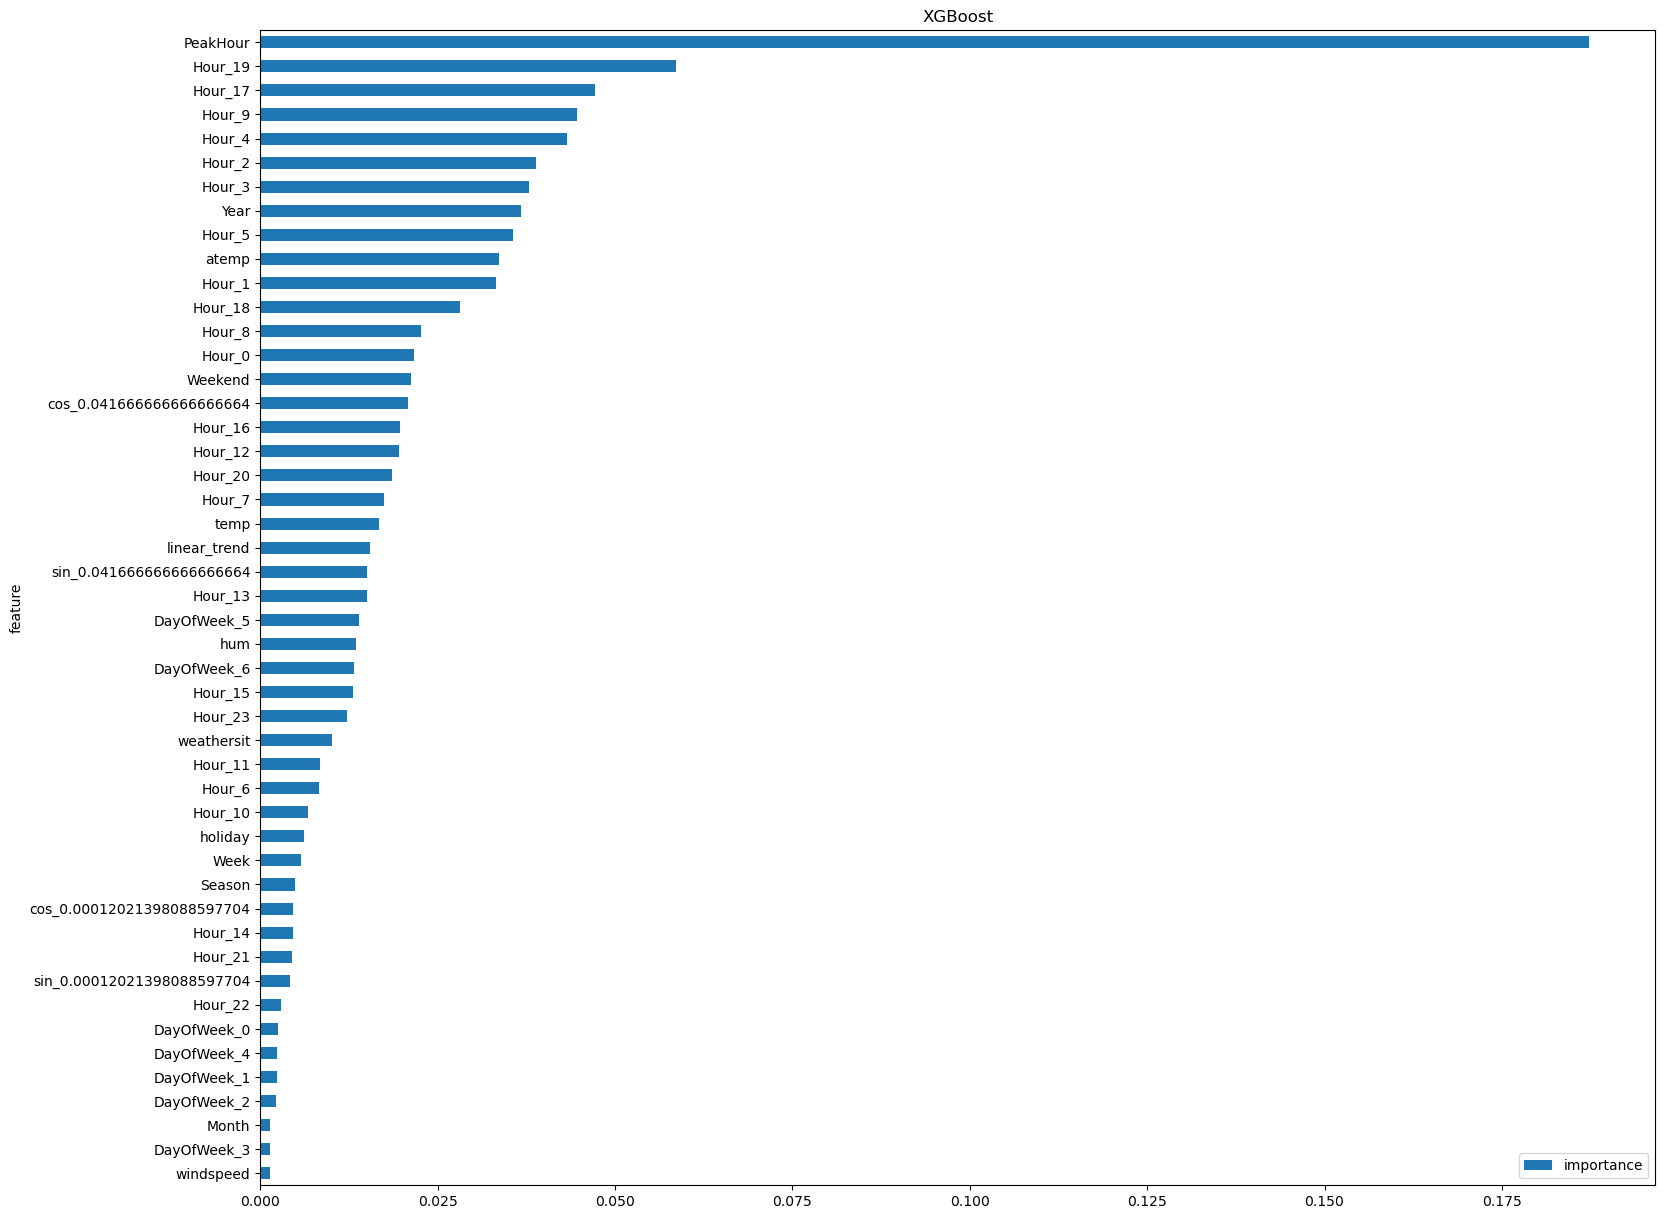

In [128]:
# Evalueren van het model met de beste hyperparameters
data.predict(models={'XGBoost': best_XGBoost})
data.show_feature_importances()

In [129]:
# Maken en printen van de beste CV score
best = gridsearch_XGBoost.best_score_
print(best)

-91.29345908053536


In [179]:
# Vinden van het beste model, en printen van de score van het beste model
best_model = gridsearch_XGBoost.best_estimator_
best_model_score = best_model.score(data.X_test, data.y_test)
print(best_model_score)

test_rmse = root_mean_squared_error(data.y_test, best_model.predict(data.X_test))
print(f'the rmse is: {test_rmse}')

0.8591269850730896
the rmse is: 85.14974328679129



### XGBoost regressor

XGBoost maakt gebruik van gradient boosted decision trees (gbdt). Het combineert meerdere zwakke modellen (beslissingsbomen) om een sterker model te creëren. Dit gebeurt door middel van een iteratief proces waarbij het model zich aanpast op basis van de fouten van vorige voorspellingen.


#### Basisprincipes Gradient Boosting:
- Boosting: Bij boosting worden meerdere zwakke modellen (meestal decision trees) gecombineerd om een krachtig model te vormen. Elke decision tree wordt getraind op de fouten (residuals) van de vorige tree, zodat het model steeds beter wordt.

- Gradient: De gradient verwijst naar het proces, waarbij de fout in het model (de residuen) wordt geminimaliseerd door steeds in de richting van de grootste fout te bewegen. Dit helpt het model om sneller en effectiever naar de optimale voorspelling toe te werken.

#### Stappen XGBoost

1. Eerste voorspelling: XGBoost begint met het maken van een eenvoudige voorspelling op de trainingsdata, vaak door het gemiddelde van de targetvariabele te nemen (Omarzai, 2024).
2. Fouten (residuals) berekenen: Na de eerste voorspelling worden de residuals berekend. Residuals zijn het verschil tussen de werkelijke en de voorspelde waarden. Ze geven de fout aan die de eerste voorspelling heeft gemaakt (Omarzai, 2024).
3. Eerste decision tree bouwen: De eerste decision tree wordt getraind op basis van de residuals van de eerste voorspelling. Deze boom probeert de grootste fouten in de voorspelling te corrigeren (Omarzai, 2024).
4. Nieuwe decision trees en foutcorrectie: Na de eerste decision tree worden de residuals opnieuw gebruikt om een nieuwe decision tree te trainen. Het model herhaalt dit proces, waarbij elke nieuwe boom leert van de fouten van de voorgaande bomen (Omarzai, 2024).
5. Optimaliseren van de verliesfunctie: Het gehele proces is gericht op het optimaliseren van de verliesfunctie (loss function). Door de verliesfunctie stap voor stap te minimaliseren, komt het model steeds dichter bij de werkelijke waarden van de target (Omarzai, 2024).
6. Stopcriteria: Het model blijft nieuwe decision trees genereren totdat een stopcriterium is bereikt. Dit kan bijvoorbeeld een maximaal aantal decision trees zijn of een minimaal verbeteringspercentage in de verliesfunctie (Omarzai, 2024).


### 3.2.2. Linear Regression

In [ ]:
#lineare regressie met regularisatie

# het aanmaken van een param_grid voor de Lasso regressor
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 5000, 10000]
}

# het uitvoeren van de gridsearch
gridsearch_Lasso = GridSearchCV(Lasso(), param_grid, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, verbose=1)
gridsearch_Lasso.fit(data.X_train, data.y_train)

# het printen van de beste parameters en score
print(gridsearch_Lasso.best_params_)
print(gridsearch_Lasso.best_score_)
best_Lasso = gridsearch_Lasso.best_estimator_
data.predict(models={'Lasso': best_Lasso})
data.show_feature_importances()

test_rmse = root_mean_squared_error(data.y_test, best_Lasso.predict(data.X_test))
print(f'The root mean squared error is: {test_rmse}')

Fitting 3 folds for each of 15 candidates, totalling 45 fits
{'alpha': 1, 'max_iter': 1000}
-108.43895992337302
train r2 ('Lasso', Lasso(alpha=1)) 0.6608615287054717
test r2 ('Lasso', Lasso(alpha=1)) 0.5630928107851012
The root mean squared error is: 149.95606007964125


In [178]:
# het aanmaken van een param_grid voor de Ridge regressor
gridsearcg_Ridge = GridSearchCV(Ridge(), param_grid, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, verbose=1)
gridsearcg_Ridge.fit(data.X_train, data.y_train)

# het printen van de beste parameters en score
print(gridsearcg_Ridge.best_params_)
print(gridsearcg_Ridge.best_score_)
best_Ridge = gridsearcg_Ridge.best_estimator_
data.predict(models={'Ridge': best_Ridge})
data.show_feature_importances()

test_rmse = root_mean_squared_error(data.y_test, best_Ridge.predict(data.X_test))
print(f'The root mean squared error is: {test_rmse}')

Fitting 3 folds for each of 15 candidates, totalling 45 fits
{'alpha': 100, 'max_iter': 1000}
-114.45375888222627
train r2 ('Ridge', Ridge(alpha=100, max_iter=1000)) 0.6771053967079617
test r2 ('Ridge', Ridge(alpha=100, max_iter=1000)) 0.5878157467312741
The root mean squared error is: 145.65155446665412


#### Lineaire Regressie uitleg:

Bij lineaire regressie wordt ervan uitgegaan dat er een lineaire relatie bestaat tussen de afhankelijke en de onafhankelijke variabele. De formule voor lineaire regressie is (Bevans, 2023):

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p + \epsilon  $$

De formule beschrijft hoe de target waarde (y) wordt voorspeld op basis van een combinatie van meerdere onafhankelijke variabelen (x_1 tpt x_p).

variabel uitleg:
- y, is de voorspelde waarde van de afhankelijke variabele (target).
- B0, is de intercept, de voorspelde waarde voor wanneer x = 0
- B1 tot en met B_p, de regressie coefficienten voor de onafhankelijke variabelen, met hoeveel y zal veranderen als x meer wordt
- x_1 tot en met x_p, zijn de onafhankelijke variabelen (features)
- e, de error (residual), verschil tussen de observeerde waarde en de voorspelde waarde. 

Lineaire regressie zoekt de lijn (b1) die de error (residuals) minimaliseert.

#### regularisatie

Regularisatie helpt machine learning modellen om overfitting te voorkomen. Overfitting treedt op wanneer een model  beter presteert op de trainingsdata dan op de testdata. Dit probleem ontstaat vaak wanneer een model bepaalde features te veel gewicht geeft (GeeksforGeeks, 2024). Regularisatie wordt gebruikt als een oplossing door tijdens het trainen van het model straffen toe te voegen aan de loss-functie, waardoor bepaalde features minder zwaar worden meegewogen (GeeksforGeeks, 2024). Hierdoor wordt het model minder complex en beter in staat om te generaliseren naar ongeziene data.

##### waarom is regularisatie nodig?

Wanneer twee kenmerken (bijvoorbeeld 𝑥1 en 𝑥2) vrijwel identiek zijn, kan het model beide kenmerken belangrijke coëfficiënten geven, ook al voegen ze weinig extra informatie toe. Dit maakt het model onnodig complex. Regularisatie zorgt ervoor dat het model eenvoudiger blijft door een straf toe te voegen aan grote coëfficiënten.

Er zijn twee soorten regularisatie
- L1 regularisatie (Lasso)
- L2 regularisatie (Ridge)



##### Lasso

Lasso-regressie is een techniek die wordt gebruikt om een lineair regressiemodel te regulariseren. Het voegt een penalty toe aan de loss functie om overfitting te voorkomen. De formule van Lasso-regressie is:

$$ \text{Verliesfunctie met L1-straf} = \text{Verliesfunctie} + \lambda \sum_{i=1}^{n} |w_i|$$

- lambda: bepaalt de sterkte van de straf.
- De term na lambda, is de som van de absolute waarden van de coëfficiënten.

- Effect: L1-regularisatie heeft de neiging om sommige coëfficiënten precies op nul te zetten, wat resulteert in sparsity (minder actieve variabelen). Dit maakt het model eenvoudiger en helpt de interpretatie, terwijl het mogelijk ook de generalisatie verbetert.

##### lasso regressie

Lasso regressie is een techniek die wordt gebruikt om een linear regressie model te regulariseren. Het voegt een penalty toe aan de functie om overfitting te verkomen. de formule van de lasso regressie is:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( y_i - \hat{y}_i \right)^2 + \lambda \sum_{j=1}^n \lvert \theta_j \rvert
$$

- de eerste term is de least square loss, dit is het verschil tussen de voorspelde en werkelijke waarden in het kwadraat
- de tweede term is de L1 regularisatie term het straft de som van de absolute waarde van de coefficient (θj). (GeeksforGeeks, 2024)


##### Ridge
L2-regularisatie voegt een straf toe die evenredig is aan de kwadraten van de coëfficiënten. De formule is:

$$ \text{Verliesfunctie met L2-straf} = \text{Verliesfunctie} + \lambda \sum_{i=1}^{n} w_i^2 $$

- lambda, bepaalt de sterkte van de straf
- term na de lambda, is de som van de kwadraten van de coëfficiënten

- Effect: L2 regularisatie corrigeert grote gewichten en helpt overfitting te voorkomen. Het leidt tot een model waarbij de gewichten gelijkmatig verdeeld zijn, wat gunstig is in het geval van sterk samenhangende kenmerken en helpt bij het behouden van alle features(GeeksforGeeks, 2024 June 7).

##### Ridge regression
Ridge-regressie is een techniek die wordt gebruikt om een lineair regressiemodel te regulariseren. Het voegt een penalty toe aan de verliesfunctie om overfitting te voorkomen. Het is handig wanneer de dataset multicollineariteit bevat. De formule is:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( y_i - \hat{y}_i \right)^2 + \lambda \sum_{j=1}^n \theta_j^2
 $$

- De eerste term is de least square loss, dit is het verschil tussen de voorspelde en werkelijke waarden in het kwadraat
- De tweede term is de L2-regularisatie, die de som van de kwadraten van de coëfficiënten straft. (GeeksforGeeks, 2024)

##### invloed alpha 
- Wanneer de alpha 0 is in zowel Lasso- als Ridge-regressie, zal het model zich gedragen als een normale lineaire regressie zonder regularisatie.
- Hoe groter de alpha, hoe agressiever de penalty, wat resulteert in een eenvoudiger model met kleinere coëfficiënten.

### Regressie loss functions
Loss functions geven aan hoe goed modellen voorspellen, door de loss te minimaliseren leren modellen om betere voorspellingen te maken.

#### Mean squared error (MSE)
De MSE is het gemiddelde van de gekwadrateerde residuals van alle datapunten in de dataset. Residuals zijn het verschil tussen de echte en voorspelde waardes.

Door het gemiddelde van de residuals in het kwadraat te nemen in plaats van de som is de loss function meer onafhankelijk van de grootte van de dataset.

MSE is wel gevoelig voor outliers, waar grote errors een aanzienlijke impact kunnen hebben om het resultaat. (GeeksforGeeks, 2024)

formule:
$$ \begin{equation} M S E=\frac{\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}}{n} \end{equation} $$

#### Mean Absolute Error (MAE)
De Mean absolute Error is het gemiddelde van de absolute waardes van de residuals van alle datapunten in de dataset.

De absolute waarde wordt gebruikt om negatieve getallen positief te maken, hierdoor worden de errors gelijk behandeld.

Door het gemiddelde te pakken is de loss function niet afhankelijk van het aantal datapunten in de dataset. (GeeksforGeeks, 2024)

formule:
$$ \begin{equation} M A E=\frac{\sum_{i=1}^{n}\left|y_{i}-\hat{y}_{i}\right|}{n} \end{equation} $$

#### Root Mean Squared Error
De Root Mean Squared Error is een variant van de MSE. De RMSE berekend de wortel van de gemiddeld kwadratisch verschil tussen de voorspelde waarde en werkelijke waarde.

De MSE en RMSE straffen grotere errors meer dan de MAE, dit zorgt ervoor dat ze meer gevoel zijn voor outliers. (GeeksforGeeks, 2024)

Formule:
$$ RMSE = √(MSE) $$


### 3.2.3. DecisonTreeRegressor

In [21]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# het aanmaken van een param_grid voor de Decision Tree Regressor
param_grid_dt = {
    'max_depth': [5, 6, 7, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}

# het uitvoeren van de gridsearch
gridsearch_DecisionTree = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, verbose=1)
gridsearch_DecisionTree.fit(data.X_train, data.y_train)

# het printen van de beste parameters
print(gridsearch_DecisionTree.best_params_)

best_model = gridsearch_DecisionTree.best_estimator_

# Vinden van het beste model, en printen van de score van het beste model
best_model_dt = gridsearch_DecisionTree.best_estimator_
best_model_score = best_model_dt.score(data.X_test, data.y_test)
print(best_model_score)

test_rmse = root_mean_squared_error(data.y_test, best_model.predict(data.X_test))
print(f'the rmse is: {test_rmse}')

Fitting 3 folds for each of 64 candidates, totalling 192 fits
{'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 4}
0.6712352224980508
the rmse is: 130.08046096142314


### Uitleg over Decision Tree Model 


#### Decision Tree Regressor

De Decision Tree Regressor is een eenvoudig maar krachtig model dat wordt gebruikt voor regressietaken. Het model maakt gebruik van een boomstructuur waar elke splitsing gedaan wordt op basis van splitscriteria. Bij elke splitsing probeert het model de data zo goed mogelijk te verdelen om een voorspelling te maken. Om er voor te zorgen dat de data zo snel mogelijk juist voorspeld wordt, maken we gebruik van de MSE om te meten hoe dicht we bij de werkelijke waarden liggen. Het model probeert om de MSE bij elke splitsing zo laag mogelijk te houden, om zo de beste splitsingen te krijgen.
De MSE wordt als volgt berekend:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Waarbij:
- n, het aantal datapunten is.
- y<sub>i</sub> , de werkelijke waarde van het datapunt is.
- <i>y</i><sup>^</sup><sub>i</sub> , de voorspelde waarde van het datapunt is.

Het doel van de decision tree is om de splitsingen te vinden die de MSE minimaliseren, wat betekent dat de voorspellingen dichter bij de werkelijke waarden liggen. Hoe lager de MSE, hoe beter het model de nieuwe datapunten kan voorspellen.

### Process
De kern van decision Tree regression is een boom-achtige structuur. Het algoritme begint met het maken van een root node die de gehele dataset representeert. (Viswa, 2023)

Het algoritme onderzoekt elke feature om de data op de beste manier op te splitsen in verschillende groepen, deze groepen zijn gebaseerd op de target.
Dit wordt gedaan door specifieke conditions of thresholds op de features te zetten. De split is gemaakt om het verschil tussen de target per groep te minimaliseren. (Viswa, 2023)

Wanneer de eerste splits is gemaakt maakt het algoritme twee child nodes deze representeren de subsets van de originele data. Iedere child node bevat een range van values gebaseerd op de split condition. Het algoritme doet dit proces dan allemaal opnieuw voor elke child node, waar de data verder wordt gesplitst op basis van de beste features en conditions. (Viswa, 2023)

#### stop criteria 
Het splitsen blijft doorgaan totdat er een stop criteria wordt bereikt. Dit kan gebeuren wanneer:
- De max_depth van de tree bereikt is. De max_depth bepaald namelijk de diepte van de decision tree. Door het stellen van een limiet op de diepte van de boom zorg je ervoor dat het model niet te complex wordt en niet zal overfitten op de data.
- Het aantal minimum datapunten in een leaf node is bereikt. Dit voorkomt dat de boom splits op te kleine subsets van data, wat overfitting voorkomt (Viswa, 2023).

#### voorspellingen maken
Wanneer het model getraind is, kunnen er voorspellingen mee gemaakt worden. Om een voorspelling te maken begint de decision tree bij de root node. Dan volgt het datapunt en het pad van de tree wat gebaseerd is op de feature values van het datapunt. Bij elke node wordt de conditie gecheckt en dit proces wordt herhaald tot er een leaf node wordt bereikt. De leaf node is het einde van de boom en bevat de uiteindelijke voorspelde waarde (Viswa, 2023).

In onze code hebben we de Decision Tree gecombineerd met GridSearchCV om de hyperparameters, zoals de maximale diepte van de boom (`max_depth`), te optimaliseren. In de output zagen we dat de beste parameter voor `max_depth` "None" was, wat betekent dat de boom geen limiet had op het aantal niveaus. Dit kan echter leiden tot overfitting, waarbij het model te veel leert van de trainingsdata en daardoor minder goed generaliseert naar nieuwe data.

### 3.2.4. RandomForestRegressor

In [28]:

# Random Forest model
rf = RandomForestRegressor()

# GridSearch parameters for Random Forest
param_grid = {'n_estimators': [10,15,20],
               'max_depth': [5, 6, 7, 8],
               'min_samples_split': [2, 4, 6, 8],
               'min_samples_leaf': [1, 2, 3, 4]}

# GridSearch for hyperparameter tuning
grid_search_rf = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_rf.fit(data.X_train, data.y_train.values.ravel())

# het printen van de beste parameters
print(grid_search_rf.best_params_)

best_model_rf = grid_search_rf.best_estimator_

# Vinden van het beste model, en printen van de score van het beste model
best_model_dt = grid_search_rf.best_estimator_
best_model_score = best_model_dt.score(data.X_test, data.y_test)
print(best_model_score)

test_rmse = root_mean_squared_error(data.y_test, best_model_rf.predict(data.X_test))
print(f'the rmse is: {test_rmse}')

Fitting 3 folds for each of 192 candidates, totalling 576 fits


c:\Users\Miche\mapvoornotebook\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 10}
0.7411359047622843
the rmse is: 115.42644883895109


### Uitleg over Random Forest Model 
### Random forest

De random forest regressor is een krachtig ensemble model dat bestaat uit een verzameling van decision trees. In een random forest werking de decision trees samen om een uiteindelijke voorspelling te doen. Het idee erachter is dat je door het combineren van de bomen de voorspellingfouten kan verminderen. 
In plaats van een enkele decision tree combineert het random forest model dus meerdere bomen om overfitting tegen te gaat. Het uiteindelijke resultaat van de random forest ontstaat door de voorspellingen te combineren en het gemiddelde ervan te pakken.

Wiskundige uitleg: Een Random Forest combineert de voorspellingen van B decision trees door het gemiddelde te nemen van de voorspellingen van elke boom:

$$
\hat{y} = \frac{1}{B} \sum_{b=1}^{B} \hat{y}_b
$$

Waarbij:
-  B , het aantal bomen in het bos is.
- y^_b de voorspelling van boom (b) is.

Een belangrijk onderdeel van een random forest is Bagging wat ook wel Bootstrap Aggregating heet. Dit is een proces waarbij elke boom op een willekeurige subset van de data wordt getraind. Deze subsets worden steekproefsgewijs getrokken met teruglegging. Doordat de bomen op verschillende data wordt getraind kan het model beter rekening houden met variatie in de data, dit kan de kans op overfitten verminderen.

#### Hyperparameter tuning

In onze code hebben we gebruikgemaakt van GridSearchCV om de hyperparameters van het Random Forest model te verbeteren. Enkele belangrijke hyperparameters die we hebben getuned zijn:

- n_estimators: Dit gaat om het aantal bomen die de random forest maakt en gebruikt tijdens het trainen van het model. We hebben verschillende waarden voor n_estimators in de gridsearch gestopt, hieruit bleek dat een n_estimators van 10 het beste resultaat gaf.

- max_depth: Dit gaat om de maximale diepte van de individuele bomen in het model. Het kleiner maken van de boom kan helpen met het voorkomen van overfitting. We hebben ook hier weer een aantal verschillende waarden in de gridsearch gestopt, hieruit bleek dat een max_depth van 8 het beste resultaat gaf.

- min_samples_split: Dit gaat om het minimum aantal datapunten die in een splitspunt van de boom moet zitten om een splitsing te mogen maken. Dit is ook een manier om regularisatie toe te passen, want het zorgt ervoor dat de boom niet op hele kleine delen van de data kan trainen. In ons model gaf een min_samples_split van 8 het beste resultaat.

- min_samples_leaf: Dit gaat om het minimaal aantal datapunten dat een in een leaf node moet zitten. In ons model gaf een min_samples_leaf van 2 het beste resultaat.

#### Loss Function en Regularisatie
Het Random Forest model gebruikt de Mean Squared Error (MSE) als loss functie om de prestaties van elke individuele boom te meten. Het doel is om de fout te minimaliseren door het gemiddelde van elke boom te nemen. De MSE wordt berekend als:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Waarbij:
- n, het aantal datapunten is.
- y_i, de werkelijke waarde van het doelvariabele is.
- y^_i,  de voorspelde waarde is.

#### Conclusie
De Random Forest Regressor is een sterk model dat goed werkt in situaties waar zowel reguliere als tijdreekskenmerken aanwezig zijn. Het combineren van meerdere decision trees helpt bij het verminderen van de kans op overfitting en zorgt voor meer nauwkeurige voorspellingen. In ons experiment presteerde het model goed, met een RMSE van 115.42 . Dit laat zien dat het model goed in staat is om effectief te generaliseren naar nieuwe data.




### 3.2.5. Ensemble

In [ ]:
# zelfsamengestelde ensemble zonder gewichten

# Hyperparameter tuning met GridSearchCV
# Random Forest
rf = RandomForestRegressor()
rf_param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='neg_mean_squared_error')
rf_search.fit(data.X_train, data.y_train)
best_rf = rf_search.best_estimator_

# Gradient Boosting
gb = GradientBoostingRegressor()
gb_param_grid = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb_search = GridSearchCV(gb, gb_param_grid, cv=5, scoring='neg_mean_squared_error')
gb_search.fit(data.X_train, data.y_train)
best_gb = gb_search.best_estimator_

# XGBoost
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_param_grid = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

xgb_search = GridSearchCV(xgb, xgb_param_grid, cv=5, scoring='neg_mean_squared_error')
xgb_search.fit(data.X_train, data.y_train)
best_xgb = xgb_search.best_estimator_

# Maak een Voting Regressor
voting_regressor = VotingRegressor(estimators=[
    ('rf', best_rf),
    ('gb', best_gb),
    ('xgb', best_xgb)
])
 
# Train de Voting Regressor
voting_regressor.fit(data.X_train, data.y_train)
 
# Maak voorspellingen
y_pred = voting_regressor.predict(data.X_test)

# Bereken de prestaties
rmse = root_mean_squared_error(data.y_test, y_pred)
print(f"Mean Squared Error: {rmse}")

print(rf_search.best_params_)
print(gb_search.best_params_)
print(xgb_search.best_params_)

c:\Users\Miche\mapvoornotebook\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Miche\mapvoornotebook\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Miche\mapvoornotebook\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Miche\mapvoornotebook\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

Mean Squared Error: 91.7369567558798
{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 30}
{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 30}
{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 30, 'subsample': 0.8}


## zelf samengestelde ensemble

### Waarom Deze Modellen?

De drie modellen die in dit ensemble worden gebruikt zijn:
- Random Forest
- Gradient Boosting
- XGBoost

De keuze is gebaseerd op de sterke eigenschappen van de modellen en de manier waarop de modellen elkaar aanvullen. Elk van deze modellen heeft unieke voordelen die samen zorgen voor een robuuster en krachtiger ensemble-model. Hieronder wordt meer uitleg gegeven waarom we voor deze modellen hebben gekozen.

### 1. Random Forest Regressor

Random Forest is een ensemble van decision trees die worden gecombineerd door middel van bagging (Bootstrap Aggregating). Bij bagging worden verschillende steekproeven (bootstrap samples) getrokken met teruglegging uit de trainingsdata. Dit betekent dat sommige datapunten meerdere keren in een steekproef kunnen voorkomen, terwijl andere mogelijk helemaal niet worden gebruikt. Dit zorgt voor diversiteit tussen de decision trees, wat helpt om de voorspelling robuuster te maken.

Voor elke steekproef wordt een decision tree getraind, en de uiteindelijke voorspelling is het gemiddelde van alle individuele trees. Dit proces helpt om de variabiliteit te verminderen en maakt het model robuuster tegen overfitting, omdat het niet afhankelijk is van één enkele decision tree. (GeeksforGeeks, 2024).

- Sterke punten van Random Forest:
  - Robuust tegen overfitting: Omdat het meerdere bomen combineert, is Random Forest minder gevoelig voor overfitting dan individuele decision trees.
  - Goed voor niet-lineaire data: Het model kan goed omgaan met complexere relaties in de data, zoals niet-lineaire patronen.
  - Betrouwbaarheid: Het presteert goed in veel verschillende situaties zonder veel hyperparameter-tuning.

### 2. Gradient Boosting Regressor

Gradient Boosting is een techniek waarbij zwakke voorspellers (meestal decision trees) iteratief worden gecombineerd, waarbij elke nieuwe boom de fouten van de vorige bomen probeert te corrigeren. Het belangrijkste kenmerk van Gradient Boosting is dat het gericht is op het minimaliseren van de fouten door de ‘gradiënt’ van de loss functie te volgen (GeeksforGeeks, 2023b).

- Sterke punten van Gradient Boosting:
  - Hoge nauwkeurigheid: Het biedt uitstekende prestaties, vooral op gestructureerde data, en kan zeer nauwkeurige voorspellingen doen door middel van iteratieve verbetering.
  - Flexibiliteit: Het kan worden aangepast om verschillende verliesfuncties te minimaliseren, wat het geschikt maakt voor verschillende soorten regressieproblemen.
  - Effectief bij kleine datasets: Het is vaak effectiever dan Random Forest wanneer de hoeveelheid data beperkt is, omdat het modellen iteratief verbetert.

### 3. XGBoost Regressor

XGBoost (Extreme Gradient Boosting) is een geavanceerde implementatie van Gradient Boosting die technieken zoals regularisatie, parallelle verwerking en efficiëntere zoekalgoritmes gebruikt (GeeksforGeeks, 2023a).

- Sterke punten van XGBoost:
  - Regularisatie: XGBoost maakt gebruik van L1- en L2-regularisatie, wat helpt overfitting te voorkomen, zelfs bij complexere modellen.
  - Snelheid: Het is veel sneller dan klassieke Gradient Boosting-algoritmes door de parallelle verwerking en efficiënte implementatie.
  - Prestaties: XGBoost heeft de reputatie de beste prestaties te leveren voor een breed scala aan machine learning-taken, vooral voor data met veel ruis of complexe patronen.

### conclusie

De combinatie van Random Forest, Gradient Boosting, en XGBoost zorgt voor een ensemble dat:
- Robuust is tegen overfitting,
- Goed omgaat met complexe, niet-lineaire patronen,
- En zeer nauwkeurige voorspellingen kan maken, zelfs bij kleine datasets of met veel ruis.


---------------------------------------------------------------------------------------------------------


## Uitleg van het Ensemble Model

In de bovenstaande code wordt een ensemble model gebruikt om de prestaties van drie regressiemodellen te combineren: Random Forest, Gradient Boosting en XGBoost. Het doel is om de kracht van deze modellen te benutten door de voorspellingen te combineren, zodat het ensemble-model beter presteert dan elk van de individuele modellen (GeeksforGeeks (2023)).

## Wiskundige Basis van het Ensemble Model

Het ensemble model dat in deze code wordt gebruikt, is een weighted average ensemble, waarbij de voorspellingen van elk model worden gecombineerd met verschillende gewichten, afhankelijk van hun prestaties (Singh (2024)).

### 1. Individuele Modellen

De drie modellen die worden gecombineerd zijn:

- Random Forest Regressor: Een ensemble van decision trees die door middel van bagging worden gecombineerd.
- Gradient Boosting Regressor: Een model dat op iteratieve wijze zwakke voorspellers (bomen) combineert, waarbij elke nieuwe boom de fouten van de vorige bomen corrigeert.
- XGBoost Regressor: Een geavanceerde implementatie van gradient boosting die gebruik maakt van technieken zoals regularisatie en parallelle verwerking.

### 2. Weging op Basis van Prestaties (RMSE)

De gewichten voor elk model worden berekend op basis van de prestaties van de modellen op de trainingsdata. De prestaties worden gemeten met de *Root Mean Squared Error* (RMSE), en de gewichten worden berekend als de omgekeerde RMSE van elk model.

Formule voor de gewichten:

Stel dat je de RMSE van de drie modellen hebt: `RMSE_rf`, `RMSE_gb` en `RMSE_xgb`. De gewichten worden als volgt berekend:

$$
\text{total\_rmse} = \frac{1}{\text{RMSE\_rf}} + \frac{1}{\text{RMSE\_gb}} + \frac{1}{\text{RMSE\_xgb}}
$$

Daarna worden de individuele gewichten voor elk model berekend als:

$$
\text{rf\_weight} = \frac{1 / \text{RMSE\_rf}}{\text{total\_rmse}}, \quad \text{gb\_weight} = \frac{1 / \text{RMSE\_gb}}{\text{total\_rmse}}, \quad \text{xgb\_weight} = \frac{1 / \text{RMSE\_xgb}}{\text{total\_rmse}}
$$

Deze gewichten geven de relatieve betrouwbaarheid van elk model aan: een model met een lagere RMSE krijgt een groter gewicht, omdat het beter presteert.

### 3. Voorspellingen van het Ensemble

De voorspellingen van het ensemble worden berekend als een gewogen som van de voorspellingen van de drie modellen (GeeksforGeeks, 2023a):

$$
\hat{y}_{\text{ensemble}} = \text{rf\_weight} \cdot \hat{y}_{\text{rf}} + \text{gb\_weight} \cdot \hat{y}_{\text{gb}} + \text{xgb\_weight} \cdot \hat{y}_{\text{xgb}}
$$

Waarin:

- `y_rf` de voorspelling van het Random Forest model,
- `y_gb` de voorspelling van het Gradient Boosting model,
- `y_xgb` de voorspelling van het XGBoost model.

### 4. Prestatie van het Ensemble

Het uiteindelijke ensemble-model wordt geëvalueerd met de *Root Mean Squared Error* (RMSE) over de testdata. Dit geeft een maat voor hoe goed het ensemble de werkelijke waarden voorspelt.

$$
\text{RMSE}_{\text{ensemble}} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} \left( y_i - \hat{y}_i \right)^2}
$$

Waarbij yi de werkelijke waarden zijn en yi^2 de voorspellingen van het ensemble.


## Voting Regressor
 
Een Voting Regressor is een ensemble-leermethode die wordt gebruikt voor regressieproblemen. Het combineert de voorspellingen van verschillende regressiemodellen om tot een uiteindelijke voorspelling te komen. Door meerdere modellen samen te voegen, kun je de voordelen van elk model benutten en de nadelen verminderen. Dit helpt vaak om de nauwkeurigheid en robuustheid van je model te verbeteren (GeeksforGeeks, 2023d).
 
### Hoe werkt een Voting Regressor
 
In een Voting Regressor worden meerdere regressiemodellen gecombineerd om voorspellingen te doen voor een bepaald datapunt. De uiteindelijke voorspelling wordt bepaald door het gemiddelde van de voorspellingen van alle individuele modellen. Dit kan op twee manieren gebeuren:
 
- Ongewogen gemiddelde: Alle modellen dragen evenveel bij aan de uiteindelijke voorspelling.
- Gewogen gemiddelde: Sommige modellen krijgen een grotere invloed op de uiteindelijke voorspelling, afhankelijk van hun prestaties of betrouwbaarheid.
 
### Wiskundige Uitleg
 
#### 1. Modellen en hun voorspellingen
 
Stel dat je `n` verschillende regressiemodellen hebt: `m1`, `m2`, ..., `mn`. Voor een gegeven input `x`, maakt elk model `m_i` een voorspelling, aangeduid als `ŷ_i(x)`, voor hetzelfde datapunt `x`.
 
#### 2. Ongewogen gemiddelde
 
De uiteindelijke voorspelling `ŷ(x)` van de Voting Regressor wordt berekend door het gemiddelde van de voorspellingen van al deze `n` modellen:
 
$$
\hat{y}(x) = \frac{1}{n} \sum_{i=1}^{n} \hat{y}_i(x)
$$
 
 
waarbij:
 
- `ŷ(x)` de uiteindelijke voorspelling is van de Voting Regressor voor input `x`,
- `ŷ_i(x)` de voorspelling is van model `m_i` voor `x`,
- `n` het aantal regressiemodellen is.
 
Deze methode zorgt ervoor dat alle modellen een gelijke invloed hebben op de uiteindelijke voorspelling.
 
#### 3. Gewogen gemiddelde
 
In sommige gevallen kan het wenselijk zijn om gewichten toe te kennen aan de voorspellingen van de verschillende modellen. Dit is vooral nuttig wanneer sommige modellen betrouwbaarder zijn dan andere. De uiteindelijke voorspelling wordt dan een gewogen gemiddelde van de voorspellingen van de modellen:
 
$$
\hat{y}(x) = \frac{\sum_{i=1}^{n} w_i \cdot \hat{y}_i(x)}{\sum_{i=1}^{n} w_i}
$$
 
 
waarbij:
 
- `w_i` het gewicht is dat wordt toegekend aan model `m_i`,
- `ŷ_i(x)` de voorspelling is van model `m_i` voor input `x`,
- `∑(i=1 to n) w_i` de som is van de gewichten van alle modellen.
 
De gewogen benadering zorgt ervoor dat de modellen met een groter gewicht meer invloed hebben op de uiteindelijke voorspelling.
 
### Waarom zou je een Voting Regressor gebruiken?
 
Er zijn verschillende redenen waarom een Voting Regressor een goede keuze kan zijn voor een regressieprobleem (GeeksforGeeks, 2023d):
 
1. Verhoogde Nauwkeurigheid door Diversiteit van Modellen  
   Een van de belangrijkste voordelen van de Voting Regressor is het benutten van de verschillende sterke punten van verschillende modellen. Elk model in het ensemble kan bijvoorbeeld beter presteren voor specifieke datatypes of patronen in de data. Door de voorspellingen van deze modellen te combineren, kun je de nauwkeurigheid verbeteren. Dit is vooral waardevol als de modellen diverse benaderingen gebruiken (bijvoorbeeld lineaire regressie, besluitbomen, of support vector machines).
 
2. Minder Gevoelig voor Overfitting 
   Individuele modellen kunnen overfitten op specifieke trainingsdata, wat betekent dat ze te sterk reageren op ruis of details die niet representatief zijn voor nieuwe data. Door meerdere modellen te combineren, wordt de kans op overfitting verminderd, omdat de uiteindelijke voorspelling de kans heeft om minder afhankelijk te zijn van de specifieke details van de trainingsdata. Dit maakt het model robuuster voor nieuwe, ongeziene data.
 
3. Robuustheid tegen Fouten van Individuele Modellen  
   Wanneer je meerdere modellen combineert, worden de voorspellingen van die modellen gemiddeld, wat de impact van individuele fouten vermindert. Bijvoorbeeld, als één model een foute voorspelling doet door ruis in de data, kan de uiteindelijke voorspelling van de Voting Regressor die fout vaak corrigeren door het gemiddelde van de andere modellen.
 
4. Eenvoudige Implementatie 
   Een Voting Regressor is relatief eenvoudig te implementeren. Het vraagt niet om ingewikkelde afstemming van hyperparameters of het ontwikkelen van complexe modellen. Je kunt gewoon verschillende regressiemodellen gebruiken en deze combineren, wat de implementatie snel en flexibel maakt. Dit maakt het een ideale keuze voor situaties waarin je verschillende modellen hebt en snel de prestaties wilt verbeteren zonder veel extra moeite.
 
5. Flexibiliteit door Gewichten  
   Als je sommige modellen betrouwbaarder acht dan andere, kun je gewichten toekennen aan de voorspellingen van de modellen. Dit biedt de mogelijkheid om het effect van elk model op de uiteindelijke voorspelling te manipuleren, zodat de meer betrouwbare modellen meer invloed hebben. Dit is vooral nuttig wanneer je domeinspecifieke kennis hebt over welk model beter presteert onder bepaalde omstandigheden.

### 3.3. Hybride Model

In [ ]:
# Hybride model

param_m1 = {'fit_intercept': [True, False]}

m1 = GridSearchCV(estimator=LinearRegression(), param_grid=param_m1, cv=5, n_jobs=-1)
m1.fit(data.X_train, data.y_train)

Model_1 = m1.best_estimator_

train_predict1 = Model_1.predict(data.X_train)
train_predict1 = train_predict1.ravel()
test_predict1 = Model_1.predict(data.X_test)
test_predict1 = test_predict1.ravel()

y_train_res =  data.y_train.values.ravel() - train_predict1.ravel()
y_test_res =  data.y_test.values.ravel() - test_predict1.ravel()

param_m2 = {'n_estimators': [5, 10, 15],
            'max_depth': [3, 5, 8, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]}

m2 = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_m2, cv=5, n_jobs=-1)
m2.fit(data.X_train, y_train_res)

Model_2 = m2.best_estimator_



In [18]:

train_predictions_total = Model_2.predict(data.X_train) + train_predict1 # trainen op de residuals
test_predictions_total = Model_2.predict(data.X_test) + test_predict1 # testen op de residuals
train_predictions_total.ravel()
train_predictions_total.ravel()

print('train r2', r2_score(data.y_train.values.ravel(), train_predictions_total))
print('test r2', r2_score(data.y_test.values.ravel(), test_predictions_total))

print('train rsme', root_mean_squared_error(data.y_train.values.ravel(), train_predictions_total))
print('test rsme', root_mean_squared_error(data.y_test.values.ravel(), test_predictions_total))

best_hyb = m2.best_estimator_

print(m1.best_params_)
print(m2.best_params_)

train r2 0.8916377012812428
test r2 0.8076213080015606
train rsme 53.518700426787674
test rsme 99.50568863739883
{'fit_intercept': False}
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10}


### Hybride Model Uitleg
Wij hebben een hybride model gemaakt met de lineaire regressie en random forest regressor modellen. 
Hierbij word de lineaire regressie getraind op de train data en de residuals worden berekend.
De residuals worden gebruikt om het random forest regressor model te trainen. 
De voorspellingen van de lineaire regressie en random forest regressor worden bij elkaar opgeteld. De r2 score en rsme score van het hybride model zijn berekend.

### Lineaire Regressie

Een lineair regressie model is een redelijk simpel model die de relatie tussen onafhankelijke en afhankelijke variabelen modelleert. Hier gaat het model ervan uit dat de relatie tussen de variabelen lineair is, wat betekent dat als een variabele stijgt de andere variabele ook mee stijgt.
Wij hebben dit model gekozen voor een paar redenen:
1. Simpel: Het model is makkelijk te begrijpen en gebruikt niet heel veel parameters, dit vinden we belangrijk omdat we rekening moeten houden met mensen die minder van machine learning afweten. Door een simpeler model te kiezen kunnen we onze uiteindelijke voorspellingen en daarmee gepaarde aanbevelingen makkelijker uitleggen.
2. Lineariteit: Tijdens ons onderzoek naar de trend in de data, kwamen we er achter dat we een redelijk lineaire trend hebben. Het was voor ons daarom belangrijk om een model te gebruiken dat hier goed mee om kan gaan.
3. Efficiëntie: Omdat het model niet heel veel parameters heeft die je kan tunen, en het zoekt naar de lineaire relatie tussen data is dit een model dat snel werkt. Omdat onze dataset niet heel klein is wilden we ook een model gebruiken dat ons snel voorspellingen gaf.

### RandomForestRegressor

De RandomForestRegressor is een ensemble model, dit betekend dat er meerdere beslisbomen gemaakt worden om zo zeker mogelijk te voorspellen (Beheshti, 2022). Daarnaast maakt het ook gebruik van bootstrapping waardoor elke boom op een andere subset van de data getraind wordt (Beheshti, 2022). Hierdoor leert het model meer van de variatie in de data en word de kans op overfitten verminderd (Brownlee, J. 2016). 
Wij hebben dit model gekozen voor een paar redenen:
1. Minder overfitting: Omdat het model gebruik maakt van van meerdere beslisbomen en gebruik maakt van bootstrapping word de kans op overfitting sterk verminderd (Brownlee, J. 2016). Omdat dit model toegepast word op de residuals wilden wij dat we een model gebruikten die niet zo snel zou overfitten.
2. Parallel werking: De beslisbomen worden parallel getraind, dit betekend dat elke boom onafhankelijk van elkaar is en apart gefit en getraind word (GeeksforGeeks, 2024a). Hierdoor verminderd de trainingstijd en word er sneller voorspeld dan bij een normale DecisionTreeRegressor (GeeksforGeeks, 2024a). Omdat de dataset niet heel klein is en we niet zeker weten hoeveel residuals we hadden vonden we het belangrijk dat we een tweede model meenamen die relatief snel de uiteindelijke voorspellingen had.



## 4. Bevindingen en conclusie

### 4.1 Bevindingen

In [29]:
# Aanmaken van de tabel
# 'x' voor de SARIMA(X), omdat het niet gelukt is om de score te berekenen.
tabel = {
    'Modellen': [
        'Facebook Prophet', 'SARIMA(X)', 'XGBRegressor', 'Lasso','Ridge', 'Decision Tree', 'Random Forest','Zelf samengestelde Ensemble', 'Hybride model'],
    'Parameters': [{'X'},{'X'},{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.6},{'alpha':1, 'max_iter':1000},{'aplha':100, 'max_iter':1000},{'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 4},{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 10}, {'max_depth':20, 'min_samples_split':5, 'n_estimators':30, 'learning rate':0.2, 'max_depth':7, 'n_estimators':30, 'learning rate':0.2, 'max_depth':7, 'n_estimators':30, 'subsample':0.8},{ 'fit_intercept':False,'max_depth':10, 'min_samples_leaf':4,'min_samples_split':2, 'n_estimators':10,}],
    'Score in notebook (RMSE)': [102.96, 'X', 85.14, 145.65, 149.95, 130.08, 115.42, 91.95, 101.67],
    'Score in Kaggle (RMSE)': ['X', 'X', 165.83, 198.28, 192.70, 180.99, 181.12, 183.09, 289.65]
}

# Maken een DataFrame
df = pd.DataFrame(tabel)

# Displayen van de DataFrame
df


Modellen  \
0             Facebook Prophet   
1                    SARIMA(X)   
2                 XGBRegressor   
3                        Lasso   
4                        Ridge   
5                Decision Tree   
6                Random Forest   
7  Zelf samengestelde Ensemble   
8                Hybride model   

                                          Parameters Score in notebook (RMSE)  \
0                                                {X}                   102.96   
1                                                {X}                        X   
2  {'colsample_bytree': 0.7, 'learning_rate': 0.1...                    85.14   
3                     {'alpha': 1, 'max_iter': 1000}                   145.65   
4                   {'aplha': 100, 'max_iter': 1000}                   149.95   
5  {'max_depth': 8, 'min_samples_leaf': 4, 'min_s...                   130.08   
6  {'max_depth': 8, 'min_samples_leaf': 2, 'min_s...                   115.42   
7  {'max_depth': 7, 'min_samples_split': 5, 'n_es...                    91.95   
8  {'fit_intercept': False, 'max_depth': 10, 'min...                   101.67   

  Score in Kaggle (RMSE)  
0                      X  
1                      X  
2                 165.83  
3                 198.28  
4                  192.7  
5                 180.99  
6                 181.12  
7                 183.09  
8                 289.65

### 4.2 Conclusie

### conclusie
Het model dat het beste heeft gepresteerd in het notebook is de XGBoost regressor met een R2-score van 0.86 en een RMSE van 91. op kaggle heeft hetzelfde model ook de beste prestaties geleverd, met een RMSE van 165.
 
De parameters van de XGBoost regressor:  
 
- colsample_bytree : 0.7
- learning_rate : 0.1
- max_depth : 5
- n_estimators : 150
- subsample : 0.6
 
#### feature importance
top 10 belangrijkste features van het XGBoost-model:
1. PeakHour
2. Hour_19
3. Hour_17
4. Hour_9
5. Hour_4
6. Hour_2
7. Hour_3
8. Year
9. Hour_5
10. Atemp
 
feature importance geeft aan hoe belangrijk bepaalde features zijn voor het beslissen van de target. Hoe hoger de score hoe groter het effect op het model.
 
Hieruit kan dus geleid worden dat Peak-Hour bij verre de belangrijkste feature is in dit model. Dit it wordt bevestigd met de feature-importance plot, waarin duidelijk te zien is dat PeakHour een veel grotere impact heeft in vergelijking met andere features.

#### Vergelijking met EDA-resultaten
 
de resultaten van de modelvoorspellingen passen goed bij de inzichten die we tijdens de EDA hebben opgemerkt.
tijdens de eda zagen we al duidelijke patronen die de invloed van bepaald uren in de dag - zoals de piekuren - op de vraag naar fietsverhuur. deze variabelen zagen we ook al snel in de feature importance - analyse naar voren als bepalend, wat laat zien dat de inzichten uit de eda een betrouwbare basis vormden en voor de modelontwikkeling. het geeft ons meer vertrouwen dat wij nu een model hebben di een correcte weergave geeft van de factoren die de huurpijs het meest beinvloed.
 
tijdens de eda hebben we ook gekeken naar verschillende tijdgebonden kenmerken, denk hierbij aan 'hour', 'season', 'month', 'dayofweek', 'week' en 'year'. we ontdekten dat bepaalde uren van de dag, zoals de piekuren(hour 19 en hour 17), een belangrijke rol speelde op de vraag naar fietsverhuur. dit zag je meteen al bij de correlaties en werd nogmaals bevestigd door de feature importance van het model. 
De piekuren waren erg consistent bepalend voor de voorspellingen van de modellen, dit geeft aan dat fietsgebruikers op specifieke momenten van de dag actiever zijn in het huren van fietsen.
 
daarnaast bleek ook dat kenmerken die jaar gerelateerd waren zoals 'year', belangrijk zijn in de voorspellingen. dit kan te maken hebben met de trends in de fietsverhuurmarkt die per jaar veranderen, we hebben het hier dan vooral over seizoenstrends en economische omstandigheden die invloed hebben op de vraag naar fietsverhuur.
Ook de temperatuur ('a temp') kwam zowel in de EDA als in de feature importance naar voren als een belangrijke variabele, wat laat zien dat weersomstandigheden een impact kan hebben op de huurvraag. Warmer weer kan bijvoorbeeld leiden tot een verhoogde interesse in het huren van fietsen.
 
het feit dat de inzichten uit de eda sterk overeenkomen met de resultaat van de feature importance - analyse versterkt de echtheid van ons model. de eda vormt een goede basis van het identificeren van de belangrijkste variabelen en de vergelijkbare resultaten uit het model geven ons meer vertrouwen in de betrouwbaarheid van het model. ook helpt deze bevestiging om ons beter te begrijpen waarom bepaald kenmerken zo belangrijk zijn, wat wee belangrijke informatie oplevert voor het maken van de strategische beslissingen door de verhuurder.
 
#### advies verhuurder
Op basis van de feature importance is ons advies om er voor te zorgen dat er meer fietsen beschikbaar zijn voor verhuur rond de spitsuren en op dagen met mooi weer.
 
Om de winst de verhogen adviseren wij voor uur gerichte promoties in te voeren, zodat ook de vraag buiten de spitsuren in aantal kan vergroten. Dit kan bijvoorbeeld door kortingen of speciale aanbiedingen.
 
Ook zijn op regenachtige dagen is het aan te nemen dat de vraag naar fietsen dan lager is. Door minder personeel in te roosteren op deze dagen kunnen de loonkosten voor de verhuurder worden geminimaliseerd. Het personeel dat nu niet werkt op de regenachtige dagen, zal nu ook beschikbaar zijn om ingezet te worden tijdens de peak-hours of dagen met mooi weer.
 
Daarnaast kan er ook aan worden gedacht om de huurprijs per fiets een bepaald percentage te verhogen. Dit kan zorgen voor een grotere winst. Door dit te combineren met de uur gerichte promoties kan de winst over de hele dag worden verbeterd.

#### Modeladvies voor de verhuurder
 
Het model dat we zouden adviseren is de XGBoost Regressor. XGBoost biedt een super goede balans tussen voorspelling nauwkeurigheid en flexibiliteit. het model presteert consistent en beter dan de andere modellen.de xg boost kan ook goed omgaan met moeilijke, niet-lineaire relaties tussen de variabelen. de xgboost is ook minder bestendig tegen overfitting dankzij de ingebouwde regularisatie, wat ervoor zorgt dat het model goed open staat naar nieuwe data.
 
Hoewel er andere modellen zijn die mogelijk makkelijker zijn om te begrijpen, zoals een Random Forest of een lineaire regressie, kiezen wij toch voor de XGBoost omdat hij duidelijk beter is in zijn voorspellingen.
 
Het is belangrijk om te benadrukken dat het beste model niet per definitie alleen afhangt van de nauwkeurigheid. er zijn vele andere overwegingen zoals de interpretatie van het model, het gemak waarmee geimplementeerd word en de complexiteit. XGBoost biedt een goede combinatie van hoge voorspellingsnauwkeurigheid en interpretatie. vooral wanneer er gebruik gemaakt word van de visualisatietools die  helpen om de invloed van de meest belangrijke variabelen te begrijpen.we zijn daarom tot de conclusie gekomen dat de XGboost het beste model is om mee overweg te gaan. het sluit het beste aan bij de wensen van de verhuurder om zowel goede voorspellingen te hebben als inzicht krijgen in factoren die de fietsenverhuur beinvloeden.
 

## Bronnen:
1. Numpy.fft.fftfreq — NumPy v2.1 Manual. (z.d.). https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html (Geraadpleegd op 28 november 2024)
2. Fourier Transforms (SciPy.FFT) — SciPY v1.14.1 Manual. (z.d.-b). https://docs.scipy.org/doc/scipy/tutorial/fft.html (Geraadpleegd op 28 november 2024)
3. GeeksforGeeks. (2024, 21 november). Time Series Analysis using Facebook Prophet. GeeksforGeeks. https://www.geeksforgeeks.org/time-series-analysis-using-facebook-prophet/ (Geraadpleegd op 29-11-2024)
4. ChatGPT 4.0(2024), Prompt 1: Prophet Grid Search Optimization, https://chatgpt.com/share/674a020e-94d8-8010-9edc-28a70867534e (Geraadpleegd op 29-11-2024)
5. Diagnostics. (2024, 20 oktober). Prophet. https://facebook.github.io/prophet/docs/diagnostics.html#cross-validation (Geraadpleegd op 29-11-2024)
6. fbprophet. (2020, 5 september). PyPI. https://pypi.org/project/fbprophet/ (Geraadpleegd op 29-11-2024)
7. Taylor, S. J., & Letham, B. (2017). Forecasting at scale. PeerJ Preprints, 5, e3190v2., p. 5 - 13 https://doi.org/10.7287/peerj.preprints.3190v2 (Geraadpleegd op 30-11-2024)
8. GeeksforGeeks. (2022, 21 februari). Python | Pandas dataframe.rolling(). GeeksforGeeks. https://www.geeksforgeeks.org/python-pandas-dataframe-rolling/ (Geraadpleegd op 30-11-2024)
9. Collins, E. R. (2024, 19 februari). 5 Best Ways to Use Python Pandas Series Rolling Window. https://blog.finxter.com/5-best-ways-to-use-python-pandas-series-rolling-window/ (Geraadpleegd op 30-11-2024)
10. Vikram, (2023, 31, oktober). Timeseries analysis 1 - timeseries decomposition. https://brightspace.hhs.nl/content/enforced/102168-ADSAI-MACHI-23_2024_FALL_1/Lecture%20-%20Timeseries%20analyse.pdf (Geraadpleegd op 30-11-2024)
11. Standard deviation formulas. (z.d.). https://www.mathsisfun.com/data/standard-deviation-formulas.html (Geraadpleegd op 30-11-2024)
12. Wikipedia contributors. (2024, 23 november). Moving average. Wikipedia. https://en.wikipedia.org/wiki/Moving_average (Geraadpleegd op 30-11-2024)
13. Brownlee, J. (2016). Bagging and Random Forest Ensemble Algorithms for Machine Learning. Machine Learning Mastery.  https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/  (Geraadpleegd op 30-11-2024)
14. Beheshti, N. (2022, 5 maart). Random Forest regression - towards data science. Medium. https://towardsdatascience.com/random-forest-regression-5f605132d19d (Geraadpleegd op 30-11-2024)
15. GeeksforGeeks. (2024a, juli 12). Random Forest algorithm in machine learning. GeeksforGeeks. https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/ (Geraadpleegd op 30-11-2024)

16. Ansari, Y. (2023, 15 februari). Regularized Linear Regression - Yahya Ansari Medium. Medium. https://medium.com/@novus_afk/regularized-linear-regression-35d5eaaa84d5
17. Linear Regression with Regularization. (z.d.). https://aunnnn.github.io/ml-tutorial/html/blog_content/linear_regression/linear_regression_regularized.html
18. Pandian, S. (2024, 14 oktober). Study of Regularization Techniques of Linear Models and Its Roles. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/11/study-of-regularization-techniques-of-linear-model-and-its-roles/
19. GeeksforGeeks. (2024, 9 september). Linear Regression Formula. GeeksforGeeks. https://www.geeksforgeeks.org/linear-regression-formula/
20. GeeksforGeeks. (2024b, september 18). Ridge Regression vs Lasso Regression. GeeksforGeeks. https://www.geeksforgeeks.org/ridge-regression-vs-lasso-regression/?ref=oin_asr1
21. Bevans, R. (2023, June 22). Simple linear regression | An easy introduction & examples. Scribbr. https://www.scribbr.com/statistics/simple-linear-regression/
22. Team, D. (2022, March 25). Lasso and Ridge regression in Python tutorial. https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720821&utm_adgroupid=157156375191&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=720362650048&utm_targetid=aud-2274077226600:dsa-2218886984100&utm_loc_interest_ms=&utm_loc_physical_ms=9064129&utm_content=&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-row-p1_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na-bfcm24&gad_source=1&gclid=CjwKCAiAjKu6BhAMEiwAx4UsAiH2i1QZ9y4uSsaQ84Dkm7Idj5QtTPeQ7oVpQJ_Hwe8iySeHMUfPrhoCFgAQAvD_BwE
23. GeeksforGeeks. (2024, October 23). Linear Regression in Machine learning. GeeksforGeeks. https://www.geeksforgeeks.org/ml-linear-regression/
24. ChatGPT 4o, (2024 prompt2: LaTeX formule hulp)https://chatgpt.com/share/674b4253-454c-8003-b082-9fb5b945f42e
25. GeeksforGeeks. (2024, October 8). ML | Common Loss Functions. GeeksforGeeks. https://www.geeksforgeeks.org/ml-common-loss-functions/
26. GeeksforGeeks. (2024, August 13). Mean squared error. GeeksforGeeks. https://www.geeksforgeeks.org/mean-squared-error/#what-is-root-mean-square-error
27. Jain, A. (2024, February 7). All about loss functions like MSE, MAE, RMSE etc - Abhishek Jain - Medium. Medium. https://medium.com/@abhishekjainindore24/all-about-loss-functions-like-mse-mae-rmse-etc-36596e3802f5
28. ChatGPT 4o(2024), prompt 3:lineare regressie en regularisatie - https://chatgpt.com/share/674b546c-dc58-8003-ac52-81444240bc15
29. ChatGPT 40(2024), prompt 4:Features in test dataset - https://chatgpt.com/share/674c8476-f4d8-8003-aebe-a4d2a0f8cc41

30. Seasonality, Trend and Noise - Autocorrelation and Partial autocorrelation. (n.d.). [Video]. DataCamp. https://campus.datacamp.com/courses/visualizing-time-series-data-in-python/seasonality-trend-and-noise?ex=1
31. Lendave, V. (2022, February 4). What are autocorrelation and partial autocorrelation in time series data? Analytics India Magazine. https://analyticsindiamag.com/ai-mysteries/what-are-autocorrelation-and-partial-autocorrelation-in-time-series-data/

32. GeeksforGeeks. (2024a, maart 26). ARIMA vs SARIMA Model. GeeksforGeeks. https://www.geeksforgeeks.org/arima-vs-sarima-model/?ref=header_outind 
33. GeeksforGeeks. (2024b, mei 24). SARIMA (Seasonal Autoregressive Integrated Moving Average). GeeksforGeeks. https://www.geeksforgeeks.org/sarima-seasonal-autoregressive-integrated-moving-average/?ref=header_outind 

34. Blog, G. (2024, November 24). What is XGBoost Algorithm? Analytics Vidhya. https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/#h-bagging
35. Omarzai, F. (2024, November 20). XGBOOST Regression in depth - Fraidoon Omarzai - medium. Medium. https://medium.com/@fraidoonomarzai99/xgboost-regression-in-depth-cb2b3f623281
36. chatgpt 4o 2024 prompt:uitleg XGBoost algoritme - https://chatgpt.com/share/674b6e3a-4ad4-8003-903e-36dc46a5e1c1\

37. GeeksforGeeks. (2023, 26 december). A Comprehensive Guide to Ensemble Learning. GeeksforGeeks. https://www.geeksforgeeks.org/a-comprehensive-guide-to-ensemble-learning/ 
38. Singh, A. (2024, 26 november). A Comprehensive Guide to Ensemble Learning (with Python codes). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/ 
39. GeeksforGeeks. (2023b, december 26). A Comprehensive Guide to Ensemble Learning. GeeksforGeeks. https://www.geeksforgeeks.org/a-comprehensive-guide-to-ensemble-learning/?ref=header_outind 
40. GeeksforGeeks. (2023a, maart 27). Ensemble methods in Python. GeeksforGeeks. https://www.geeksforgeeks.org/ensemble-methods-in-python/?ref=header_outind 
41. GeeksforGeeks. (z.d.). Random Forest Regression in Python – GeeksforGeeks. GeeksforGeeks. Geraadpleegd op [30-11-2024], van https://www.geeksforgeeks.org/random-forest-regression-in-python/
42. GeeksforGeeks. (z.d.). Random Forest Algorithm in Machine Learning – GeeksforGeeks. GeeksforGeeks. Geraadpleegd op [30-11-2024], van https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/
43. cnvrg.io. (z.d.). Random Forest Regression – The Definitive Guide. cnvrg.io. Geraadpleegd op [30-11-2024], van https://cnvrg.io/random-forest-regression/
44. MathWorks. (z.d.). Fourier Analysis and Filtering. Geraadpleegd op 1 december 2024, van https://www.mathworks.com/help/matlab/fourier-analysis-and-filtering.html
45. BetterExplained. (z.d.). An Interactive Guide To The Fourier Transform. Geraadpleegd op 1 december 2024, van https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/
46. GeeksforGeeks. (2023d, oktober 25). Voting regressor. GeeksforGeeks. https://www.geeksforgeeks.org/voting-regressor/ (Geraadpleegd op 01-12-2024)
47. Bevans, R. (2023, June 22). Multiple Linear Regression | A Quick Guide (Examples). Scribbr. https://www.scribbr.com/statistics/multiple-linear-regression/ (Geraadpleegd op 15-12-2024)
48. GeeksforGeeks. (2024, August 5). Regularization in machine learning. GeeksforGeeks. https://www.geeksforgeeks.org/regularization-in-machine-learning/ (Geraadpleegd op 15-12-2024)
49. Viswa. (2023, July 31). Unveiling Decision Tree Regression: Exploring its Principles, Implementation. Medium. https://medium.com/@vk.viswaunveiling-decision-tree-regression-exploring-its-principles-implementation-beb882d756c6 (Geraadpleegd op 12-15-2024) 